# Notebook to experiment with techniques for identifying the borders between layers
The resulting layer borders from each column are then reviewed manually (by looking at the 512 output plots of `LayerPredictor`) and if any borders need correction (maybe a dozen of them), they are manually updated. The results are finally smoothed by convolving with a 3x3 gaussian kernel with $2 \sigma^2 = 1 \text{ idx}^2$ for each layer boundary.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import seaborn as sns
# sns.set_theme(style="darkgrid")
import json
import os

from caveclient import CAVEclient

from LayerPredictor import BoundaryPredictor, LayerPrediction, LayerClassifier

# LayerPredictor on the entire dataset

#### Use soma density, soma volume, and standard deviation of soma volume to find the boundaries between layers across all of minnie65
This step can be skipped if you already have a `LayerPrediction` object (`pred`)

In [3]:
resolution = np.array([4., 4., 40.])
# conservative bbox only containing well-segmented areas
seg_low_um = np.array([130_000, 50_000, 15_000]) * resolution / 1_000
seg_up_um = np.array([355_000, 323_500, 27_500]) * resolution / 1_000
name = "minnie_full"
cache_dir = ".\\minnie_full"

p = BoundaryPredictor(features=("soma_volume",), num_PCA=None, use_depth=False, use_soma_vol_std=True, resolution=resolution, save_figs=True, verbose=True, 
                      name=name, cache_dir=cache_dir)

In [4]:
%matplotlib inline
try:
    pred = LayerPrediction.load_pickle(os.path.join(cache_dir, f"{name}_prediction.pkl"))
except IOError:
    pred = p.predict(np.array([seg_low_um, seg_up_um]), col_size=(100, 100), ngridpts=(32, 16))

connecting to server... success.
downloading all cells from datastack... success.
loading soma features... success.

WORKING ON 0 [[130000.  50000.  15000.]
 [155000. 323500.  17500.]]
calculating features by depth... success.
score: -65.06104352381828
score: -50.341960641608
score: -31.446588078502494
score: -12.62397654445702
score: -6.017602270753977
score: -1.4404039585147586
score: 4.276142576591268
score: 24.308042308253217
score: 71.35160474166196
score: 73.81725493050673
score: 74.2298941871849
score: 74.28511055361258
score: 74.3048031749062
score: 74.31512594324248
score: 74.32095540627037
score: 74.3243262775485
score: 74.3262953790231
score: 74.32745145525547
score: 74.32813205224409
bounds: [0.41239482 0.562836   0.687836   0.827836   1.02942691]

WORKING ON 1 [[130000.          50000.          15666.66666667]
 [155000.         323500.          18166.66666667]]
calculating features by depth... success.
score: -78.82546321999249
score: -73.61987222640971
score: -71.05389395


WORKING ON 14 [[130000.          50000.          24333.33333333]
 [155000.         323500.          26833.33333333]]
calculating features by depth... success.
score: -236.16667862441506
score: -231.4463441813076
score: -228.01240197359908
score: -226.16879819603702
score: -225.53411050735355
score: -225.42016216538775
score: -225.4079857545815
score: -225.40452672799742
score: -225.40279340565257
score: -225.40186797215512
bounds: [0.414132 0.568132 0.718132 0.848132 1.070632]

WORKING ON 15 [[130000.  50000.  25000.]
 [155000. 323500.  27500.]]
calculating features by depth... success.
score: -276.5933382462317
score: -265.6146505081936
score: -261.09509308133687
score: -259.64035702878243
score: -259.3945422862738
score: -259.2515611502995
score: -259.1620640228009
score: -259.11774857989275
score: -259.1010100035393
score: -259.0957667419091
score: -259.0942750220659
score: -259.09386692847556
bounds: [0.41933662 0.581452   0.716452   0.846452   1.055952  ]

WORKING ON 16 [[136451.


WORKING ON 28 [[136451.61290323  50000.          17000.        ]
 [161451.61290323 323500.          19500.        ]]
calculating features by depth... success.
score: -144.47704222613632
score: -136.22523080839304
score: -133.34268930678536
score: -132.28486674406983
score: -131.9625031108607
score: -131.91820741569757
score: -131.91519684640554
score: -131.91493562033614
bounds: [0.40816171 0.573876   0.703876   0.838876   1.04526489]

WORKING ON 29 [[136451.61290323  50000.          16333.33333333]
 [161451.61290323 323500.          18833.33333333]]
calculating features by depth... success.
score: -111.86891312909621
score: -109.20307853319957
score: -107.558351838928
score: -105.68439673289107
score: -104.12399445363691
score: -103.3725805212051
score: -103.27812905632511
score: -103.2714423888335
score: -103.27005200717612
score: -103.26961879714871
bounds: [0.41099138 0.558876   0.698876   0.833876   1.039501  ]

WORKING ON 30 [[136451.61290323  50000.          15666.66666667]
 [1

calculating features by depth... success.
score: -103.47842274264866
score: -96.10925160022215
score: -90.05062832179671
score: -88.39298830029762
score: -88.09856073964437
score: -88.01232348198054
score: -87.99197067934243
score: -87.9885663652057
score: -87.98840844159615
bounds: [0.4006775  0.58474    0.70474    0.85974    1.06307333]

WORKING ON 41 [[142903.22580645  50000.          21000.        ]
 [167903.22580645 323500.          23500.        ]]
calculating features by depth... success.
score: -94.84609906782705
score: -83.94696907400818
score: -78.80504100311998
score: -78.2548636500679
score: -78.08680756313395
score: -78.03517018404258
score: -78.02134388924884
score: -78.01780634214371
score: -78.01686142092883
bounds: [0.39824 0.58474 0.69974 0.85974 1.06474]

WORKING ON 42 [[142903.22580645  50000.          21666.66666667]
 [167903.22580645 323500.          24166.66666667]]
calculating features by depth... success.
score: -149.60153052242256
score: -142.0036242007587
sco


WORKING ON 54 [[149354.83870968  50000.          21000.        ]
 [174354.83870968 323500.          23500.        ]]
calculating features by depth... success.
score: -143.11740825668147
score: -137.2181521392498
score: -132.3952708891188
score: -129.4051203505929
score: -129.10305484568644
score: -128.9961795145266
score: -128.89461723329933
score: -128.78653829574742
score: -128.6930225437273
score: -128.63994789361917
score: -128.62084542461614
score: -128.61561766153125
score: -128.61423532683742
score: -128.6138302173102
bounds: [0.39416308 0.57974    0.69974    0.85974    1.06152571]

WORKING ON 55 [[149354.83870968  50000.          20333.33333333]
 [174354.83870968 323500.          22833.33333333]]
calculating features by depth... success.
score: -129.4651740071168
score: -125.06765471590248
score: -121.53505339893226
score: -120.68457601387422
score: -119.85446894091154
score: -118.39996374454837
score: -118.27571055405008
score: -118.27148809403604
score: -118.26978598890715
s

calculating features by depth... success.
score: -176.7098942230635
score: -168.03420857834456
score: -162.118698208902
score: -159.94610217521196
score: -159.489412000065
score: -159.31561232253915
score: -159.18235614243028
score: -158.98632153126243
score: -158.58567348954824
score: -158.08282055212808
score: -157.89251624671164
score: -157.86052145758595
score: -157.85505013525642
score: -157.85394500558363
score: -157.8536761743073
bounds: [0.40507022 0.530348   0.690348   0.815348   1.03173689]

WORKING ON 67 [[155806.4516129  50000.         17000.       ]
 [180806.4516129 323500.         19500.       ]]
calculating features by depth... success.
score: -169.49090595971634
score: -163.37521836537226
score: -159.61063955598593
score: -158.3012809211216
score: -158.05785934400956
score: -157.98802088923534
score: -157.95990074689018
score: -157.94635434189507
score: -157.93925924220392
score: -157.93538466876836
score: -157.93322194100895
score: -157.9320003571903
score: -157.931305


WORKING ON 79 [[155806.4516129  50000.         25000.       ]
 [180806.4516129 323500.         27500.       ]]
calculating features by depth... success.
score: -233.2282971958766
score: -216.43475691005972
score: -210.03724822599207
score: -210.02005088455692
score: -210.0156564521051
score: -210.01407220932452
score: -210.01345464494622
bounds: [0.402498 0.553748 0.703748 0.823748 1.044248]

WORKING ON 80 [[162258.06451613  50000.          25000.        ]
 [187258.06451613 323500.          27500.        ]]
calculating features by depth... success.
score: -219.00849775597155
score: -215.9158046846001
score: -215.58472232969174
score: -215.50766194385182
score: -215.4851343887337
score: -215.47863265736578
score: -215.4769974551217
score: -215.4767638566707
bounds: [0.40215709 0.548748   0.703748   0.818748   1.038748  ]

WORKING ON 81 [[162258.06451613  50000.          24333.33333333]
 [187258.06451613 323500.          26833.33333333]]
calculating features by depth... success.
score: 


WORKING ON 93 [[162258.06451613  50000.          16333.33333333]
 [187258.06451613 323500.          18833.33333333]]
calculating features by depth... success.
score: -190.0327948591871
score: -172.74294741238657
score: -160.4932738534234
score: -152.86413582954816
score: -147.68797621227984
score: -145.29533025269083
score: -145.17389504336128
score: -145.13961714014584
score: -145.11469303572323
score: -145.0880756581624
score: -145.05212149254197
score: -144.99597207787113
score: -144.90293100587982
score: -144.7547628075865
score: -144.55203929517074
score: -144.34328874202663
score: -144.2013364347473
score: -144.13780155010022
score: -144.11572505001004
score: -144.1087244515295
score: -144.10655921542926
score: -144.10589764745689
bounds: [0.40406    0.52906    0.68906    0.81406    1.03013143]

WORKING ON 94 [[162258.06451613  50000.          15666.66666667]
 [187258.06451613 323500.          18166.66666667]]
calculating features by depth... success.
score: -210.71350644905803



WORKING ON 107 [[168709.67741935  50000.          22333.33333333]
 [193709.67741935 323500.          24833.33333333]]
calculating features by depth... success.
score: -193.92242126377212
score: -189.90826926440442
score: -187.9583476726714
score: -184.19779403023557
score: -173.43870401004102
score: -170.989028972025
score: -170.98201057743645
score: -170.98100163742487
score: -170.98075027810742
bounds: [0.37964706 0.5595     0.6895     0.8295     1.0510625 ]

WORKING ON 108 [[168709.67741935  50000.          23000.        ]
 [193709.67741935 323500.          25500.        ]]
calculating features by depth... success.
score: -211.68588527798875
score: -206.10841918400985
score: -189.099662027032
score: -185.65418241239973
score: -185.2216341422723
score: -184.25764754251173
score: -182.30508112339783
score: -181.1601850563198
score: -180.7911904504923
score: -180.72080946498141
score: -180.7111438937533
score: -180.7095918952667
score: -180.7092497131886
bounds: [0.37825 0.5595  0.689


WORKING ON 122 [[175161.29032258  50000.          18333.33333333]
 [200161.29032258 323500.          20833.33333333]]
calculating features by depth... success.
score: -99.52209206387258
score: -91.93837742742772
score: -87.67107653179562
score: -83.0710345828548
score: -80.6812305268246
score: -77.33890862502638
score: -73.88674656993193
score: -71.53417869964971
score: -69.15272707204473
score: -68.13782514818011
score: -67.93942192689269
score: -67.85287773647194
score: -67.80667847029447
score: -67.78585824403638
score: -67.77920431336342
score: -67.77812118982389
score: -67.77842974769547
bounds: [0.40532914 0.559972   0.689972   0.864972   1.04413867]

WORKING ON 123 [[175161.29032258  50000.          17666.66666667]
 [200161.29032258 323500.          20166.66666667]]
calculating features by depth... success.
score: -125.45435631664168
score: -120.84380841725542
score: -119.35680404829071
score: -119.13020895452638
score: -119.05023567423724
score: -119.0117548118078
score: -118.


WORKING ON 136 [[181612.90322581  50000.          20333.33333333]
 [206612.90322581 323500.          22833.33333333]]
calculating features by depth... success.
score: -122.90131838644939
score: -122.2248729535256
score: -121.8701635468211
score: -121.56874526883314
score: -121.29601299100875
score: -121.09001205028851
score: -120.96750947630748
score: -120.90104024729168
score: -120.85616029809972
score: -120.81519617571898
score: -120.78277139482617
score: -120.76684444900717
score: -120.76159992197256
score: -120.75998083971402
score: -120.7594094129986
bounds: [0.39025354 0.549292   0.704292   0.839292   1.049292  ]

WORKING ON 137 [[181612.90322581  50000.          21000.        ]
 [206612.90322581 323500.          23500.        ]]
calculating features by depth... success.
score: -112.10893470773561
score: -107.64219895296912
score: -105.64887520258553
score: -105.31053457354918
score: -105.01378846318138
score: -104.75526079396928
score: -104.5929070106639
score: -104.51811747555


WORKING ON 150 [[188064.51612903  50000.          21000.        ]
 [213064.51612903 323500.          23500.        ]]
calculating features by depth... success.
score: -116.62400850818923
score: -107.38340936562759
score: -104.7309700107552
score: -103.80904323013651
score: -102.17602109539799
score: -98.7386593351864
score: -95.9505281117427
score: -93.57288070636379
score: -91.02673059899786
score: -86.249061026187
score: -83.96751053197225
score: -83.52797080070275
score: -83.34300267459298
score: -83.19369837557817
score: -83.06336376591835
score: -82.96865479294321
score: -82.91566322685907
score: -82.891422406284
score: -82.88121466240021
score: -82.87689823150627
score: -82.87501114590226
score: -82.87416153441355
bounds: [0.38249236 0.556356   0.686356   0.841356   1.04496711]

WORKING ON 151 [[188064.51612903  50000.          20333.33333333]
 [213064.51612903 323500.          22833.33333333]]
calculating features by depth... success.
score: -143.41760007162023
score: -139.4301


WORKING ON 162 [[194516.12903226  50000.          16333.33333333]
 [219516.12903226 323500.          18833.33333333]]
calculating features by depth... success.
score: -49.56356352330101
score: -32.0048846207701
score: -8.566494157546469
score: 5.589843889769477
score: 10.650516613849732
score: 26.295227931832223
score: 27.091667372223238
score: 27.150010197690793
score: 27.1822882141632
score: 27.199630256036915
score: 27.2088241706855
score: 27.213763269117493
score: 27.216483481879155
score: 27.218015472091118
score: 27.218891290508868
bounds: [0.39486933 0.499036   0.674036   0.829036   1.016536  ]

WORKING ON 163 [[194516.12903226  50000.          17000.        ]
 [219516.12903226 323500.          19500.        ]]
calculating features by depth... success.
score: -40.097827542426785
score: -28.773849619087628
score: -19.13437660736523
score: -18.142064421760708
score: -17.784634001859608
score: -17.463244507547365
score: -17.224160974534065
score: -17.128398571705556
score: -17.102

calculating features by depth... success.
score: -299.8430496955561
score: -296.71292427350966
score: -293.14881123832964
score: -290.65110820930863
score: -289.81365303212874
score: -289.509542040563
score: -289.38873877923595
score: -289.34553125409093
score: -289.33130834619794
score: -289.3268675335249
score: -289.32552023773945
score: -289.32511515185377
bounds: [0.381618   0.527868   0.682868   0.852868   1.03465371]

WORKING ON 175 [[194516.12903226  50000.          25000.        ]
 [219516.12903226 323500.          27500.        ]]
calculating features by depth... success.
score: -231.16711711047517
score: -225.39328154243285
score: -225.03571863229212
score: -225.01110126080812
score: -225.0022694957975
score: -224.99874939741815
score: -224.99725775541268
score: -224.99658487549226
bounds: [0.388956 0.523956 0.688956 0.843956 1.030456]

WORKING ON 176 [[200967.74193548  50000.          25000.        ]
 [225967.74193548 323500.          27500.        ]]
calculating features by


WORKING ON 186 [[200967.74193548  50000.          18333.33333333]
 [225967.74193548 323500.          20833.33333333]]
calculating features by depth... success.
score: -164.4583984987236
score: -162.19152981864204
score: -160.90112166661535
score: -160.15780947134516
score: -159.54393451946376
score: -157.54637200968656
score: -154.40053725894438
score: -154.14557104578276
score: -154.13039557986755
score: -154.12790783091657
score: -154.12734188080097
bounds: [0.39775754 0.571796   0.681796   0.836796   1.029296  ]

WORKING ON 187 [[200967.74193548  50000.          17666.66666667]
 [225967.74193548 323500.          20166.66666667]]
calculating features by depth... success.
score: -133.09317355280075
score: -129.52181570763932
score: -126.45223212186625
score: -120.28075773325182
score: -116.30518028845891
score: -115.57580911762057
score: -115.49649329189562
score: -115.4833516937633
score: -115.48038922734817
score: -115.47961930224976
bounds: [0.39692    0.56942    0.67942    0.8394


WORKING ON 199 [[207419.35483871  50000.          19666.66666667]
 [232419.35483871 323500.          22166.66666667]]
calculating features by depth... success.
score: -104.58361925108154
score: -95.20201812137198
score: -86.2285321953959
score: -77.56420370765629
score: -76.73324817479586
score: -76.69512339875885
score: -76.68733006442194
score: -76.68515111313336
score: -76.68446277766334
bounds: [0.38338514 0.558028   0.683028   0.833028   1.029028  ]

WORKING ON 200 [[207419.35483871  50000.          20333.33333333]
 [232419.35483871 323500.          22833.33333333]]
calculating features by depth... success.
score: -106.17958077810724
score: -100.6571174918406
score: -98.58218481221218
score: -97.5357894969109
score: -97.0282943451404
score: -94.76991318861674
score: -83.8144201074122
score: -81.29390557715402
score: -81.10636098820206
score: -81.050893337451
score: -81.04252690268088
score: -81.04219812650409
bounds: [0.376528 0.558028 0.683028 0.828028 1.029278]

WORKING ON 201 


WORKING ON 212 [[213870.96774194  50000.          22333.33333333]
 [238870.96774194 323500.          24833.33333333]]
calculating features by depth... success.
score: -150.9419306836404
score: -143.13210973941497
score: -138.49021103043987
score: -137.30097104427213
score: -137.09715969443275
score: -136.8578852226416
score: -136.43011327956702
score: -135.896853820235
score: -135.56580147950226
score: -135.41383689420218
score: -135.3419685100019
score: -135.30794036615154
score: -135.2922624868649
score: -135.28518091052933
score: -135.28197752874726
score: -135.28049326610198
score: -135.27977678418267
bounds: [0.36158933 0.515756   0.685756   0.835756   1.030256  ]

WORKING ON 213 [[213870.96774194  50000.          21666.66666667]
 [238870.96774194 323500.          24166.66666667]]
calculating features by depth... success.
score: -182.41228073750756
score: -178.004995068913
score: -176.5308498667083
score: -176.0285077440276
score: -175.6426150140582
score: -175.18256637740757
sco


WORKING ON 225 [[220322.58064516  50000.          15666.66666667]
 [245322.58064516 323500.          18166.66666667]]
calculating features by depth... success.
score: -159.27870054394526
score: -150.01413168411543
score: -141.14728487555107
score: -134.90253736251407
score: -129.5765343603672
score: -125.27393362964008
score: -122.78613400479938
score: -120.9350870361216
score: -120.86280126547432
score: -120.8499149200734
score: -120.84465025618987
score: -120.8420129647303
score: -120.84055768666146
score: -120.83971380438523
bounds: [0.376904   0.540404   0.650404   0.805404   0.99457067]

WORKING ON 226 [[220322.58064516  50000.          16333.33333333]
 [245322.58064516 323500.          18833.33333333]]
calculating features by depth... success.
score: -168.70126061596807
score: -163.2491030128087
score: -155.37629114747844
score: -142.84393489564357
score: -136.966654230825
score: -136.21826922987742
score: -135.94501566463677
score: -135.85679738800053
score: -135.83305373732153

calculating features by depth... success.
score: -174.26915783357796
score: -171.74883135406944
score: -167.98222320185866
score: -163.38266786123788
score: -160.00795593375784
score: -158.63121456619268
score: -157.52766489038532
score: -156.53894712149102
score: -156.1032207656166
score: -155.98615874068065
score: -155.92281376853572
score: -155.86174724236832
score: -155.80748565819275
score: -155.7734544915774
score: -155.75967852932365
score: -155.75572771099013
score: -155.7547211105773
score: -155.75443897570406
bounds: [0.386544 0.524044 0.679044 0.839044 1.005294]

WORKING ON 241 [[226774.19354839  50000.          24333.33333333]
 [251774.19354839 323500.          26833.33333333]]
calculating features by depth... success.
score: -182.67239082439616
score: -180.917779327445
score: -177.92491996071112
score: -176.7391854716945
score: -175.59510648617368
score: -174.58080706114677
score: -174.11023499121413
score: -173.95372630602822
score: -173.90726798868562
score: -173.8926510


WORKING ON 253 [[226774.19354839  50000.          16333.33333333]
 [251774.19354839 323500.          18833.33333333]]
calculating features by depth... success.
score: -166.70956122108413
score: -163.12034044523205
score: -160.7852860762267
score: -159.10952300454383
score: -158.03543059642124
score: -157.39587940572738
score: -156.92007398336858
score: -156.4743764586625
score: -155.99339106989046
score: -155.49874836539908
score: -154.9815247815518
score: -154.20128450390652
score: -152.18211357150747
score: -146.8714685662939
score: -141.2043950089624
score: -138.96160545072604
score: -136.04176907373324
score: -132.1509126757917
score: -129.66561835406503
score: -129.18665374796848
score: -129.03265605708256
score: -128.87353187953929
score: -128.56223697808966
score: -128.00526728305638
score: -127.63656960432422
score: -127.56780609384225
score: -127.56071676762306
score: -127.56000533479157
bounds: [0.38085467 0.539188   0.649188   0.804188   0.997938  ]

WORKING ON 254 [[226774


WORKING ON 265 [[233225.80645161  50000.          21000.        ]
 [258225.80645161 323500.          23500.        ]]
calculating features by depth... success.
score: -174.4092517969092
score: -173.72335408650497
score: -173.49031806677243
score: -173.4316211314787
score: -173.41993085333038
score: -173.41737508593553
score: -173.41665773473412
bounds: [0.36831345 0.546268   0.661268   0.826268   1.02654578]

WORKING ON 266 [[233225.80645161  50000.          21666.66666667]
 [258225.80645161 323500.          24166.66666667]]
calculating features by depth... success.
score: -225.01002112036724
score: -219.4980350691139
score: -217.04402324095395
score: -213.73370540584799
score: -211.45023066195645
score: -209.7984270063079
score: -208.5846410958941
score: -207.88888669338704
score: -207.44347761909194
score: -207.11057910702982
score: -206.8613920154321
score: -206.68358479513782
score: -206.54923222996976
score: -206.43239309515948
score: -206.3168715929417
score: -206.19621345828543

calculating features by depth... success.
score: -160.84449234191263
score: -160.08000424076457
score: -157.70284107138957
score: -152.5895687396303
score: -152.3938390781104
score: -152.3489438673144
score: -152.31701175498205
score: -152.29315202405505
score: -152.27526065121
score: -152.2621155959727
score: -152.25274368792228
score: -152.2462586937626
score: -152.2418765931228
score: -152.2389592024951
score: -152.2370282209157
score: -152.2357477871123
score: -152.2348924893192
bounds: [0.370976   0.499476   0.664476   0.814476   1.02515782]

WORKING ON 279 [[239677.41935484  50000.          20333.33333333]
 [264677.41935484 323500.          22833.33333333]]
calculating features by depth... success.
score: -164.6894995905619
score: -164.69877110246009
score: -164.70022689926793
score: -164.7004882277335
bounds: [0.377476   0.499476   0.664476   0.814476   1.02030933]

WORKING ON 280 [[239677.41935484  50000.          19666.66666667]
 [264677.41935484 323500.          22166.6666666


WORKING ON 291 [[246129.03225806  50000.          17000.        ]
 [271129.03225806 323500.          19500.        ]]
calculating features by depth... success.
score: -146.0441247650054
score: -137.34730169987444
score: -126.52874924901502
score: -114.39930130366722
score: -109.45867184339541
score: -108.92611718142169
score: -108.78756723976474
score: -108.74451030360754
score: -108.72927304221766
score: -108.72305928883291
score: -108.72022566090408
score: -108.71881854076065
score: -108.71807607551924
bounds: [0.38686489 0.520476   0.640476   0.820476   0.990476  ]

WORKING ON 292 [[246129.03225806  50000.          17666.66666667]
 [271129.03225806 323500.          20166.66666667]]
calculating features by depth... success.
score: -199.26269595865276
score: -190.63435972045164
score: -185.70574929930157
score: -183.08706776279007
score: -182.91786689590896
score: -182.90887760918696
score: -182.90419244585433
score: -182.9010606504041
score: -182.89876434806703
score: -182.896981128


WORKING ON 305 [[252580.64516129  50000.          24333.33333333]
 [277580.64516129 323500.          26833.33333333]]
calculating features by depth... success.
score: -186.2678124893154
score: -186.02367591043196
score: -185.94312052118744
score: -185.9152121897576
score: -185.90873146367284
score: -185.90759573953673
score: -185.90743698395175
bounds: [0.371792 0.494292 0.664292 0.819292 1.011167]

WORKING ON 306 [[252580.64516129  50000.          23666.66666667]
 [277580.64516129 323500.          26166.66666667]]
calculating features by depth... success.
score: -164.7467356938009
score: -164.61859316059866
score: -164.54774128872404
score: -164.50616832385904
score: -164.48407813097333
score: -164.47388920152548
score: -164.4697745503952
score: -164.46829087904828
score: -164.46781657314406
bounds: [0.368042 0.494292 0.669292 0.809292 1.016792]

WORKING ON 307 [[252580.64516129  50000.          23000.        ]
 [277580.64516129 323500.          25500.        ]]
calculating features 


WORKING ON 318 [[252580.64516129  50000.          15666.66666667]
 [277580.64516129 323500.          18166.66666667]]
calculating features by depth... success.
score: -20.292626528993708
score: -9.676542860999247
score: -5.433562497657527
score: -4.171332006582962
score: -3.4527912977295565
score: -2.9154748169319307
score: -2.5067578815896625
score: -2.2044568004154503
score: -1.9910177702246492
score: -1.8481026142018588
score: -1.7569084015224707
score: -1.7008370369985597
score: -1.6672279896302395
score: -1.6474045257100305
score: -1.6358232333444045
score: -1.6290929131281753
score: -1.625191941136754
score: -1.6229330791464451
score: -1.6216249606644944
score: -1.620866808429635
bounds: [0.37600308 0.51658    0.63158    0.78158    0.96824667]

WORKING ON 319 [[252580.64516129  50000.          15000.        ]
 [277580.64516129 323500.          17500.        ]]
calculating features by depth... success.
score: 197.995977131832
score: 202.17600662617772
score: 203.4059245308886
sco

calculating features by depth... success.
score: -219.61604778318508
score: -218.02553077816142
score: -216.84881637271707
score: -215.76591327266536
score: -214.75144954700252
score: -213.90493973048814
score: -213.4201848568784
score: -213.13768354208867
score: -212.94515637498807
score: -212.80647610709318
score: -212.7073379278308
score: -212.6387452045013
score: -212.5932447216923
score: -212.56436827175003
score: -212.5467500349522
score: -212.5363001115325
score: -212.53018271250156
score: -212.52659051982525
score: -212.52444349029776
score: -212.52312292997698
score: -212.522281977293
bounds: [0.36473086 0.527588   0.647588   0.812588   1.02119911]

WORKING ON 332 [[259032.25806452  50000.          23000.        ]
 [284032.25806452 323500.          25500.        ]]
calculating features by depth... success.
score: -214.6634621320008
score: -211.26041466374514
score: -208.95497619920167
score: -208.6235603085925
score: -208.59945851452
score: -208.59603880380416
score: -208.5953

calculating features by depth... success.
score: -188.88428967461658
score: -179.52478162157172
score: -166.22877188994158
score: -158.3467597563461
score: -155.97855485309915
score: -155.22743981264404
score: -155.09282572267196
score: -155.06852720748546
score: -155.0583098877779
score: -155.05104869371561
score: -155.04461212508863
score: -155.03809722767636
score: -155.03078694504836
score: -155.02186913028936
score: -155.01026392985028
score: -154.99450700576995
score: -154.972835488078
score: -154.94383362356012
score: -154.9078855355275
score: -154.86844547529213
score: -154.8308209089783
score: -154.798770274977
score: -154.77286542169492
score: -154.75166351037285
score: -154.73321463479957
score: -154.7156438456748
score: -154.6970723582291
score: -154.67522630932189
score: -154.64681039148996
score: -154.60667884490744
score: -154.5474956336705
score: -154.46305939661718
score: -154.36056486887023
score: -154.27049851290394
score: -154.21948271095619
score: -154.200455348324


WORKING ON 356 [[271935.48387097  50000.          17666.66666667]
 [296935.48387097 323500.          20166.66666667]]
calculating features by depth... success.
score: -214.64425149689492
score: -212.11030508174505
score: -204.78528525395274
score: -198.0674389054507
score: -183.24617892821664
score: -143.50909604113374
score: -143.47360164197445
score: -143.46526397374242
score: -143.4546279200229
score: -143.4401849127888
score: -143.42035273126612
score: -143.39357754718236
score: -143.35920233849515
score: -143.31847784232798
score: -143.27439677082143
score: -143.22973334860734
score: -143.18518357016492
score: -143.13940871803507
score: -143.09034431027382
score: -143.03693160247582
score: -142.98122120167224
score: -142.9294075992797
score: -142.8886517378109
score: -142.8614870142999
score: -142.84518146421684
score: -142.8356383242735
score: -142.8298719564659
score: -142.82617476043833
score: -142.8236376063332
score: -142.82177371431922
score: -142.82031162542395
score: -142


WORKING ON 369 [[278387.09677419  50000.          24333.33333333]
 [303387.09677419 323500.          26833.33333333]]
calculating features by depth... success.
score: -254.3943330849058
score: -251.86033385365522
score: -251.4295183475733
score: -251.33691262370954
score: -251.29240992011466
score: -251.24941383552638
score: -251.18187378451213
score: -251.036870409147
score: -250.62487520572012
score: -249.37075894111297
score: -247.8779329746884
score: -247.59913810895677
score: -247.56236681984353
score: -247.55863504469764
score: -247.55820551840188
bounds: [0.367588 0.502588 0.607588 0.832588 1.011338]

WORKING ON 370 [[278387.09677419  50000.          23666.66666667]
 [303387.09677419 323500.          26166.66666667]]
calculating features by depth... success.
score: -255.29376523035984
score: -248.39567587097136
score: -244.49639393671845
score: -243.72186055925542
score: -243.66509942701938
score: -243.64819332802386
score: -243.64281828530054
score: -243.64133182608293
score: 


WORKING ON 382 [[278387.09677419  50000.          15666.66666667]
 [303387.09677419 323500.          18166.66666667]]
calculating features by depth... success.
score: -125.8650932603289
score: -123.11789900412273
score: -122.54594750659054
score: -122.28801223794628
score: -121.89260679111662
score: -121.33333071225638
score: -121.14069256267035
score: -121.13292020168686
score: -121.13261976949276
bounds: [0.38467886 0.510036   0.620036   0.795036   0.953536  ]

WORKING ON 383 [[278387.09677419  50000.          15000.        ]
 [303387.09677419 323500.          17500.        ]]
calculating features by depth... success.
score: -155.52956245633314
score: -154.70399414468417
score: -150.24935703666452
score: -148.0576800546015
score: -147.8798388636643
score: -147.78650565547022
score: -147.72119576526396
score: -147.6760234693854
score: -147.64854186553268
score: -147.63401397499413
score: -147.62713580309605
score: -147.6241364640722
score: -147.62292743461316
score: -147.622494117083


WORKING ON 395 [[284838.70967742  50000.          22333.33333333]
 [309838.70967742 323500.          24833.33333333]]
calculating features by depth... success.
score: -242.0598727159918
score: -239.58233410468216
score: -238.2744675283923
score: -237.38730944039042
score: -237.11456865218
score: -237.07376680202293
score: -237.06811436063427
score: -237.06728904386011
bounds: [0.36683345 0.509788   0.629788   0.804788   1.01562133]

WORKING ON 396 [[284838.70967742  50000.          23000.        ]
 [309838.70967742 323500.          25500.        ]]
calculating features by depth... success.
score: -274.7452136723393
score: -272.6056014661746
score: -271.2016441271172
score: -270.42600515556296
score: -269.8645443968979
score: -269.1851905319327
score: -268.0113669424768
score: -266.50565186155853
score: -265.63795830882185
score: -265.24795390703684
score: -265.0625863312507
score: -264.9699479055084
score: -264.924643349952
score: -264.9035293785633
score: -264.8939973914659
score: -2


WORKING ON 409 [[291290.32258065  50000.          19000.        ]
 [316290.32258065 323500.          21500.        ]]
calculating features by depth... success.
score: -211.14587573386183
score: -207.42244206042483
score: -203.63535160650494
score: -201.48501447666123
score: -200.60883917446486
score: -200.28344569676068
score: -200.12162197184193
score: -199.99754984497235
score: -199.85806037184787
score: -199.64874301210023
score: -199.2967337206273
score: -198.832017400939
score: -198.51241604786028
score: -198.40067254360181
score: -198.37027287532032
score: -198.3618779357732
score: -198.3594444768496
score: -198.3586932399458
bounds: [0.393168   0.505668   0.640668   0.805668   1.00039022]

WORKING ON 410 [[291290.32258065  50000.          18333.33333333]
 [316290.32258065 323500.          20833.33333333]]
calculating features by depth... success.
score: -262.7807390614009
score: -253.0073249883712
score: -249.04981544648814
score: -248.34594571933084
score: -248.22136027430525


calculating features by depth... success.
score: -156.41542835318796
score: -147.80656706960184
score: -145.53655811809094
score: -144.68534790366667
score: -144.39188829747647
score: -144.3490091082339
score: -144.34234796487408
score: -144.3406666477108
score: -144.3400347357237
bounds: [0.40235491 0.510764   0.625764   0.800764   0.97048622]

WORKING ON 420 [[297741.93548387  50000.          17666.66666667]
 [322741.93548387 323500.          20166.66666667]]
calculating features by depth... success.
score: -179.7746749827562
score: -178.5403427195072
score: -177.2742473394699
score: -175.89885912855306
score: -174.89221274104028
score: -174.5491335877667
score: -174.44906812739794
score: -174.40867126076682
score: -174.39123797893896
score: -174.38402046423394
score: -174.3810563089224
score: -174.3797740485899
score: -174.37917434463998
bounds: [0.397639 0.505764 0.640764 0.800764 0.978264]

WORKING ON 421 [[297741.93548387  50000.          18333.33333333]
 [322741.93548387 323500.


WORKING ON 432 [[304193.5483871  50000.         25000.       ]
 [329193.5483871 323500.         27500.       ]]
calculating features by depth... success.
score: -273.60527814804936
score: -269.2707618104066
score: -266.3780196769896
score: -264.285477251072
score: -263.34736794816644
score: -262.8542096667732
score: -262.5705657937878
score: -262.43100023305726
score: -262.36676256691703
score: -262.3356754235913
score: -262.31915846500226
score: -262.3095264772341
score: -262.3034546043293
score: -262.29938985958177
score: -262.29654468043896
score: -262.29448719349284
score: -262.292963507136
score: -262.29181526880495
score: -262.2909387794984
bounds: [0.361872 0.503372 0.613372 0.798372 1.000872]

WORKING ON 433 [[304193.5483871   50000.          24333.33333333]
 [329193.5483871  323500.          26833.33333333]]
calculating features by depth... success.
score: -247.8877264156444
score: -246.96731672655386
score: -246.50569046546948
score: -246.39942335662872
score: -246.378756304


WORKING ON 443 [[304193.5483871   50000.          17666.66666667]
 [329193.5483871  323500.          20166.66666667]]
calculating features by depth... success.
score: -182.10864753002616
score: -177.92580915501756
score: -176.4759377397755
score: -175.55543324390658
score: -175.08275064979273
score: -174.83136117880474
score: -174.54943899440897
score: -174.0908892812855
score: -173.42816665974112
score: -172.64036618505108
score: -171.7470001510619
score: -170.75067772966236
score: -169.896015415688
score: -169.37815622474048
score: -168.9515525724484
score: -168.54097945869444
score: -168.2000507910727
score: -167.95810957961973
score: -167.7872752306193
score: -167.65368758648074
score: -167.53520393438407
score: -167.4227483062653
score: -167.32085914943852
score: -167.24089224377605
score: -167.18807254562043
score: -167.1578510603631
score: -167.1421778569446
score: -167.13454097341307
score: -167.13097409211423
score: -167.12936886468623
score: -167.1286789456629
bounds: [0.403


WORKING ON 457 [[310645.16129032  50000.          21000.        ]
 [335645.16129032 323500.          23500.        ]]
calculating features by depth... success.
score: -210.71144467789514
score: -203.94383486017153
score: -200.85974253288023
score: -199.89324152299312
score: -199.6150535351829
score: -199.51915259821857
score: -199.48592691159112
score: -199.47546908920785
score: -199.47248463763842
score: -199.47170037027985
bounds: [0.379528   0.482028   0.617028   0.787028   0.99738514]

WORKING ON 458 [[310645.16129032  50000.          21666.66666667]
 [335645.16129032 323500.          24166.66666667]]
calculating features by depth... success.
score: -248.69231087776743
score: -246.6855567850466
score: -245.07129353652434
score: -243.99743455034962
score: -243.41082570206692
score: -242.9920948424038
score: -242.54704063459022
score: -242.09226392271256
score: -241.68053542654096
score: -241.2562818539944
score: -240.84916356859722
score: -240.61008206744546
score: -240.52693145024


WORKING ON 472 [[317096.77419355  50000.          19666.66666667]
 [342096.77419355 323500.          22166.66666667]]
calculating features by depth... success.
score: -253.9458423078718
score: -249.4379151055395
score: -245.55774967500116
score: -240.33872699967395
score: -237.1415110341012
score: -235.90936424517648
score: -235.5788924896696
score: -235.5024050046181
score: -235.48332444046022
score: -235.47825173392138
score: -235.47683339904412
score: -235.47641460882616
bounds: [0.38514909 0.51674    0.61674    0.78674    0.99174   ]

WORKING ON 473 [[317096.77419355  50000.          19000.        ]
 [342096.77419355 323500.          21500.        ]]
calculating features by depth... success.
score: -237.6261125729304
score: -226.27348446261604
score: -216.85031298656486
score: -214.65673435539173
score: -214.52684593326626
score: -214.48301347627367
score: -214.46212733623602
score: -214.45109044609546
score: -214.44474690370606
score: -214.44078191029305
score: -214.4381027279397


WORKING ON 484 [[323548.38709677  50000.          17666.66666667]
 [348548.38709677 323500.          20166.66666667]]
calculating features by depth... success.
score: -196.98266892185686
score: -196.34997053838782
score: -195.44269413721776
score: -194.7692546273103
score: -194.62771458476024
score: -194.55077071226853
score: -194.49783317175397
score: -194.4602156200867
score: -194.4322943823512
score: -194.41020034347244
score: -194.39158742360593
score: -194.37540101957072
score: -194.361558179451
score: -194.35044678562167
score: -194.34231715062637
score: -194.3369170451272
score: -194.3335953311927
score: -194.3316395173039
score: -194.33050103111222
score: -194.32983149011028
bounds: [0.39689257 0.512964   0.627964   0.772964   0.97824178]

WORKING ON 485 [[323548.38709677  50000.          18333.33333333]
 [348548.38709677 323500.          20833.33333333]]
calculating features by depth... success.
score: -216.7574247922874
score: -216.04195980376736
score: -215.63763906141935
s

calculating features by depth... success.
score: -270.7330229566795
score: -267.61861823505365
score: -266.6036754620643
score: -265.3650722496086
score: -262.86575673976057
score: -259.08908228560966
score: -256.467717891291
score: -255.44996027892438
score: -255.28492244537887
score: -255.27349262385502
score: -255.27160035582332
score: -255.27083256137144
bounds: [0.36130667 0.49714    0.60214    0.82714    1.00064   ]

WORKING ON 498 [[330000.          50000.          23666.66666667]
 [355000.         323500.          26166.66666667]]
calculating features by depth... success.
score: -278.6269373793061
score: -273.4214796000903
score: -271.5457729802141
score: -271.3649853528821
score: -271.34828429565846
score: -271.34590257842643
score: -271.3455731343992
bounds: [0.36094629 0.487732   0.602732   0.792732   1.002732  ]

WORKING ON 499 [[330000.  50000.  23000.]
 [355000. 323500.  25500.]]
calculating features by depth... success.
score: -241.77547081141307
score: -239.218136072007

In [5]:
# manual modifications based on proofreading all 512 plots
pred.bounds[69][3] = 0.85
pred.bounds[90][3] = 0.82
pred.bounds[91][3] = 0.82
pred.bounds[101][3] = 0.85
pred.bounds[312][3] = 0.81
pred.bounds[442][3] = 0.81

pred.bounds[161:165, 1] = 0.54
pred.bounds[500][1] = 0.5

In [6]:
# smooth out the results and save a copy
smooth_pred = pred.deepcopy()
smooth_pred.name = "smooth_" + smooth_pred.name
p.smooth_bounds(smooth_pred, smoothness=0.8)
smooth_pred.save_pickle()

### Classify some points based on the resulting layers
#### get some Bipolar Cell somas

In [7]:
datastack_name = "minnie65_phase3_v1"
client = CAVEclient(datastack_name)
auto_cells = client.materialize.query_table("allen_soma_coarse_cell_class_model_v1")

bpc_locs = auto_cells.query("cell_type == 'BPC'").pt_position.values
bpc_locs_nm = np.array([np.array(loc) * resolution for loc in bpc_locs])

## Classify!
**All you need in order to classify the layer of some points is the path to a pickled LayerPrediction object**

In [8]:
c = LayerClassifier(data_path=os.path.join(cache_dir, f"smooth_{name}_prediction.pkl"))
bpc_layers = c.predict(bpc_locs_nm)

C:\Users\ATMal\allen-inst\cortical-layers\LayerPredictor.py:608: UserWarning: Some points are more than 50 microns laterally from the region where the predictions were made.
                The will be mapped to the nearest known point.
  The will be mapped to the nearest known point.""")


In [9]:
np.array(pred.cols_nm).shape

(512, 2, 3)

<IPython.core.display.Javascript object>


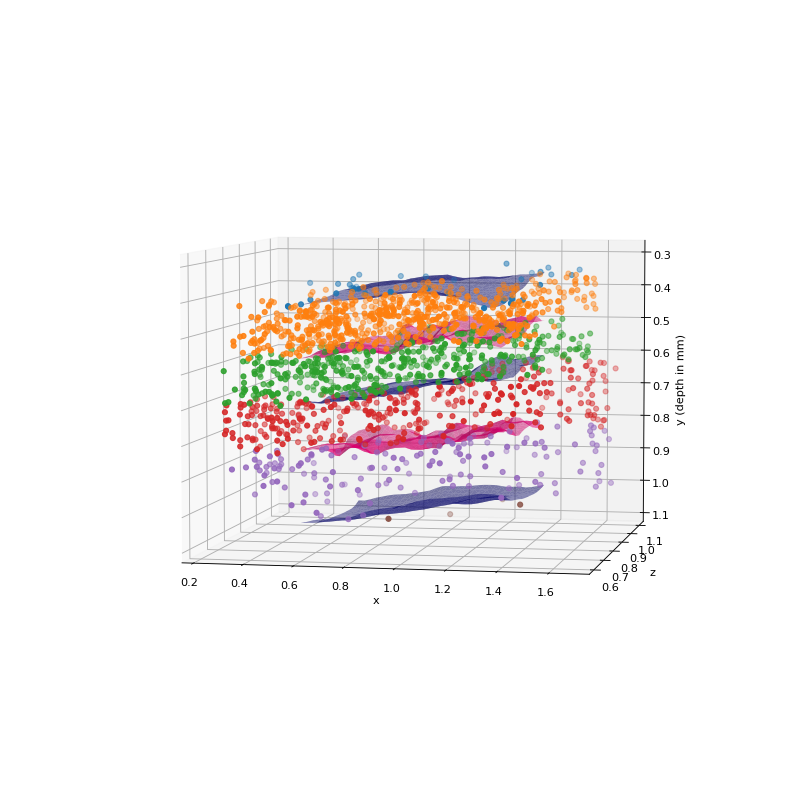

Text(0.5, 0, 'z')

In [10]:
%matplotlib notebook
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection="3d")
centers = np.array(smooth_pred.cols_nm).mean(axis=1) / 1_000_000

for j in range(5):
    ax.plot_trisurf(centers[:, 0], centers[:, 2], smooth_pred.bounds[:, j], color=(j % 2, 0, 0.5, 0.5))
for layer in np.unique(bpc_layers):
    idxs = bpc_layers == layer
    ax.scatter(bpc_locs_nm[idxs, 0] / 1_000_000, bpc_locs_nm[idxs, 2] / 1_000_000, bpc_locs_nm[idxs, 1] / 1_000_000, s=20)
ax.invert_zaxis()
ax.set_zlabel("y (depth in mm)")
ax.set_xlabel("x")
ax.set_ylabel("z")

# Everything Below Here Is Just Experimentation/Further Analysis

### set parameters

In [3]:
# bounding box of the proofread column we're interested in
bbox = np.array([[ 672444., 200000., 805320.], [ 772444., 1294000., 905320.]]) + np.array([000_000, 0, 0]) # nm
resolution = np.array([4., 4., 40.])
bbox /= resolution


In [4]:
bin_width = 0.05
step_size = 0.005
y_resolution = 4  # nm per voxel

In [5]:
labels = np.array([107000, 147000, 184000, 224000, 265000]) * y_resolution / 1_000_000  # manual labels

# Gather data

In [6]:
datastack_name = "minnie65_phase3_v1"
client = CAVEclient(datastack_name)

In [7]:
auto_cells = client.materialize.query_table("allen_soma_coarse_cell_class_model_v1")
auto_cells["num_soma"] = auto_cells.groupby("pt_root_id").transform("count")["valid"]
cells_by_root = auto_cells.copy()
cells_by_root.index = cells_by_root.pt_root_id
valid_ids = set(auto_cells.query("num_soma == 1").pt_root_id)

In [8]:
soma_features = pd.read_pickle("Minnie_soma_nuc_feature_model_83_1.pkl")

nuc_to_root = client.materialize.query_table("nucleus_neuron_svm")

nuc_to_root.index = nuc_to_root.id

soma_features["seg_id"] = [nuc_to_root.loc[n].pt_root_id for n in soma_features.nuc_id]
soma_features.index = soma_features.seg_id
soma_features.columns  
# size is equal to nucleus volume
# soma area and nucleus area closely track their respective volumes
# avg sdf is a list of the 'diameters' of processes (e.g. dendrites) that leave each cell body

Index(['index', 'nucleus_area', 'nucleus_area_to_volume',
       'nucleus_center_mass_nm', 'nucleus_fold_area', 'nucleus_fract_fold',
       'nucleus_id', 'nucleus_volume', 'cleft_segid', 'size', 'centroid_x',
       'centroid_y', 'centroid_z', 'yr_um_translated', 'predict',
       'is_watertight', 'soma_center_mass', 'soma_volume', 'soma_area',
       'soma_area_to_volume', 'num_processes', 'avg_sdf', 'orients', 'vectors',
       'n_soma_syn', 'soma_syn_density', 'nuc_id', 'seg_id', 'soma_y',
       'soma_x', 'soma_z', 'xr', 'yr', 'nucleus_to_soma', 'sum_proc_sdf',
       'cell_type_pred_num', 'cell_type_pred', 'umapx', 'umapy', 'visible',
       'outline_color', 'outline_width', 'max_sdf'],
      dtype='object')

In [9]:
soma_features_root_ids = set(soma_features.seg_id)

In [10]:
features = ["soma_volume"] #, "n_soma_syn", "nucleus_volume", "nucleus_fract_fold", "sum_proc_sdf", "nucleus_to_soma"]

In [11]:
def in_bbox(p, bbox):
    """ returns whether point is between the two points given by bbox"""
    lower, upper = bbox
    return lower[0] <= p[0] < upper[0] and lower[1] <= p[1] < upper[1] and lower[2] <= p[2] < upper[2]

auto_col_cells = auto_cells[auto_cells.pt_position.apply(in_bbox, args=[bbox])].copy()
# add soma features columns to auto_col_cells
for feature in features:
    auto_col_cells[feature] = [(soma_features.loc[r][feature] if r in soma_features_root_ids and type(soma_features.loc[r][feature]) is not pd.Series else np.nan)
                           for r in auto_col_cells.pt_root_id]
auto_exc_cells = auto_col_cells.query("classification_system == 'aibs_coarse_excitatory'")
auto_inh_cells = auto_col_cells.query("classification_system == 'aibs_coarse_inhibitory'")

In [12]:
bbox

array([[168111.,  50000.,  20133.],
       [193111., 323500.,  22633.]])

In [13]:
cell_types = ["exc", "BC", "BPC", "MC", "NGC"]
ctype_to_layer = {"23P": "23",
                 "4P": "4",
                 "5P_PT": "5",
                 "5P_IT": "5",
                 "5P_NP": "5",
                 "6P": "6",
                 "6CT": "6",
                 "6IT": "6"}

# Clean up and plot automatic layer boundaries

In [12]:
seg_low_um = np.array([130_000, 50_000,
                       15_000]) * resolution / 1_000  # conservative bbox only containing well-segmented areas
seg_up_um = np.array([355_000, 323_500, 27_500]) * resolution / 1_000
seg_size_um = seg_up_um - seg_low_um
seg_bounds_vx = np.array([seg_low_um, seg_up_um]) * 1_000 / resolution

step_size_um = 25
col_size = np.array([100, 100])  # x and z dimensions of column
# THE CORRECT WAY : ngridpts = ((seg_size_um[[0, 2]] - col_size) // step_size_um + 1).astype(int)  # number of grid points in x and z directions
ngridpts = ((seg_size_um[[0, 2]] - col_size) // step_size_um).astype(int)  # number of grid points in x and z directions
col_center_xs = np.linspace(seg_low_um[0] + col_size[0] // 2, seg_up_um[0] - col_size[0] // 2, ngridpts[0])
col_center_zs = np.linspace(seg_low_um[2] + col_size[1] // 2, seg_up_um[2] - col_size[1] // 2, ngridpts[1])

cols_nm = []
offx = col_size[0] // 2
offz = col_size[1] // 2
col_centers_um = []
for i, x in enumerate(col_center_xs):
    for z in col_center_zs[::(-1) ** i]:
        col_low = [x - offx, seg_low_um[1], z - offz]
        col_up = [x + offx, seg_up_um[1], z + offz]
        cols_nm.append(np.array([col_low, col_up]) * 1_000)
        col_centers_um.append(np.array([x, z]))
col_centers_um = np.array(col_centers_um)

In [13]:
# flat_bbox = cols_nm[13].copy()
# flat_bbox[1, 1] = 700_000.
# flat_bbox /= resolution
# flat_cells = client.materialize.query_table("nucleus_neuron_svm", filter_spatial_dict={"pt_position": flat_bbox})
# flat_cells.sample(20).pt_root_id.values

Text(0, 0.5, 'z')

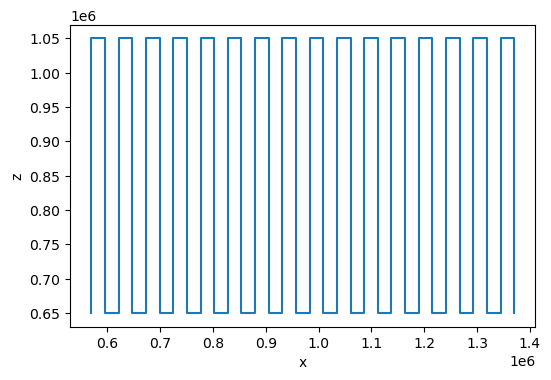

In [14]:
# show that it snakes back and forth
fig = plt.figure(dpi=100)
ax = fig.add_subplot()
cols_arr_nm = np.array(cols_nm)
plot_cols = cols_arr_nm[:, :, [0, 2]].mean(axis=1)
ax.plot(plot_cols[:, 0], plot_cols[:, 1])
ax.set_xlabel("x")
ax.set_ylabel("z")

In [15]:
# from LayerPredictor
# 50 micron step
# minnie_bounds = np.array([[0.4123948235294118, 0.5628360000000001, 0.6878360000000003, 0.8278360000000005, 1.0294269090909096], [0.41233600000000004, 0.5628360000000001, 0.6878360000000003, 0.8378360000000005, 1.0428360000000008], [0.41346400000000005, 0.5749640000000003, 0.7049640000000004, 0.8399640000000004, 1.0562140000000007], [0.4105453333333334, 0.5672120000000002, 0.7022120000000003, 0.8572120000000004, 1.0647120000000005], [0.40784000000000004, 0.5443400000000002, 0.7043400000000003, 0.8643400000000004, 1.0675542857142863], [0.4024501818181819, 0.5431320000000002, 0.7031320000000003, 0.8931320000000005, 1.0677748571428578], [0.4121704615384616, 0.5381320000000002, 0.7181320000000003, 0.8481320000000004, 1.0712570000000006], [0.4193366153846154, 0.5814520000000002, 0.7164520000000003, 0.8464520000000004, 1.0559520000000007], [0.41036100000000003, 0.5522360000000002, 0.7072360000000003, 0.8222360000000004, 1.0525931428571436], [0.3976133333333334, 0.5477800000000002, 0.7077800000000003, 0.8527800000000004, 1.0669466666666674], [0.3934618181818182, 0.5427800000000002, 0.7077800000000003, 0.8627800000000004, 1.064565714285715], [0.3978282352941177, 0.5847400000000003, 0.7047400000000004, 0.8597400000000004, 1.063668571428572], [0.40224000000000004, 0.5747400000000003, 0.7047400000000004, 0.8497400000000004, 1.0592400000000006], [0.4061306666666667, 0.5799640000000001, 0.6999640000000003, 0.8499640000000004, 1.0529640000000005], [0.40829907692307693, 0.5588760000000002, 0.6988760000000003, 0.8138760000000004, 1.0397093333333338], [0.4071813333333334, 0.5453480000000002, 0.6903480000000003, 0.8153480000000004, 1.0178480000000005], [0.4019912380952381, 0.5463960000000001, 0.6763960000000002, 0.8063960000000003, 1.0145210000000007], [0.4051742222222222, 0.5304520000000001, 0.6904520000000003, 0.8154520000000003, 1.0337853333333338], [0.41067200000000004, 0.5431720000000002, 0.6981720000000002, 0.8781720000000004, 1.0473386666666673], [0.40801600000000005, 0.5755160000000001, 0.7005160000000004, 0.8505160000000005, 1.051349333333334], [0.39493907692307695, 0.5705160000000002, 0.7005160000000004, 0.8255160000000004, 1.056349333333334], [0.38451076923076927, 0.5477800000000002, 0.6927800000000003, 0.8627800000000004, 1.0622800000000006], [0.38461333333333336, 0.5527800000000002, 0.7027800000000003, 0.8577800000000004, 1.054208571428572], [0.4035207272727273, 0.5537480000000001, 0.7037480000000003, 0.8237480000000004, 1.0432480000000006], [0.3945813333333334, 0.5537480000000001, 0.6987480000000004, 0.8437480000000004, 1.039581333333334], [0.37963054545454544, 0.5666760000000002, 0.6866760000000003, 0.8516760000000004, 1.0537913846153852], [0.3795, 0.5595000000000001, 0.6895000000000002, 0.8295000000000003, 1.0532500000000005], [0.391141, 0.5605160000000002, 0.6955160000000002, 0.8305160000000005, 1.0540160000000007], [0.40566305882352943, 0.5605160000000002, 0.7005160000000004, 0.8555160000000004, 1.0523910000000005], [0.40776611764705883, 0.5549720000000001, 0.6949720000000003, 0.8749720000000004, 1.0434720000000006], [0.4036684444444445, 0.5267240000000002, 0.6917240000000002, 0.8117240000000003, 1.0275573333333339], [0.397224, 0.5217240000000001, 0.6717240000000002, 0.7967240000000004, 1.0148490000000006], [0.39196436363636367, 0.5208280000000001, 0.6708280000000002, 0.8008280000000003, 1.0083280000000006], [0.4008906666666667, 0.5217240000000001, 0.6767240000000003, 0.8317240000000004, 1.0217240000000007], [0.4055672380952381, 0.5199720000000001, 0.7099720000000003, 0.8499720000000004, 1.0344720000000005], [0.40063815384615387, 0.5542920000000002, 0.7042920000000004, 0.8492920000000004, 1.0411670000000006], [0.38635600000000003, 0.5563560000000002, 0.6913560000000003, 0.8413560000000004, 1.0463560000000007], [0.377, 0.5645000000000002, 0.6895000000000002, 0.8245000000000005, 1.0482500000000006], [0.3760422857142857, 0.5578280000000002, 0.6878280000000003, 0.8378280000000005, 1.0540780000000007], [0.3913106666666667, 0.49964400000000014, 0.6846440000000003, 0.8346440000000004, 1.0341440000000006], [0.388956, 0.4939560000000001, 0.6939560000000002, 0.8539560000000004, 1.0294560000000006], [0.37336800000000003, 0.5028680000000001, 0.6828680000000003, 0.8328680000000004, 1.0423680000000006], [0.37099200000000004, 0.5484920000000002, 0.6834920000000003, 0.8484920000000005, 1.0415475555555562], [0.38252800000000003, 0.5630280000000002, 0.6830280000000003, 0.8280280000000004, 1.0295280000000007], [0.3984446666666667, 0.5730280000000002, 0.6780280000000003, 0.8280280000000004, 1.0299030000000005], [0.3999626666666667, 0.5717960000000002, 0.6817960000000003, 0.8517960000000004, 1.0267960000000005], [0.39353600000000005, 0.5540360000000002, 0.6740360000000003, 0.8290360000000004, 1.0140360000000006], [0.3876137142857143, 0.5458280000000002, 0.6558280000000003, 0.7708280000000003, 0.9889530000000005], [0.38161723076923076, 0.5283480000000002, 0.6583480000000003, 0.7883480000000004, 0.9841813333333339], [0.3867588571428572, 0.5571160000000002, 0.6571160000000003, 0.8271160000000004, 1.0121160000000007], [0.39331688888888894, 0.5644280000000002, 0.6794280000000004, 0.8294280000000005, 1.0255643636363643], [0.3863613333333334, 0.5630280000000002, 0.6780280000000003, 0.8330280000000004, 1.0330280000000007], [0.3705986666666667, 0.5639320000000002, 0.6789320000000003, 0.8239320000000004, 1.0314320000000006], [0.361756, 0.5407560000000002, 0.6757560000000002, 0.8457560000000004, 1.0332560000000006], [0.3635236923076923, 0.5287160000000002, 0.6787160000000003, 0.8537160000000005, 1.0302160000000007], [0.38288457142857146, 0.5289560000000002, 0.6939560000000002, 0.8339560000000004, 1.0153448888888896], [0.3832106666666667, 0.5240440000000002, 0.6890440000000003, 0.8290440000000004, 1.0075440000000007], [0.359341, 0.48871600000000015, 0.6887160000000003, 0.8537160000000005, 1.024549333333334], [0.363756, 0.5157560000000001, 0.6707560000000004, 0.8407560000000005, 1.0317560000000006], [0.3697653333333334, 0.5339320000000002, 0.6789320000000003, 0.8289320000000004, 1.0326820000000005], [0.37977200000000005, 0.5447720000000003, 0.6747720000000004, 0.8297720000000004, 1.0289386666666673], [0.3894942222222223, 0.5147720000000002, 0.6797720000000003, 0.8297720000000004, 1.018700571428572], [0.38231576470588235, 0.4804040000000001, 0.6654040000000003, 0.7954040000000004, 1.0000468571428576], [0.373848, 0.5283480000000002, 0.6433480000000003, 0.7833480000000004, 0.9791813333333339], [0.36908, 0.5165800000000002, 0.6415800000000003, 0.7765800000000004, 0.9665800000000005], [0.3782165, 0.5154040000000002, 0.6454040000000003, 0.8104040000000003, 0.9879040000000006], [0.3815027692307693, 0.5097720000000001, 0.6597720000000002, 0.8397720000000004, 1.0062720000000005], [0.37870800000000004, 0.5247080000000002, 0.6597080000000003, 0.8647080000000005, 1.0227080000000006], [0.37448228571428577, 0.5162680000000002, 0.6612680000000003, 0.8462680000000005, 1.0267680000000006], [0.36432355555555557, 0.5012680000000002, 0.6662680000000003, 0.8312680000000005, 1.0273394285714292], [0.3622434285714286, 0.5011720000000002, 0.6761720000000003, 0.8261720000000005, 1.0175608888888896], [0.3870053333333334, 0.5011720000000002, 0.6811720000000003, 0.8361720000000005, 1.0015291428571436], [0.3765291428571429, 0.47117200000000015, 0.6711720000000003, 0.8261720000000005, 1.0020053333333339], [0.36617200000000005, 0.49117200000000016, 0.6661720000000003, 0.8111720000000004, 1.0136720000000006], [0.36753155555555556, 0.5044760000000001, 0.6644760000000003, 0.7994760000000004, 1.0229760000000006], [0.3756123636363637, 0.49947600000000014, 0.6644760000000003, 0.7994760000000004, 1.0186426666666673], [0.38183911111111113, 0.4982280000000001, 0.6582280000000003, 0.8332280000000004, 1.0169780000000006], [0.390228, 0.4682280000000001, 0.6582280000000003, 0.8282280000000004, 1.005172444444445], [0.3802221538461539, 0.5088760000000001, 0.6388760000000002, 0.8088760000000004, 0.9813760000000006], [0.36824666666666667, 0.5165800000000002, 0.6315800000000003, 0.7715800000000004, 0.9547942857142863], [0.37083314285714286, 0.4804760000000001, 0.6254760000000003, 0.7854760000000004, 0.9529760000000005], [0.3843396363636364, 0.5054760000000001, 0.6304760000000003, 0.8054760000000004, 0.9754760000000006], [0.3978791111111112, 0.5142680000000002, 0.6542680000000003, 0.8242680000000004, 0.9955180000000006], [0.38968466666666673, 0.49926800000000016, 0.6592680000000003, 0.8292680000000004, 1.0030180000000006], [0.3811658181818182, 0.5004840000000002, 0.6454840000000003, 0.8304840000000004, 1.0117340000000006], [0.3675880000000001, 0.5175880000000002, 0.6425880000000004, 0.8275880000000004, 1.0160880000000008], [0.3650880000000001, 0.4825880000000002, 0.6375880000000003, 0.8275880000000004, 1.0090880000000007], [0.37945244444444454, 0.48250800000000016, 0.6375080000000003, 0.8225080000000005, 1.0033413333333339], [0.37995200000000007, 0.48245200000000016, 0.6174520000000003, 0.8324520000000004, 0.9999520000000006], [0.3610880000000001, 0.5075880000000002, 0.6225880000000004, 0.8275880000000004, 1.018421333333334], [0.3600880000000001, 0.5225880000000003, 0.6325880000000004, 0.8025880000000005, 1.0129451428571434], [0.38045818181818186, 0.5061400000000001, 0.6411400000000003, 0.8011400000000004, 1.0036400000000005], [0.3918218181818182, 0.5011400000000001, 0.6561400000000003, 0.7861400000000004, 1.0023900000000006], [0.39605371428571434, 0.49926800000000016, 0.6392680000000003, 0.8142680000000004, 0.9905180000000007], [0.38678333333333337, 0.5097000000000002, 0.6297000000000003, 0.7847000000000004, 0.9622000000000006], [0.38353600000000004, 0.5100360000000002, 0.6200360000000003, 0.8000360000000004, 0.948369333333334], [0.3919804444444445, 0.5150360000000002, 0.6150360000000002, 0.7600360000000004, 0.9415360000000005], [0.399901090909091, 0.5114920000000002, 0.6364920000000003, 0.7764920000000004, 0.9609920000000005], [0.39788700000000005, 0.5360120000000002, 0.6260120000000002, 0.8110120000000004, 0.9877977142857148], [0.39214000000000004, 0.5111400000000001, 0.6411400000000003, 0.7811400000000004, 1.0006400000000006], [0.3819733333333334, 0.49614000000000014, 0.6361400000000003, 0.7861400000000004, 0.9967650000000006], [0.3705813333333334, 0.5097480000000001, 0.6247480000000003, 0.7997480000000003, 1.013081333333334], [0.36299600000000004, 0.49199600000000016, 0.6319960000000002, 0.7969960000000005, 1.0188710000000007], [0.36995200000000006, 0.49245200000000017, 0.6324520000000002, 0.7874520000000005, 1.0049520000000007], [0.36212200000000005, 0.5033720000000002, 0.6133720000000003, 0.8083720000000005, 1.0042053333333338], [0.3667182222222223, 0.5019960000000001, 0.6119960000000002, 0.7919960000000004, 1.0176210000000006], [0.37494030769230774, 0.4797480000000001, 0.6197480000000002, 0.7897480000000003, 0.9989146666666673], [0.38602800000000004, 0.49702800000000014, 0.6320280000000003, 0.7870280000000004, 0.9970280000000006], [0.390668, 0.5406680000000001, 0.6256680000000002, 0.8156680000000004, 0.9931680000000005], [0.39992000000000005, 0.5344200000000001, 0.6244200000000002, 0.8194200000000005, 0.9769200000000006], [0.4027533333333334, 0.5144200000000001, 0.6244200000000002, 0.7794200000000004, 0.9600450000000006], [0.40198030769230775, 0.5167880000000001, 0.6067880000000002, 0.7617880000000004, 0.9365102222222227], [0.4162106666666667, 0.5170440000000001, 0.6120440000000003, 0.7420440000000004, 0.9355440000000005], [0.40384307692307697, 0.5194200000000002, 0.6244200000000002, 0.7744200000000003, 0.9560866666666672], [0.3945549090909091, 0.5029640000000002, 0.6279640000000002, 0.7829640000000004, 0.9796306666666672], [0.38764400000000004, 0.5226440000000001, 0.6226440000000002, 0.7876440000000005, 0.9863940000000005], [0.3820763636363637, 0.48594000000000015, 0.6159400000000003, 0.7859400000000004, 1.0024400000000007], [0.3680633846153847, 0.46094800000000014, 0.6159480000000003, 0.7809480000000004, 1.0059480000000005], [0.3660036363636364, 0.4921400000000002, 0.6121400000000004, 0.7871400000000004, 1.0096400000000005], [0.36170533333333343, 0.5033720000000002, 0.6033720000000002, 0.8283720000000006, 1.0042053333333338], [0.3494426666666667, 0.5002760000000002, 0.6052760000000003, 0.8302760000000005, 0.996109333333334], [0.36023200000000005, 0.48773200000000017, 0.6027320000000003, 0.7877320000000004, 1.0042320000000007], [0.35932290909090914, 0.48273200000000016, 0.6127320000000003, 0.7927320000000004, 1.0012320000000006], [0.36928888888888894, 0.5029000000000001, 0.6079000000000003, 0.7929000000000004, 0.9970666666666673], [0.383464, 0.5179640000000001, 0.6029640000000003, 0.7979640000000003, 0.9879640000000005], [0.39021600000000006, 0.5077160000000002, 0.6027160000000003, 0.8027160000000004, 0.9789660000000007], [0.40126200000000006, 0.5200120000000001, 0.6150120000000002, 0.7650120000000004, 0.9587620000000006], [0.4053691428571429, 0.5250120000000001, 0.6150120000000002, 0.7300120000000003, 0.9375120000000006]])
# 25 micron step
minnie_bounds = np.asarray([[0.4123948235294118, 0.5628360000000001, 0.6878360000000003, 0.8278360000000005, 1.0294269090909096], [0.41319314285714287, 0.5628360000000001, 0.6878360000000003, 0.8228360000000003, 1.0383360000000006], [0.41390742857142865, 0.5678360000000002, 0.6878360000000003, 0.8378360000000005, 1.0428360000000005], [0.41246400000000005, 0.5749640000000003, 0.6999640000000003, 0.8349640000000005, 1.0512140000000005], [0.4129185454545455, 0.5749640000000003, 0.7049640000000004, 0.8349640000000005, 1.055797333333334], [0.41155490909090914, 0.5699640000000001, 0.7149640000000004, 0.8499640000000004, 1.0562140000000007], [0.4119847272727273, 0.5672120000000002, 0.7022120000000003, 0.8572120000000004, 1.0609620000000006], [0.41122800000000004, 0.5702280000000002, 0.7002280000000003, 0.8552280000000004, 1.0647280000000006], [0.4096177777777778, 0.5643400000000002, 0.6993400000000003, 0.8643400000000004, 1.0653400000000006], [0.4051733333333334, 0.5643400000000002, 0.7043400000000003, 0.8893400000000005, 1.0674650000000008], [0.40255428571428575, 0.5643400000000002, 0.7043400000000003, 0.8893400000000005, 1.0693400000000006], [0.4018820000000001, 0.5631320000000002, 0.7081320000000003, 0.8781320000000005, 1.0712570000000006], [0.4043820000000001, 0.5681320000000002, 0.7081320000000003, 0.8481320000000004, 1.0713462857142864], [0.41313200000000005, 0.5681320000000002, 0.7181320000000003, 0.8481320000000004, 1.0725070000000008], [0.41413200000000006, 0.5681320000000002, 0.7181320000000003, 0.8481320000000004, 1.0706320000000007], [0.4193366153846154, 0.5814520000000002, 0.7164520000000003, 0.8464520000000004, 1.0559520000000007], [0.41495200000000004, 0.5714520000000002, 0.7114520000000003, 0.8314520000000004, 1.0581186666666673], [0.41149600000000003, 0.5679960000000002, 0.7129960000000003, 0.8479960000000004, 1.0711210000000007], [0.4086355555555556, 0.5605800000000002, 0.7055800000000003, 0.8505800000000004, 1.0730800000000007], [0.39808000000000004, 0.5705800000000002, 0.7055800000000003, 0.8505800000000004, 1.0709371428571435], [0.39808000000000004, 0.5655800000000002, 0.7055800000000003, 0.8655800000000005, 1.0716514285714291], [0.39860631578947375, 0.5655800000000002, 0.7105800000000003, 0.8655800000000005, 1.0709371428571435], [0.40011284210526316, 0.5828760000000002, 0.7078760000000003, 0.8628760000000004, 1.0660902857142862], [0.40104266666666666, 0.5778760000000002, 0.7078760000000003, 0.8578760000000004, 1.0653760000000005], [0.40394742857142857, 0.5728760000000002, 0.7078760000000003, 0.8578760000000004, 1.0645426666666673], [0.40346200000000004, 0.5672120000000002, 0.7072120000000003, 0.8572120000000004, 1.0615870000000007], [0.4061003636363637, 0.5749640000000003, 0.7149640000000004, 0.8499640000000004, 1.0555890000000006], [0.4085188571428572, 0.5788760000000002, 0.7038760000000003, 0.8438760000000004, 1.0543760000000006], [0.4081617142857143, 0.5738760000000002, 0.7038760000000003, 0.8388760000000004, 1.0452648888888896], [0.41099138461538465, 0.5588760000000002, 0.6988760000000003, 0.8338760000000004, 1.0395010000000005], [0.4098375384615385, 0.5638760000000002, 0.6938760000000003, 0.8138760000000004, 1.0330426666666672], [0.4095146666666667, 0.5653480000000002, 0.6903480000000003, 0.8203480000000004, 1.0253480000000006], [0.4071813333333334, 0.5503480000000002, 0.6903480000000003, 0.8153480000000004, 1.0178480000000005], [0.40679266666666664, 0.5388760000000001, 0.6888760000000003, 0.8188760000000004, 1.0335188571428577], [0.40762600000000004, 0.5638760000000002, 0.7038760000000003, 0.8138760000000004, 1.0406617142857149], [0.40604266666666666, 0.5588760000000002, 0.7038760000000003, 0.8138760000000004, 1.0458760000000007], [0.40575100000000003, 0.5838760000000002, 0.7038760000000003, 0.8488760000000004, 1.052804571428572], [0.40454733333333337, 0.5749640000000003, 0.7049640000000004, 0.8549640000000005, 1.0535751111111116], [0.40324000000000004, 0.5747400000000003, 0.7147400000000004, 0.8497400000000004, 1.0572400000000006], [0.40416307692307696, 0.5747400000000003, 0.7147400000000004, 0.8497400000000004, 1.0597400000000006], [0.4006775, 0.5847400000000003, 0.7047400000000004, 0.8597400000000004, 1.063073333333334], [0.39824000000000004, 0.5847400000000003, 0.6997400000000003, 0.8597400000000004, 1.0647400000000005], [0.3961434285714286, 0.5825720000000002, 0.6975720000000003, 0.8725720000000005, 1.0650720000000007], [0.39536611764705887, 0.5825720000000002, 0.7075720000000003, 0.8625720000000004, 1.0650720000000007], [0.39507200000000003, 0.5475720000000002, 0.7075720000000003, 0.8475720000000004, 1.0644470000000006], [0.3987386666666667, 0.5575720000000002, 0.7075720000000003, 0.8525720000000004, 1.0663220000000007], [0.4014026666666667, 0.5572360000000002, 0.7072360000000003, 0.8522360000000004, 1.0639026666666673], [0.40973600000000004, 0.5522360000000002, 0.7072360000000003, 0.8472360000000004, 1.0525931428571436], [0.4033426666666667, 0.5516760000000002, 0.7016760000000003, 0.8216760000000004, 1.0466760000000006], [0.3975093333333334, 0.5516760000000002, 0.7066760000000003, 0.8516760000000004, 1.0571760000000006], [0.39209818181818185, 0.5577800000000002, 0.7077800000000003, 0.8577800000000004, 1.0602800000000006], [0.3884618181818182, 0.5477800000000002, 0.7077800000000003, 0.8627800000000004, 1.0622800000000006], [0.3884618181818182, 0.5427800000000002, 0.7027800000000003, 0.8677800000000004, 1.0627800000000005], [0.3893027692307693, 0.5725720000000002, 0.7025720000000003, 0.8775720000000005, 1.0630720000000007], [0.39416307692307695, 0.5797400000000001, 0.6997400000000003, 0.8597400000000004, 1.0615257142857148], [0.3988189473684211, 0.5697400000000001, 0.7047400000000004, 0.8597400000000004, 1.0550971428571436], [0.40224000000000004, 0.5697400000000001, 0.7047400000000004, 0.8547400000000005, 1.0526945454545462], [0.4059900000000001, 0.5647400000000002, 0.7147400000000004, 0.8547400000000005, 1.0522400000000007], [0.40837309090909096, 0.5599640000000001, 0.7099640000000003, 0.8799640000000004, 1.0528211428571435], [0.40804266666666666, 0.5638760000000002, 0.7038760000000003, 0.8738760000000004, 1.0497093333333338], [0.406376, 0.5588760000000002, 0.6988760000000003, 0.8138760000000004, 1.0438760000000005], [0.40470933333333337, 0.5588760000000002, 0.6938760000000003, 0.8138760000000004, 1.035661714285715], [0.40461129411764707, 0.5288760000000001, 0.6888760000000003, 0.8088760000000004, 1.0272093333333339], [0.40384800000000004, 0.5553480000000002, 0.6853480000000003, 0.8053480000000004, 1.0161813333333338], [0.4025802105263158, 0.5563960000000001, 0.6763960000000002, 0.8063960000000003, 1.0151460000000005], [0.4036018823529412, 0.5313960000000002, 0.6763960000000002, 0.8113960000000005, 1.0228960000000007], [0.4050702222222223, 0.5303480000000002, 0.6903480000000003, 0.8153480000000004, 1.0317368888888896], [0.4061813333333334, 0.5203480000000001, 0.6953480000000003, 0.8153480000000004, 1.0398480000000005], [0.41019066666666665, 0.5785240000000001, 0.6935240000000003, 0.8735240000000004, 1.047452571428572], [0.4098866666666667, 0.5482200000000002, 0.6982200000000003, 0.8782200000000004, 1.0492914285714292], [0.40795428571428577, 0.5647400000000002, 0.7097400000000003, 0.8397400000000004, 1.0472400000000006], [0.40489100000000006, 0.5705160000000002, 0.7055160000000003, 0.8555160000000004, 1.0508731428571434], [0.3996826666666667, 0.5705160000000002, 0.7005160000000004, 0.8405160000000005, 1.0530160000000006], [0.39373028571428575, 0.5705160000000002, 0.7005160000000004, 0.8355160000000004, 1.062301714285715], [0.3862258461538462, 0.5575720000000002, 0.6925720000000003, 0.8675720000000005, 1.0642386666666672], [0.38451076923076927, 0.5477800000000002, 0.6977800000000003, 0.8627800000000004, 1.0632800000000007], [0.38236333333333333, 0.5477800000000002, 0.7027800000000003, 0.8577800000000004, 1.0644466666666674], [0.3849228571428572, 0.5577800000000002, 0.7027800000000003, 0.8527800000000004, 1.0552800000000007], [0.3903389090909091, 0.5587480000000002, 0.7037480000000003, 0.8237480000000004, 1.0531710769230775], [0.402498, 0.5537480000000001, 0.7037480000000003, 0.8237480000000004, 1.0442480000000007], [0.40215709090909096, 0.5487480000000002, 0.7037480000000003, 0.8187480000000005, 1.0387480000000004], [0.38624800000000004, 0.5637480000000001, 0.7037480000000003, 0.8287480000000005, 1.0504146666666674], [0.3822030769230769, 0.5677800000000002, 0.6977800000000003, 0.8477800000000004, 1.0531966666666672], [0.3813911111111111, 0.5577800000000002, 0.7027800000000003, 0.8327800000000004, 1.0602800000000006], [0.38255272727272727, 0.5527800000000002, 0.7027800000000003, 0.8327800000000004, 1.0562800000000006], [0.38533333333333336, 0.5595000000000001, 0.6895000000000002, 0.8345000000000005, 1.0607500000000007], [0.39161538461538464, 0.5695000000000001, 0.6945000000000003, 0.8395000000000004, 1.0620000000000007], [0.39989100000000005, 0.5705160000000002, 0.7005160000000004, 0.8305160000000005, 1.0519048888888896], [0.40520350000000005, 0.5655160000000001, 0.7005160000000004, 0.8505160000000005, 1.051587428571429], [0.4085733333333334, 0.5647400000000002, 0.6997400000000003, 0.8547400000000005, 1.0497400000000008], [0.4082614736842105, 0.5599720000000001, 0.6899720000000003, 0.8799720000000004, 1.0493470000000005], [0.40802755555555553, 0.5599720000000001, 0.6949720000000003, 0.8749720000000004, 1.0480275555555563], [0.4062658823529412, 0.5340600000000002, 0.6890600000000002, 0.8140600000000004, 1.0398933333333338], [0.40406000000000003, 0.5290600000000001, 0.6890600000000002, 0.8140600000000004, 1.0301314285714291], [0.4025802105263158, 0.5263960000000001, 0.6763960000000002, 0.8163960000000003, 1.0216232727272734], [0.4004806956521739, 0.5553720000000002, 0.6753720000000003, 0.8053720000000004, 1.0128720000000007], [0.3985573333333334, 0.5217240000000001, 0.6717240000000002, 0.7967240000000004, 1.0142240000000005], [0.402224, 0.5217240000000001, 0.6717240000000002, 0.8067240000000004, 1.020762461538462], [0.404224, 0.5217240000000001, 0.6717240000000002, 0.8117240000000003, 1.0238668571428577], [0.40599799999999997, 0.5287480000000001, 0.6937480000000003, 0.8137480000000004, 1.0341051428571435], [0.40699580952380954, 0.5549720000000001, 0.6949720000000003, 0.8349720000000004, 1.0449720000000005], [0.40641936842105264, 0.5599720000000001, 0.6899720000000003, 0.8799720000000004, 1.0481862857142863], [0.40679200000000004, 0.5642920000000002, 0.6992920000000002, 0.8442920000000005, 1.0497920000000007], [0.4023017142857143, 0.5605160000000002, 0.7005160000000004, 0.8605160000000005, 1.0519048888888896], [0.3963493333333334, 0.5605160000000002, 0.7005160000000004, 0.8405160000000005, 1.0525614545454551], [0.388, 0.5645000000000002, 0.6945000000000003, 0.8345000000000005, 1.0570000000000006], [0.382, 0.5595000000000001, 0.6895000000000002, 0.8295000000000003, 1.055333333333334], [0.3796470588235294, 0.5595000000000001, 0.6895000000000002, 0.8295000000000003, 1.0510625000000005], [0.37825, 0.5595000000000001, 0.6895000000000002, 0.8495000000000004, 1.0557500000000006], [0.381176, 0.5666760000000002, 0.6866760000000003, 0.8466760000000004, 1.0506760000000006], [0.3845813333333334, 0.5637480000000001, 0.6887480000000004, 0.8487480000000005, 1.047676571428572], [0.3991051428571429, 0.5487480000000002, 0.6987480000000004, 0.8487480000000005, 1.0362480000000005], [0.3920813333333334, 0.5487480000000002, 0.6987480000000004, 0.8337480000000004, 1.0345813333333338], [0.38215709090909095, 0.5537480000000001, 0.6837480000000002, 0.8437480000000004, 1.0472480000000006], [0.3764391111111111, 0.5628280000000001, 0.6878280000000003, 0.8478280000000005, 1.0497030000000005], [0.3755, 0.5595000000000001, 0.6895000000000002, 0.8345000000000005, 1.0595000000000008], [0.3777142857142857, 0.5645000000000002, 0.6895000000000002, 0.8295000000000003, 1.0499166666666673], [0.381, 0.5645000000000002, 0.6895000000000002, 0.8295000000000003, 1.0545000000000004], [0.38825, 0.5595000000000001, 0.6945000000000003, 0.8345000000000005, 1.0520000000000005], [0.39493907692307695, 0.5555160000000001, 0.7005160000000004, 0.8355160000000004, 1.0505160000000004], [0.4010929230769231, 0.5555160000000001, 0.7005160000000004, 0.8405160000000005, 1.0511410000000005], [0.4052295, 0.5642920000000002, 0.6992920000000002, 0.8342920000000005, 1.0484586666666673], [0.40532914285714283, 0.5599720000000001, 0.6899720000000003, 0.8649720000000004, 1.0441386666666672], [0.4059502608695652, 0.5499720000000001, 0.6949720000000003, 0.8299720000000004, 1.0394720000000006], [0.40562023529411767, 0.5325320000000001, 0.6925320000000003, 0.8175320000000004, 1.0323396923076928], [0.4020811428571429, 0.5217240000000001, 0.6917240000000002, 0.8117240000000003, 1.0242240000000007], [0.399328, 0.5158280000000002, 0.6758280000000003, 0.8108280000000003, 1.0192370909090915], [0.395828, 0.5158280000000002, 0.6758280000000003, 0.7958280000000004, 1.0126137142857148], [0.39196436363636367, 0.5158280000000002, 0.6708280000000002, 0.8008280000000003, 1.0083280000000006], [0.3966613333333333, 0.5158280000000002, 0.6758280000000003, 0.8208280000000003, 1.0149946666666672], [0.39993828571428575, 0.5217240000000001, 0.6867240000000003, 0.8267240000000005, 1.0211470769230775], [0.40369866666666665, 0.5325320000000001, 0.6925320000000003, 0.8275320000000004, 1.0275320000000006], [0.40383563636363634, 0.5499720000000001, 0.7099720000000003, 0.8299720000000004, 1.0319164444444449], [0.4036484705882353, 0.5599720000000001, 0.6999720000000003, 0.8649720000000004, 1.0399720000000006], [0.4014978823529412, 0.5592920000000001, 0.7042920000000004, 0.8442920000000005, 1.0442920000000004], [0.39579200000000003, 0.5542920000000002, 0.7042920000000004, 0.8442920000000005, 1.0480420000000006], [0.3902535384615385, 0.5492920000000001, 0.7042920000000004, 0.8392920000000004, 1.0492920000000008], [0.38533333333333336, 0.5595000000000001, 0.6945000000000003, 0.8395000000000004, 1.0470000000000006], [0.3795, 0.5595000000000001, 0.6895000000000002, 0.8295000000000003, 1.0512857142857148], [0.37533333333333335, 0.5645000000000002, 0.6845000000000003, 0.8295000000000003, 1.0498571428571435], [0.37422222222222223, 0.5645000000000002, 0.6895000000000002, 0.8345000000000005, 1.0512857142857148], [0.37699466666666664, 0.5528280000000001, 0.6878280000000003, 0.8428280000000004, 1.0515780000000006], [0.38214400000000004, 0.49464400000000014, 0.6896440000000004, 0.8446440000000004, 1.0481440000000006], [0.39214400000000005, 0.5296440000000002, 0.6896440000000004, 0.8346440000000004, 1.0341440000000006], [0.389008, 0.5315080000000001, 0.6915080000000002, 0.8365080000000005, 1.0290080000000006], [0.383172, 0.4931720000000001, 0.6881720000000002, 0.8331720000000005, 1.0431720000000007], [0.37852914285714284, 0.5081720000000001, 0.6881720000000002, 0.8331720000000005, 1.0481720000000005], [0.37483866666666665, 0.5631720000000002, 0.6831720000000003, 0.8481720000000004, 1.0523386666666672], [0.37416971428571427, 0.5598840000000002, 0.6848840000000003, 0.8498840000000004, 1.0513840000000005], [0.37595542857142855, 0.5548840000000002, 0.6898840000000003, 0.8298840000000004, 1.0493840000000005], [0.3824923636363637, 0.5563560000000002, 0.6863560000000003, 0.8413560000000004, 1.0449671111111116], [0.389292, 0.5492920000000001, 0.6842920000000003, 0.8442920000000005, 1.0447920000000006], [0.39563815384615386, 0.5642920000000002, 0.6792920000000002, 0.8642920000000005, 1.0403634285714292], [0.40000628571428576, 0.5642920000000002, 0.6842920000000003, 0.8542920000000005, 1.0374170000000005], [0.4041378461538462, 0.5654840000000001, 0.6854840000000002, 0.8654840000000004, 1.032529454545455], [0.4030311111111112, 0.5694200000000003, 0.6844200000000003, 0.8544200000000004, 1.0285866666666672], [0.403378105263158, 0.5790360000000002, 0.6790360000000003, 0.8540360000000005, 1.0232026666666674], [0.39903600000000006, 0.5490360000000002, 0.6740360000000003, 0.8290360000000004, 1.020107428571429], [0.3957026666666667, 0.5090360000000002, 0.6740360000000003, 0.8190360000000004, 1.0135360000000007], [0.391328, 0.5358280000000002, 0.6708280000000002, 0.8108280000000003, 1.0008280000000007], [0.389828, 0.5108280000000001, 0.6708280000000002, 0.7908280000000003, 0.9904708571428577], [0.3911193333333334, 0.4740360000000001, 0.6740360000000003, 0.8190360000000004, 1.0065360000000005], [0.3948693333333334, 0.49903600000000015, 0.6740360000000003, 0.8290360000000004, 1.0165360000000006], [0.3980744615384616, 0.4740360000000001, 0.6740360000000003, 0.8490360000000005, 1.0205360000000006], [0.39942000000000005, 0.5044200000000001, 0.6744200000000002, 0.8544200000000004, 1.0260109090909095], [0.4003674285714286, 0.5667960000000002, 0.7017960000000003, 0.8467960000000004, 1.0297960000000006], [0.39702800000000005, 0.5530280000000002, 0.6980280000000003, 0.8530280000000005, 1.0295280000000007], [0.39252800000000004, 0.5530280000000002, 0.6980280000000003, 0.8330280000000004, 1.0321946666666673], [0.3884446666666667, 0.5480280000000002, 0.6830280000000003, 0.8280280000000004, 1.0355280000000007], [0.38011133333333336, 0.5630280000000002, 0.6830280000000003, 0.8480280000000004, 1.0321946666666673], [0.37299200000000005, 0.5534920000000002, 0.6834920000000003, 0.8484920000000005, 1.0409920000000006], [0.37229107692307695, 0.5578680000000003, 0.6828680000000003, 0.8478680000000005, 1.0422430000000007], [0.3740043636363637, 0.5428680000000001, 0.6878680000000004, 0.8228680000000004, 1.0420346666666673], [0.3767965714285715, 0.5278680000000002, 0.6778680000000004, 0.8278680000000005, 1.0423680000000006], [0.381618, 0.5278680000000002, 0.6828680000000003, 0.8528680000000004, 1.0346537142857148], [0.388956, 0.5239560000000001, 0.6889560000000003, 0.8439560000000004, 1.0304560000000005], [0.38812266666666667, 0.5239560000000001, 0.6939560000000002, 0.8639560000000004, 1.0247893333333338], [0.37871600000000005, 0.5287160000000002, 0.6787160000000003, 0.8587160000000005, 1.034549333333334], [0.3720493333333334, 0.5287160000000002, 0.6787160000000003, 0.8337160000000005, 1.0412160000000006], [0.36621600000000004, 0.5637160000000002, 0.6737160000000003, 0.8487160000000005, 1.0420493333333338], [0.36443050000000005, 0.5628680000000001, 0.6728680000000002, 0.8478680000000005, 1.0423680000000006], [0.36755450000000006, 0.5534920000000002, 0.6834920000000003, 0.8434920000000005, 1.0322420000000005], [0.37240300000000004, 0.5630280000000002, 0.6830280000000003, 0.8480280000000004, 1.0305280000000006], [0.3821946666666667, 0.5480280000000002, 0.6830280000000003, 0.8180280000000004, 1.0305280000000006], [0.3888613333333334, 0.5630280000000002, 0.6830280000000003, 0.8180280000000004, 1.0299030000000005], [0.3950734545454546, 0.5630280000000002, 0.6830280000000003, 0.8530280000000005, 1.0317780000000005], [0.3977575384615385, 0.5717960000000002, 0.6817960000000003, 0.8367960000000004, 1.0292960000000007], [0.39692000000000005, 0.5694200000000003, 0.6794200000000004, 0.8394200000000005, 1.0255563636363643], [0.39453600000000005, 0.5640360000000002, 0.6740360000000003, 0.8390360000000004, 1.0202860000000007], [0.3896160000000001, 0.5571160000000002, 0.6721160000000003, 0.8321160000000004, 1.0116160000000005], [0.3859493333333333, 0.5521160000000002, 0.6721160000000003, 0.8171160000000004, 1.001044571428572], [0.384616, 0.5121160000000001, 0.6571160000000003, 0.7771160000000004, 0.9879493333333339], [0.38195911111111114, 0.5283480000000002, 0.6583480000000003, 0.7833480000000004, 0.9825146666666672], [0.38347963636363636, 0.5421160000000002, 0.6621160000000003, 0.8171160000000004, 0.9979493333333339], [0.3850326666666667, 0.5571160000000002, 0.6621160000000003, 0.8221160000000004, 1.0121160000000005], [0.38953600000000005, 0.5640360000000002, 0.6740360000000003, 0.8340360000000004, 1.0201723636363642], [0.39423569230769234, 0.5594280000000003, 0.6794280000000004, 0.8344280000000004, 1.0244280000000008], [0.3942613333333334, 0.5644280000000002, 0.6794280000000004, 0.8394280000000005, 1.0278370909090917], [0.39052800000000004, 0.5580280000000002, 0.6830280000000003, 0.8330280000000004, 1.0296946666666673], [0.38338514285714287, 0.5580280000000002, 0.6830280000000003, 0.8330280000000004, 1.0290280000000005], [0.37652800000000003, 0.5580280000000002, 0.6830280000000003, 0.8280280000000004, 1.0292780000000006], [0.368028, 0.5580280000000002, 0.6830280000000003, 0.8480280000000004, 1.0288613333333338], [0.36381155555555555, 0.5557560000000001, 0.6807560000000004, 0.8457560000000004, 1.0292560000000006], [0.363256, 0.5407560000000002, 0.6757560000000002, 0.8457560000000004, 1.0345060000000006], [0.3643978181818182, 0.5437160000000002, 0.6737160000000003, 0.8487160000000005, 1.0333588571428578], [0.36809100000000006, 0.5287160000000002, 0.6737160000000003, 0.8437160000000005, 1.0337160000000005], [0.3789937777777778, 0.5337160000000002, 0.6787160000000003, 0.8487160000000005, 1.0317160000000005], [0.38717028571428574, 0.5289560000000002, 0.6939560000000002, 0.8539560000000004, 1.0231226666666673], [0.38265511111111117, 0.5240440000000002, 0.6990440000000003, 0.8340440000000005, 1.012972571428572], [0.36821600000000004, 0.49871600000000016, 0.6837160000000003, 0.8387160000000005, 1.0262160000000007], [0.36246600000000007, 0.5037160000000002, 0.6737160000000003, 0.8537160000000005, 1.0287160000000006], [0.35907314285714287, 0.5237160000000002, 0.6787160000000003, 0.8537160000000005, 1.0312160000000006], [0.3615893333333334, 0.5157560000000001, 0.6857560000000003, 0.8357560000000004, 1.0302560000000007], [0.363256, 0.5407560000000002, 0.6857560000000003, 0.8157560000000004, 1.0312560000000006], [0.3656627692307693, 0.5489320000000002, 0.6839320000000003, 0.8289320000000004, 1.0294320000000006], [0.3694337142857143, 0.5451480000000002, 0.6801480000000003, 0.8301480000000004, 1.0312194285714291], [0.37514800000000004, 0.5501480000000002, 0.6801480000000003, 0.8301480000000004, 1.0297908571428578], [0.38764800000000005, 0.5501480000000002, 0.6851480000000003, 0.8301480000000004, 1.0296480000000006], [0.39130300000000007, 0.5594280000000003, 0.6894280000000004, 0.8294280000000005, 1.0258168888888897], [0.39101890909090914, 0.5544280000000001, 0.6794280000000004, 0.8294280000000005, 1.0219280000000006], [0.3876098823529412, 0.5554040000000002, 0.6704040000000002, 0.8304040000000004, 1.0154040000000006], [0.3857165, 0.5554040000000002, 0.6554040000000003, 0.8154040000000005, 1.0029040000000005], [0.38157066666666667, 0.5404040000000001, 0.6554040000000003, 0.8154040000000005, 0.9919040000000006], [0.3779908571428572, 0.5283480000000002, 0.6533480000000003, 0.7883480000000004, 0.9808480000000006], [0.37467152941176474, 0.5383480000000002, 0.6383480000000002, 0.7883480000000004, 0.9775146666666672], [0.376904, 0.5404040000000001, 0.6504040000000002, 0.8054040000000005, 0.9945706666666673], [0.3825706666666667, 0.5404040000000001, 0.6554040000000003, 0.8054040000000005, 1.0022790000000004], [0.38606164705882356, 0.5444440000000002, 0.6644440000000003, 0.8294440000000004, 1.0126582857142863], [0.38967127272727275, 0.5344440000000001, 0.6794440000000003, 0.8294440000000004, 1.020515428571429], [0.38770400000000005, 0.5272040000000002, 0.6772040000000004, 0.8322040000000004, 1.0222040000000008], [0.3834540000000001, 0.5422040000000001, 0.6772040000000004, 0.8322040000000004, 1.0297040000000006], [0.3739347692307693, 0.5472040000000002, 0.6722040000000002, 0.8322040000000004, 1.0297040000000006], [0.3711095384615385, 0.5451480000000002, 0.6751480000000003, 0.8301480000000004, 1.0326480000000007], [0.3660986666666667, 0.5439320000000002, 0.6739320000000003, 0.8289320000000004, 1.0314320000000006], [0.36392266666666667, 0.5157560000000001, 0.6707560000000004, 0.8407560000000005, 1.0303988571428577], [0.35992266666666667, 0.5157560000000001, 0.6707560000000004, 0.8407560000000005, 1.0312560000000006], [0.35921600000000004, 0.5037160000000002, 0.6687160000000003, 0.8437160000000005, 1.0312160000000006], [0.361841, 0.5037160000000002, 0.6737160000000003, 0.8537160000000005, 1.0262160000000007], [0.37184100000000003, 0.5237160000000002, 0.6787160000000003, 0.8437160000000005, 1.0233588571428578], [0.38582971428571433, 0.5440440000000002, 0.6840440000000003, 0.8390440000000005, 1.0052940000000006], [0.38654400000000005, 0.5240440000000002, 0.6790440000000003, 0.8390440000000005, 1.0052940000000006], [0.36249600000000004, 0.5249960000000002, 0.6699960000000003, 0.8449960000000005, 1.0154960000000006], [0.3610674285714286, 0.5249960000000002, 0.6699960000000003, 0.8449960000000005, 1.0174960000000006], [0.3577004444444445, 0.5157560000000001, 0.6707560000000004, 0.8407560000000005, 1.0292560000000006], [0.358256, 0.5257560000000001, 0.6657560000000002, 0.8407560000000005, 1.0297560000000008], [0.36436711111111114, 0.5207560000000002, 0.6657560000000002, 0.8407560000000005, 1.0317560000000006], [0.3679346666666667, 0.5462680000000002, 0.6712680000000003, 0.8162680000000004, 1.0312680000000007], [0.3722055, 0.5462680000000002, 0.6612680000000003, 0.8312680000000005, 1.0312680000000007], [0.37470800000000004, 0.5447080000000002, 0.6647080000000003, 0.8297080000000004, 1.0279222857142862], [0.38292228571428577, 0.5347080000000002, 0.6647080000000003, 0.8297080000000004, 1.0253330000000007], [0.3868553333333334, 0.5247720000000002, 0.6647720000000004, 0.8447720000000005, 1.0194148571428576], [0.3861181538461539, 0.5147720000000002, 0.6647720000000004, 0.8397720000000004, 1.016557714285715], [0.3845910588235294, 0.4794440000000001, 0.6594440000000003, 0.8294440000000004, 1.0069440000000005], [0.38085466666666673, 0.5391880000000002, 0.6491880000000003, 0.8041880000000003, 0.9979380000000005], [0.375438, 0.5291880000000002, 0.6441880000000002, 0.8091880000000005, 0.9891880000000006], [0.3728418461538462, 0.5291880000000002, 0.6391880000000003, 0.7991880000000005, 0.9716880000000006], [0.3723347692307693, 0.5156040000000002, 0.6356040000000003, 0.7856040000000004, 0.9756040000000005], [0.3724572307692308, 0.5091880000000002, 0.6391880000000003, 0.8091880000000005, 0.9858546666666672], [0.3796291764705883, 0.49918800000000013, 0.6541880000000002, 0.7941880000000003, 0.9941880000000005], [0.38494400000000006, 0.4994440000000001, 0.6594440000000003, 0.8194440000000004, 1.0029440000000005], [0.3847720000000001, 0.5047720000000002, 0.6647720000000004, 0.8397720000000004, 1.0110220000000008], [0.3844942222222223, 0.5297720000000001, 0.6597720000000002, 0.8497720000000004, 1.0178970000000005], [0.3790261818181819, 0.5397080000000002, 0.6597080000000003, 0.8397080000000005, 1.023571636363637], [0.3716197647058824, 0.5447080000000002, 0.6597080000000003, 0.8447080000000005, 1.0244807272727279], [0.3711013333333334, 0.5412680000000002, 0.6612680000000003, 0.8262680000000004, 1.0265457777777784], [0.3683134545454546, 0.5462680000000002, 0.6612680000000003, 0.8262680000000004, 1.0265457777777784], [0.36476800000000004, 0.5012680000000002, 0.6712680000000003, 0.8262680000000004, 1.0259108571428577], [0.35838338461538466, 0.5012680000000002, 0.6712680000000003, 0.8312680000000005, 1.024601333333334], [0.3561720000000001, 0.5011720000000002, 0.6761720000000003, 0.8311720000000005, 1.025100571428572], [0.3570053333333334, 0.49617200000000017, 0.6761720000000003, 0.8411720000000005, 1.0186720000000007], [0.36033866666666675, 0.49617200000000017, 0.6761720000000003, 0.8361720000000005, 1.0174220000000007], [0.38700533333333353, 0.5061720000000002, 0.6811720000000003, 0.8361720000000005, 1.0093862857142863], [0.3886720000000001, 0.5011720000000002, 0.6861720000000003, 0.8311720000000005, 1.0061720000000007], [0.36867200000000006, 0.5011720000000002, 0.6811720000000003, 0.8361720000000005, 1.0115291428571436], [0.36304700000000006, 0.49117200000000016, 0.6761720000000003, 0.8261720000000005, 1.0186720000000007], [0.36304700000000006, 0.5061720000000002, 0.6761720000000003, 0.7911720000000004, 1.0253386666666673], [0.36155933333333334, 0.49947600000000014, 0.6744760000000003, 0.8144760000000004, 1.0253093333333338], [0.36572600000000005, 0.49947600000000014, 0.6644760000000003, 0.8144760000000004, 1.026420444444445], [0.37097600000000003, 0.49947600000000014, 0.6644760000000003, 0.8144760000000004, 1.0251578181818188], [0.37747600000000003, 0.49947600000000014, 0.6644760000000003, 0.8144760000000004, 1.020309333333334], [0.37720800000000004, 0.5247080000000002, 0.6597080000000003, 0.8597080000000005, 1.0184580000000005], [0.3809580000000001, 0.5297080000000002, 0.6597080000000003, 0.8397080000000005, 1.0190261818181825], [0.38477200000000006, 0.5297720000000001, 0.6597720000000002, 0.8297720000000004, 1.010605333333334], [0.3831053333333334, 0.5097720000000001, 0.6547720000000004, 0.8397720000000004, 1.005843428571429], [0.38277733333333336, 0.5094440000000001, 0.6544440000000002, 0.8194440000000004, 0.9969440000000005], [0.37887600000000005, 0.5188760000000001, 0.6388760000000002, 0.8138760000000005, 0.9876260000000006], [0.37466823529411764, 0.5165800000000002, 0.6365800000000003, 0.7815800000000004, 0.9765800000000006], [0.3724133333333334, 0.5215800000000002, 0.6315800000000003, 0.7765800000000004, 0.9657466666666672], [0.36796888888888885, 0.5165800000000002, 0.6315800000000003, 0.7765800000000004, 0.9565800000000005], [0.3751911111111111, 0.49658000000000013, 0.6365800000000003, 0.8115800000000004, 0.9700800000000006], [0.37856350000000005, 0.5088760000000001, 0.6388760000000002, 0.8138760000000005, 0.9838760000000006], [0.38686488888888887, 0.5204760000000002, 0.6404760000000003, 0.8204760000000004, 0.9904760000000006], [0.38722799999999996, 0.5182280000000001, 0.6432280000000002, 0.8382280000000004, 1.0032280000000007], [0.3879502222222222, 0.5382280000000002, 0.6532280000000003, 0.8382280000000004, 1.0076030000000007], [0.38533300000000004, 0.5447080000000002, 0.6547080000000003, 0.8447080000000005, 1.0147080000000006], [0.3794302222222222, 0.5447080000000002, 0.6547080000000003, 0.8697080000000005, 1.0172080000000006], [0.3780871111111111, 0.49947600000000014, 0.6644760000000003, 0.8344760000000004, 1.0194760000000007], [0.3730871111111111, 0.49947600000000014, 0.6644760000000003, 0.8144760000000004, 1.0241188571428577], [0.3697537777777778, 0.49947600000000014, 0.6644760000000003, 0.8144760000000004, 1.0254760000000005], [0.3651578181818182, 0.49947600000000014, 0.6644760000000003, 0.8144760000000004, 1.0238510000000007], [0.3692275555555556, 0.49117200000000016, 0.6761720000000003, 0.7911720000000004, 1.0236720000000006], [0.369172, 0.5011720000000002, 0.6761720000000003, 0.8111720000000004, 1.0176720000000008], [0.371172, 0.49617200000000017, 0.6761720000000003, 0.8261720000000005, 1.0115291428571436], [0.378672, 0.48117200000000016, 0.6761720000000003, 0.8261720000000005, 1.007005333333334], [0.37679200000000007, 0.48929200000000017, 0.6592920000000003, 0.8242920000000005, 1.0051253333333339], [0.37179200000000007, 0.4942920000000002, 0.6642920000000003, 0.8192920000000005, 1.0111670000000006], [0.3680420000000001, 0.4942920000000002, 0.6692920000000003, 0.8092920000000005, 1.0167920000000006], [0.3686670000000001, 0.4942920000000002, 0.6792920000000003, 0.7942920000000004, 1.0217920000000007], [0.367476, 0.5094760000000002, 0.6644760000000003, 0.7894760000000004, 1.0226010000000008], [0.3703093333333334, 0.5044760000000001, 0.6644760000000003, 0.7994760000000004, 1.0229760000000006], [0.37379418181818186, 0.5044760000000001, 0.6644760000000003, 0.8044760000000004, 1.0231298461538467], [0.37659138461538466, 0.49947600000000014, 0.6594760000000003, 0.8294760000000004, 1.0138510000000007], [0.3781316363636364, 0.49926800000000016, 0.6542680000000003, 0.8542680000000005, 1.011053714285715], [0.38614300000000007, 0.48426800000000014, 0.6542680000000003, 0.8292680000000004, 1.0084346666666673], [0.39126800000000006, 0.5292680000000002, 0.6542680000000003, 0.8242680000000004, 1.0051013333333338], [0.39426800000000006, 0.5142680000000002, 0.6542680000000003, 0.8192680000000004, 1.0017680000000007], [0.39097600000000005, 0.5154760000000002, 0.6404760000000003, 0.8054760000000004, 0.9909760000000005], [0.37887600000000005, 0.5188760000000001, 0.6338760000000003, 0.8088760000000004, 0.9823760000000006], [0.37600307692307694, 0.5165800000000002, 0.6315800000000003, 0.7815800000000004, 0.9682466666666673], [0.36908, 0.5165800000000002, 0.6315800000000003, 0.7665800000000004, 0.9559550000000006], [0.37150800000000006, 0.5315080000000001, 0.6265080000000003, 0.7815080000000003, 0.9502580000000005], [0.3756746666666667, 0.5315080000000001, 0.6265080000000003, 0.7815080000000003, 0.9602580000000005], [0.37859822222222234, 0.5138760000000002, 0.6288760000000002, 0.8038760000000005, 0.9776260000000006], [0.3894760000000001, 0.5154760000000002, 0.6354760000000003, 0.8204760000000004, 0.9842260000000005], [0.395656888888889, 0.5142680000000002, 0.6442680000000003, 0.8242680000000004, 0.9951013333333338], [0.39343466666666677, 0.5142680000000002, 0.6542680000000003, 0.8242680000000004, 1.0030180000000006], [0.39176800000000006, 0.5242680000000002, 0.6542680000000003, 0.8292680000000004, 1.0067680000000006], [0.3867680000000001, 0.49926800000000016, 0.6492680000000003, 0.8342680000000005, 1.0084346666666673], [0.3823926666666667, 0.5044760000000001, 0.6444760000000003, 0.8294760000000004, 1.011420444444445], [0.37614266666666674, 0.5144760000000002, 0.6444760000000003, 0.8294760000000004, 1.0209760000000005], [0.3699760000000001, 0.5144760000000002, 0.6444760000000003, 0.7994760000000004, 1.020309333333334], [0.36473085714285725, 0.5275880000000002, 0.6475880000000003, 0.8125880000000005, 1.0211991111111118], [0.36473085714285725, 0.4975880000000002, 0.6425880000000004, 0.8125880000000005, 1.0200880000000008], [0.36467133333333346, 0.4975880000000002, 0.6475880000000003, 0.8125880000000005, 1.0150880000000007], [0.37342133333333355, 0.5125880000000003, 0.6375880000000003, 0.8175880000000004, 1.0100880000000005], [0.3784586666666668, 0.4942920000000002, 0.6492920000000003, 0.8142920000000005, 1.0017920000000007], [0.37742400000000004, 0.48392400000000013, 0.6289240000000003, 0.8289240000000004, 0.9997573333333339], [0.37547261538461546, 0.4825880000000002, 0.6325880000000004, 0.8325880000000005, 1.0125880000000005], [0.365997090909091, 0.4925880000000002, 0.6375880000000003, 0.8325880000000005, 1.0142546666666674], [0.3642546666666667, 0.4925880000000002, 0.6325880000000004, 0.8325880000000005, 1.0188380000000008], [0.36592133333333343, 0.5025880000000003, 0.6475880000000003, 0.8225880000000005, 1.0200880000000008], [0.36759938461538466, 0.5204840000000002, 0.6404840000000003, 0.8354840000000004, 1.0158411428571434], [0.3768728888888889, 0.5154840000000002, 0.6454840000000003, 0.8354840000000004, 1.0139840000000007], [0.3814620000000001, 0.5252120000000002, 0.6452120000000003, 0.8302120000000004, 1.0082675555555562], [0.38718466666666673, 0.5142680000000002, 0.6492680000000003, 0.8292680000000004, 1.0034346666666674], [0.3940407272727273, 0.5142680000000002, 0.6542680000000003, 0.8292680000000004, 1.001212444444445], [0.3953394285714286, 0.5142680000000002, 0.6542680000000003, 0.8192680000000004, 0.9976013333333339], [0.3984346666666667, 0.5092680000000002, 0.6542680000000003, 0.8142680000000004, 0.9884346666666672], [0.38797600000000004, 0.5004760000000001, 0.6354760000000003, 0.8104760000000004, 0.9801188571428577], [0.37985100000000005, 0.5054760000000001, 0.6304760000000003, 0.7804760000000004, 0.9668648888888894], [0.3745144615384616, 0.5054760000000001, 0.6254760000000003, 0.7754760000000004, 0.9568648888888894], [0.370476, 0.4804760000000001, 0.6254760000000003, 0.7804760000000004, 0.9496426666666672], [0.37527733333333335, 0.4744440000000001, 0.6244440000000002, 0.7794440000000004, 0.9505154285714291], [0.378992, 0.5114920000000002, 0.6264920000000003, 0.7714920000000004, 0.9569086666666672], [0.38499200000000006, 0.5014920000000002, 0.6264920000000003, 0.7764920000000004, 0.9639920000000006], [0.39032500000000003, 0.5047000000000001, 0.6347000000000003, 0.8097000000000004, 0.9822000000000006], [0.39876800000000007, 0.49926800000000016, 0.6392680000000003, 0.8142680000000004, 0.9917680000000006], [0.39891085714285723, 0.48926800000000015, 0.6592680000000003, 0.8092680000000004, 0.9984346666666672], [0.39526800000000006, 0.48926800000000015, 0.6592680000000003, 0.7942680000000004, 1.0013134545454552], [0.38864000000000004, 0.49614000000000014, 0.6511400000000003, 0.8161400000000004, 1.0011400000000006], [0.38314000000000004, 0.5011400000000001, 0.6461400000000003, 0.8011400000000004, 0.9998900000000006], [0.3750685714285715, 0.5011400000000001, 0.6461400000000003, 0.8161400000000004, 1.0053066666666672], [0.36447333333333337, 0.5061400000000001, 0.6411400000000003, 0.8111400000000004, 1.0114177777777784], [0.3609213333333334, 0.5175880000000002, 0.6425880000000004, 0.8075880000000004, 1.0160880000000008], [0.3596713333333334, 0.5025880000000003, 0.6325880000000004, 0.8275880000000004, 1.018421333333334], [0.36133800000000005, 0.5075880000000002, 0.6325880000000004, 0.8225880000000005, 1.0150880000000007], [0.3675880000000001, 0.5075880000000002, 0.6225880000000004, 0.8225880000000005, 1.0125880000000005], [0.3758684444444445, 0.5089240000000002, 0.6189240000000003, 0.8289240000000004, 0.9995490000000006], [0.37895200000000007, 0.49245200000000017, 0.6174520000000003, 0.8324520000000004, 0.9993270000000006], [0.3675880000000001, 0.5025880000000003, 0.6075880000000002, 0.8325880000000005, 1.0113380000000005], [0.3625880000000001, 0.5025880000000003, 0.6225880000000004, 0.8225880000000005, 1.0190880000000007], [0.3610880000000001, 0.5025880000000003, 0.6275880000000003, 0.8275880000000004, 1.0217546666666675], [0.3623102222222223, 0.5025880000000003, 0.6325880000000004, 0.8075880000000004, 1.0205880000000007], [0.369265, 0.5211400000000002, 0.6361400000000003, 0.8061400000000004, 1.0136400000000005], [0.3800036363636364, 0.5261400000000002, 0.6411400000000003, 0.8011400000000004, 1.0073900000000007], [0.3853066666666667, 0.5061400000000001, 0.6411400000000003, 0.7911400000000004, 0.9998900000000006], [0.3908622222222223, 0.5111400000000001, 0.6461400000000003, 0.7861400000000004, 1.0011400000000006], [0.394635076923077, 0.5102120000000001, 0.6402120000000002, 0.7902120000000004, 1.0023273846153853], [0.39657500000000007, 0.48970000000000014, 0.6397000000000003, 0.8147000000000004, 0.9987384615384621], [0.39520000000000005, 0.48470000000000013, 0.6397000000000003, 0.8147000000000004, 0.9932000000000006], [0.38970000000000005, 0.5047000000000001, 0.6397000000000003, 0.8097000000000004, 0.9793428571428577], [0.3874682352941177, 0.5093800000000002, 0.6193800000000003, 0.7993800000000004, 0.9598800000000005], [0.38467885714285716, 0.5100360000000002, 0.6200360000000003, 0.7950360000000004, 0.9535360000000005], [0.3832026666666667, 0.5100360000000002, 0.6200360000000003, 0.8000360000000004, 0.9446788571428577], [0.3862860000000001, 0.5100360000000002, 0.6200360000000003, 0.7800360000000004, 0.9450360000000005], [0.3892026666666667, 0.5100360000000002, 0.6250360000000003, 0.7800360000000004, 0.9537860000000006], [0.39154666666666676, 0.5093800000000002, 0.6243800000000003, 0.7793800000000004, 0.9591876923076929], [0.39899200000000007, 0.5114920000000002, 0.6264920000000003, 0.8064920000000004, 0.9739920000000006], [0.3974405714285715, 0.5110120000000001, 0.6360120000000002, 0.8110120000000004, 0.9942262857142863], [0.40396200000000004, 0.5102120000000001, 0.6402120000000002, 0.7852120000000005, 0.9977120000000006], [0.39509107692307693, 0.5106680000000001, 0.6406680000000002, 0.7856680000000004, 1.0006680000000006], [0.38935428571428576, 0.5211400000000002, 0.6411400000000003, 0.7861400000000004, 0.9981400000000006], [0.38435428571428576, 0.5111400000000001, 0.6361400000000003, 0.7861400000000004, 0.9958622222222228], [0.37899714285714287, 0.5111400000000001, 0.6361400000000003, 0.7861400000000004, 1.0019733333333338], [0.369265, 0.5111400000000001, 0.6311400000000003, 0.7961400000000004, 1.010068571428572], [0.3668334545454546, 0.5097880000000001, 0.6297880000000002, 0.8047880000000004, 1.015621333333334], [0.3679897142857143, 0.5162040000000001, 0.6212040000000003, 0.8262040000000004, 1.0187040000000005], [0.364424, 0.5189240000000002, 0.6039240000000002, 0.8339240000000004, 1.0184240000000007], [0.36595200000000006, 0.5274520000000003, 0.6024520000000002, 0.8324520000000004, 1.0137020000000005], [0.37645200000000006, 0.5174520000000002, 0.6024520000000002, 0.8324520000000004, 1.0024520000000008], [0.37495200000000006, 0.5324520000000001, 0.6074520000000003, 0.8524520000000004, 1.0066186666666674], [0.36295200000000005, 0.5274520000000003, 0.6074520000000003, 0.7974520000000005, 1.0168270000000006], [0.3678293333333334, 0.49699600000000016, 0.6319960000000002, 0.7969960000000005, 1.0188710000000007], [0.37099800000000005, 0.49474800000000013, 0.6247480000000003, 0.8047480000000005, 1.0179622857142863], [0.370748, 0.49974800000000014, 0.6247480000000003, 0.7997480000000003, 1.013081333333334], [0.3763389090909091, 0.49974800000000014, 0.6297480000000002, 0.7847480000000004, 1.0059980000000006], [0.38089257142857147, 0.49696400000000013, 0.6369640000000003, 0.7819640000000003, 0.9974640000000006], [0.3877973333333334, 0.49696400000000013, 0.6369640000000003, 0.7869640000000004, 0.9984640000000006], [0.39010000000000006, 0.5251000000000001, 0.6401000000000003, 0.7801000000000005, 1.0014888888888895], [0.393168, 0.5056680000000001, 0.6406680000000002, 0.8056680000000004, 1.0003902222222227], [0.39725745454545464, 0.5052120000000002, 0.6402120000000002, 0.8052120000000005, 0.9966008888888895], [0.3976296470588236, 0.5160120000000001, 0.6360120000000002, 0.8010120000000004, 0.9863691428571434], [0.4039920000000001, 0.5114920000000002, 0.6214920000000003, 0.8014920000000004, 0.9719920000000006], [0.400768888888889, 0.5193800000000002, 0.6193800000000003, 0.7793800000000004, 0.9593800000000006], [0.3957178181818182, 0.5150360000000002, 0.6200360000000003, 0.7750360000000004, 0.9540360000000006], [0.39253600000000005, 0.5150360000000002, 0.6200360000000003, 0.7600360000000004, 0.9415360000000005], [0.4002632727272728, 0.5100360000000002, 0.6150360000000002, 0.7650360000000004, 0.9383693333333339], [0.40026327272727275, 0.5050360000000002, 0.6150360000000002, 0.7800360000000004, 0.9532502857142863], [0.400264, 0.5107640000000001, 0.6257640000000002, 0.7757640000000003, 0.9590973333333338], [0.4023549090909091, 0.5107640000000001, 0.6257640000000002, 0.8007640000000004, 0.9704862222222227], [0.397639, 0.5057640000000001, 0.6407640000000002, 0.8007640000000004, 0.9782640000000005], [0.3956493333333334, 0.5223160000000002, 0.6323160000000003, 0.8173160000000004, 0.9873160000000005], [0.39372355555555555, 0.5156680000000001, 0.6406680000000002, 0.7756680000000004, 0.9948346666666672], [0.38760000000000006, 0.5201000000000002, 0.6401000000000003, 0.7801000000000005, 0.9976000000000006], [0.38821400000000006, 0.5019640000000001, 0.6369640000000003, 0.7869640000000004, 0.9966068571428577], [0.38482114285714286, 0.49696400000000013, 0.6319640000000002, 0.7869640000000004, 0.9969640000000006], [0.3793908571428572, 0.49474800000000013, 0.6297480000000002, 0.7847480000000004, 1.0089146666666673], [0.37494030769230774, 0.4847480000000001, 0.6247480000000003, 0.7647480000000004, 1.013676571428572], [0.374248, 0.49474800000000013, 0.6147480000000003, 0.7997480000000003, 1.0172480000000006], [0.37012100000000003, 0.49699600000000016, 0.6169960000000003, 0.7919960000000004, 1.0194960000000006], [0.36095200000000005, 0.5124520000000001, 0.6124520000000002, 0.7874520000000005, 1.0174520000000005], [0.3637020000000001, 0.49745200000000017, 0.6324520000000002, 0.7774520000000005, 1.0029520000000007], [0.3618720000000001, 0.5033720000000002, 0.6133720000000003, 0.7983720000000005, 1.0008720000000007], [0.35869933333333337, 0.49911600000000017, 0.6141160000000003, 0.7891160000000004, 1.0178660000000006], [0.36512100000000003, 0.49699600000000016, 0.6119960000000002, 0.7969960000000005, 1.0173531428571436], [0.3714356363636364, 0.48757200000000017, 0.6175720000000002, 0.8025720000000005, 1.0161831111111117], [0.372248, 0.4797480000000001, 0.6247480000000003, 0.7897480000000003, 1.0072480000000006], [0.37686338461538466, 0.4847480000000001, 0.6247480000000003, 0.7847480000000004, 0.9997480000000006], [0.3830994285714286, 0.49202800000000013, 0.6220280000000002, 0.7870280000000004, 0.9945280000000005], [0.38802800000000004, 0.49702800000000014, 0.6320280000000003, 0.7870280000000004, 0.9978613333333339], [0.39010000000000006, 0.5201000000000002, 0.6351000000000002, 0.7851000000000004, 0.9970444444444451], [0.3953108571428572, 0.5306680000000001, 0.6256680000000002, 0.8156680000000004, 0.9901680000000006], [0.39531600000000006, 0.5323160000000002, 0.6273160000000002, 0.8323160000000005, 0.9839826666666672], [0.40317000000000003, 0.5044200000000001, 0.6394200000000003, 0.7794200000000004, 0.9756700000000006], [0.40792000000000006, 0.5044200000000001, 0.6344200000000002, 0.7794200000000004, 0.9696123076923082], [0.40384307692307697, 0.5144200000000001, 0.6294200000000003, 0.7794200000000004, 0.9587950000000005], [0.40384307692307697, 0.5144200000000001, 0.6194200000000003, 0.7794200000000004, 0.9460866666666672], [0.40313415384615386, 0.5167880000000001, 0.6067880000000002, 0.7817880000000004, 0.9349130000000004], [0.40685657142857146, 0.5154280000000001, 0.6154280000000002, 0.7704280000000003, 0.9319280000000004], [0.40692000000000006, 0.5144200000000001, 0.6144200000000002, 0.7794200000000004, 0.9449200000000005], [0.40692000000000006, 0.5194200000000002, 0.6194200000000003, 0.7794200000000004, 0.958348571428572], [0.40642000000000006, 0.5044200000000001, 0.6244200000000002, 0.7844200000000003, 0.9705563636363642], [0.4031912727272728, 0.5029640000000002, 0.6229640000000003, 0.7729640000000004, 0.9764640000000006], [0.39296400000000004, 0.5279640000000001, 0.6429640000000003, 0.7579640000000003, 0.981892571428572], [0.39125511111111116, 0.5176440000000002, 0.6376440000000003, 0.7876440000000005, 0.9861440000000006], [0.3840328888888889, 0.5176440000000002, 0.6276440000000003, 0.7876440000000005, 0.9951440000000006], [0.385153, 0.5070280000000001, 0.6170280000000002, 0.7870280000000004, 0.9986946666666673], [0.37952800000000003, 0.4820280000000001, 0.6170280000000002, 0.7870280000000004, 0.9973851428571434], [0.375248, 0.4797480000000001, 0.6197480000000002, 0.7847480000000004, 1.0047480000000006], [0.3700257777777778, 0.4797480000000001, 0.6197480000000002, 0.7847480000000004, 1.0102480000000005], [0.3707853333333334, 0.48745200000000016, 0.6174520000000003, 0.8024520000000004, 1.0164520000000006], [0.36745200000000006, 0.49745200000000017, 0.6124520000000002, 0.8024520000000004, 1.0168270000000006], [0.3603686666666667, 0.5024520000000001, 0.6124520000000002, 0.8024520000000004, 1.015785333333334], [0.3627470000000001, 0.5083720000000003, 0.6133720000000003, 0.8083720000000005, 1.0073720000000006], [0.35899700000000007, 0.5033720000000002, 0.6033720000000002, 0.8333720000000004, 1.0042053333333338], [0.3607511111111112, 0.5021400000000003, 0.6121400000000004, 0.8071400000000004, 1.009084444444445], [0.3660036363636364, 0.4921400000000002, 0.6121400000000004, 0.7871400000000004, 1.0091400000000006], [0.36526500000000006, 0.4871400000000002, 0.6171400000000002, 0.7871400000000004, 1.0096400000000005], [0.3646400000000001, 0.46214000000000016, 0.6171400000000002, 0.7821400000000005, 1.0083900000000006], [0.3696980000000001, 0.46594800000000014, 0.6159480000000003, 0.7859480000000004, 1.0046980000000005], [0.37344000000000005, 0.48094000000000015, 0.6159400000000003, 0.7859400000000004, 1.0009400000000006], [0.3813563636363637, 0.5052200000000002, 0.6152200000000003, 0.7852200000000005, 0.9970057142857149], [0.38514909090909094, 0.5167400000000002, 0.6167400000000003, 0.7867400000000004, 0.9917400000000005], [0.38946400000000003, 0.5279640000000001, 0.6279640000000002, 0.7879640000000003, 0.9860890000000005], [0.39254733333333336, 0.5329640000000002, 0.6279640000000002, 0.7729640000000004, 0.9826068571428577], [0.40046400000000004, 0.5029640000000002, 0.6279640000000002, 0.7729640000000004, 0.9779640000000005], [0.40192000000000005, 0.5044200000000001, 0.6294200000000003, 0.7794200000000004, 0.9694200000000006], [0.4034584615384616, 0.5194200000000002, 0.6244200000000002, 0.7694200000000004, 0.9544200000000005], [0.40892, 0.5144200000000001, 0.6244200000000002, 0.7744200000000003, 0.9435866666666672], [0.4162106666666667, 0.5170440000000001, 0.6220440000000003, 0.7420440000000004, 0.9337106666666671], [0.41501200000000005, 0.5200120000000001, 0.6200120000000002, 0.7450120000000003, 0.9325120000000005], [0.410012, 0.5200120000000001, 0.6200120000000002, 0.7750120000000004, 0.9450120000000005], [0.4048453333333334, 0.5200120000000001, 0.6250120000000002, 0.7550120000000003, 0.9582262857142863], [0.40080888888888894, 0.5194200000000002, 0.6244200000000002, 0.7744200000000003, 0.9697771428571434], [0.3968925714285715, 0.5129640000000002, 0.6279640000000002, 0.7729640000000004, 0.9782417777777783], [0.3876068571428572, 0.5229640000000002, 0.6229640000000003, 0.8029640000000005, 0.9812973333333339], [0.38421400000000006, 0.5079640000000001, 0.6229640000000003, 0.7979640000000003, 0.9854640000000006], [0.38035111111111114, 0.5167400000000002, 0.6167400000000003, 0.7867400000000004, 0.9922400000000006], [0.37587600000000004, 0.5158760000000002, 0.6058760000000003, 0.7858760000000005, 0.9965010000000006], [0.3696285714285715, 0.5107000000000002, 0.6057000000000002, 0.7857000000000004, 0.9975750000000007], [0.36585700000000004, 0.48773200000000017, 0.6177320000000003, 0.7877320000000004, 0.9996070000000007], [0.3607875555555556, 0.48273200000000016, 0.6177320000000003, 0.7877320000000004, 1.0022320000000007], [0.36085700000000004, 0.48773200000000017, 0.6127320000000003, 0.7927320000000004, 1.0052320000000006], [0.3635653333333334, 0.48773200000000017, 0.6127320000000003, 0.7877320000000004, 1.0070501818181825], [0.3610685714285715, 0.5071400000000001, 0.6071400000000002, 0.8271400000000004, 1.0077650000000005], [0.3588720000000001, 0.5033720000000002, 0.6033720000000002, 0.8233720000000004, 1.0008720000000007], [0.3494426666666667, 0.5002760000000002, 0.6052760000000003, 0.8302760000000005, 0.996109333333334], [0.3613066666666667, 0.4971400000000002, 0.6021400000000003, 0.8271400000000004, 1.0006400000000006], [0.3609462857142858, 0.48773200000000017, 0.6027320000000003, 0.7927320000000004, 1.0027320000000006], [0.3568986666666667, 0.46273200000000014, 0.6127320000000003, 0.7927320000000004, 1.0039820000000006], [0.3568986666666667, 0.46773200000000015, 0.6177320000000003, 0.7877320000000004, 1.0027320000000006], [0.3597774545454546, 0.49273200000000017, 0.6127320000000003, 0.7927320000000004, 0.9993986666666673], [0.3672750000000001, 0.4979000000000002, 0.6079000000000003, 0.7929000000000004, 0.9982571428571435], [0.37640000000000007, 0.5129000000000001, 0.6079000000000003, 0.7929000000000004, 0.9945666666666673], [0.38224, 0.5217400000000001, 0.6017400000000002, 0.7967400000000004, 0.9925733333333339], [0.38209100000000007, 0.5027160000000002, 0.6177160000000003, 0.8027160000000004, 0.9852160000000005], [0.38471600000000006, 0.5027160000000002, 0.6177160000000003, 0.8027160000000004, 0.981049333333334], [0.3914660000000001, 0.5077160000000002, 0.6277160000000003, 0.7727160000000004, 0.9777160000000006], [0.3964660000000001, 0.5127160000000002, 0.6177160000000003, 0.7727160000000004, 0.9702160000000006], [0.40108342857142865, 0.5200120000000001, 0.6200120000000002, 0.7650120000000004, 0.9581370000000006], [0.4052897777777778, 0.5250120000000001, 0.6150120000000002, 0.7750120000000004, 0.9458453333333339], [0.4053691428571429, 0.5250120000000001, 0.6150120000000002, 0.7350120000000003, 0.9375120000000006]])

# manual corrections of the bounds
mod_bounds = minnie_bounds.copy()
# mod_bounds[69][3] = 0.85
# mod_bounds[90][3] = 0.82
# mod_bounds[91][3] = 0.82
# mod_bounds[101][3] = 0.85
# mod_bounds[312][3] = 0.81
# mod_bounds[442][3] = 0.81

# mod_bounds[161:165, 1] = 0.54
# mod_bounds[500][1] = 0.5

In [16]:
from scipy.signal import convolve2d

In [17]:
kernel_gridx, kernel_gridz = np.meshgrid(np.arange(-1, 2), np.arange(-1, 2))
smoothness = 0.8
kernel = np.exp(-(kernel_gridx**2 + kernel_gridz**2) / smoothness)
kernel /= np.sum(kernel)
kernel

array([[0.03317425, 0.11578949, 0.03317425],
       [0.11578949, 0.40414504, 0.11578949],
       [0.03317425, 0.11578949, 0.03317425]])

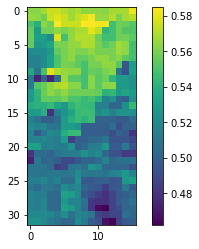

In [18]:
# convert bounds to 2D spatial array
spatial_array = mod_bounds.reshape((ngridpts[0], ngridpts[1], *mod_bounds.shape[1:])).copy()
for i in range(1, spatial_array.shape[0], 2):  # reverse every other x slice
    spatial_array[i, :, ...] = spatial_array[i, ::-1, ...]
plt.figure()
plt.imshow(spatial_array[:, :, 1])
plt.colorbar()

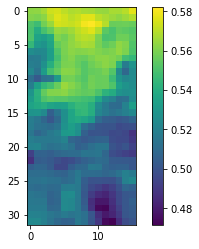

In [19]:
smoothed_spatial_bounds = np.empty(spatial_array.shape)
for i in range(5):
    smoothed_spatial_bounds[:, :, i] = convolve2d(spatial_array[:, :, i], kernel, boundary="symm", mode="same")
plt.figure()
plt.imshow(smoothed_spatial_bounds[:, :, 1])
plt.colorbar()

In [20]:
# convert bounds back to 1D snaking array
smoothed_bounds = []
for i in range(smoothed_spatial_bounds.shape[0]):
    if i % 2 == 0:
        smoothed_bounds.extend(smoothed_spatial_bounds[i, :, ...].tolist())
    else:
        smoothed_bounds.extend(smoothed_spatial_bounds[i, ::-1, ...].tolist())
smoothed_bounds = np.array(smoothed_bounds)
smoothed_bounds.shape

(512, 5)

In [21]:
colors5 = [0, 1, 2, 3, 4]  # ["r", "g", "b", "m ", "c"]

In [22]:
X = (col_centers_um[:, 0] / 1000).reshape(ngridpts)
Z = (col_centers_um[:, 1] / 1000).reshape(ngridpts)

In [23]:
import matplotlib as mpl

<IPython.core.display.Javascript object>


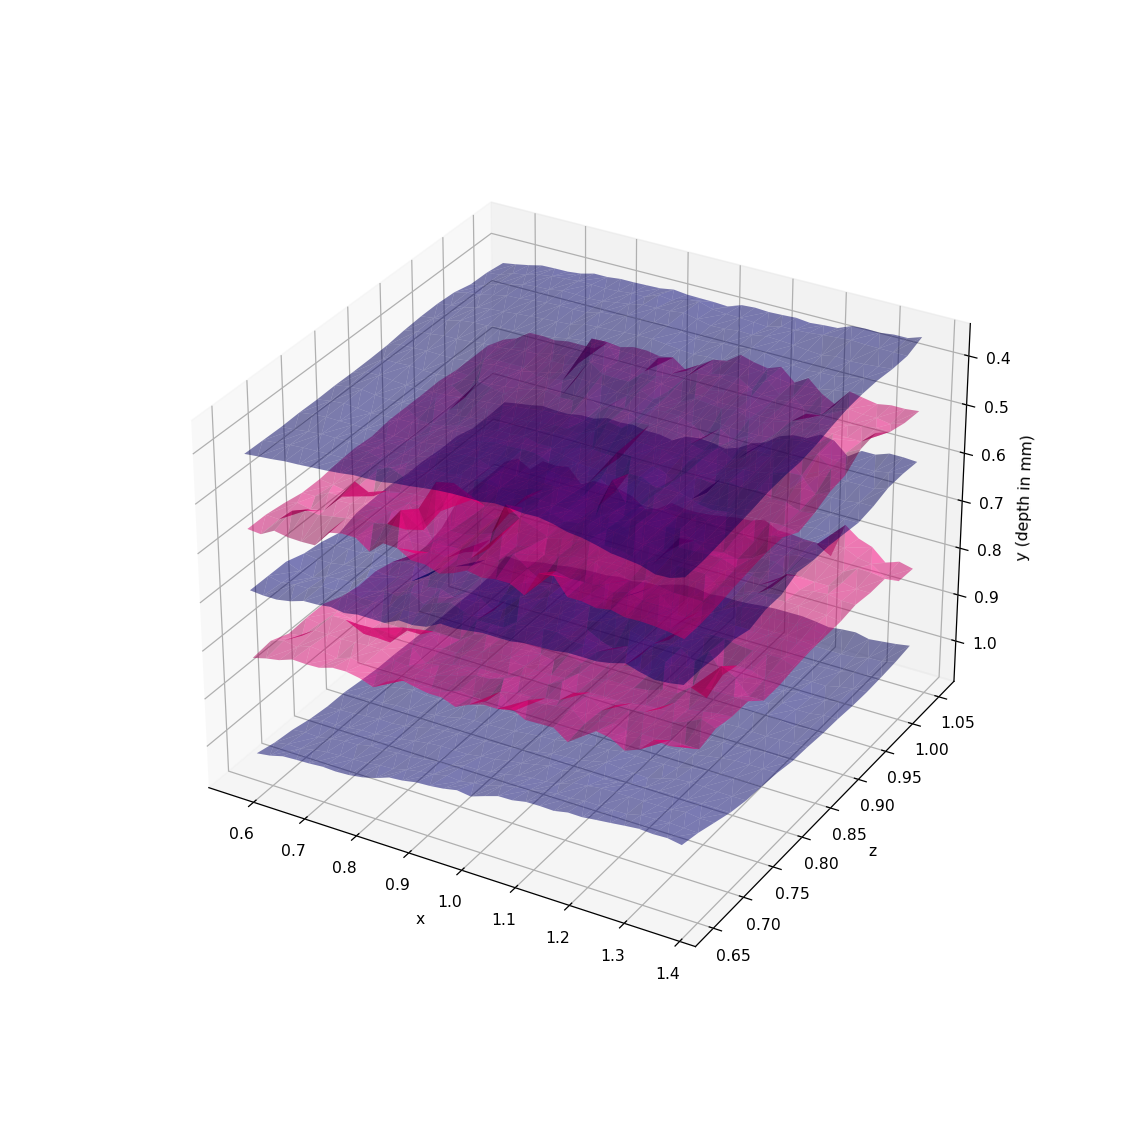

Text(0.5, 0, 'z')

In [24]:
%matplotlib notebook
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection="3d")
# ax.plot_surface(X, Z, minnie_bounds[:, 0].reshape(ngridpts))
tri = mpl.tri.Triangulation(col_centers_um[:, 0] / 1000, col_centers_um[:, 1] / 1000)
for j in range(5):
    ax.plot_trisurf(col_centers_um[:, 0] / 1000, col_centers_um[:, 1] / 1000, mod_bounds[:, j], color=(j % 2, 0, 0.5, 0.5))
for i in []:
     ax.scatter(col_centers_um[i][0] / 1000, col_centers_um[i][1] / 1000, mod_bounds[i, 1], c="c", s=50)
ax.invert_zaxis()
ax.set_zlabel("y (depth in mm)")
ax.set_xlabel("x")
ax.set_ylabel("z")

<IPython.core.display.Javascript object>


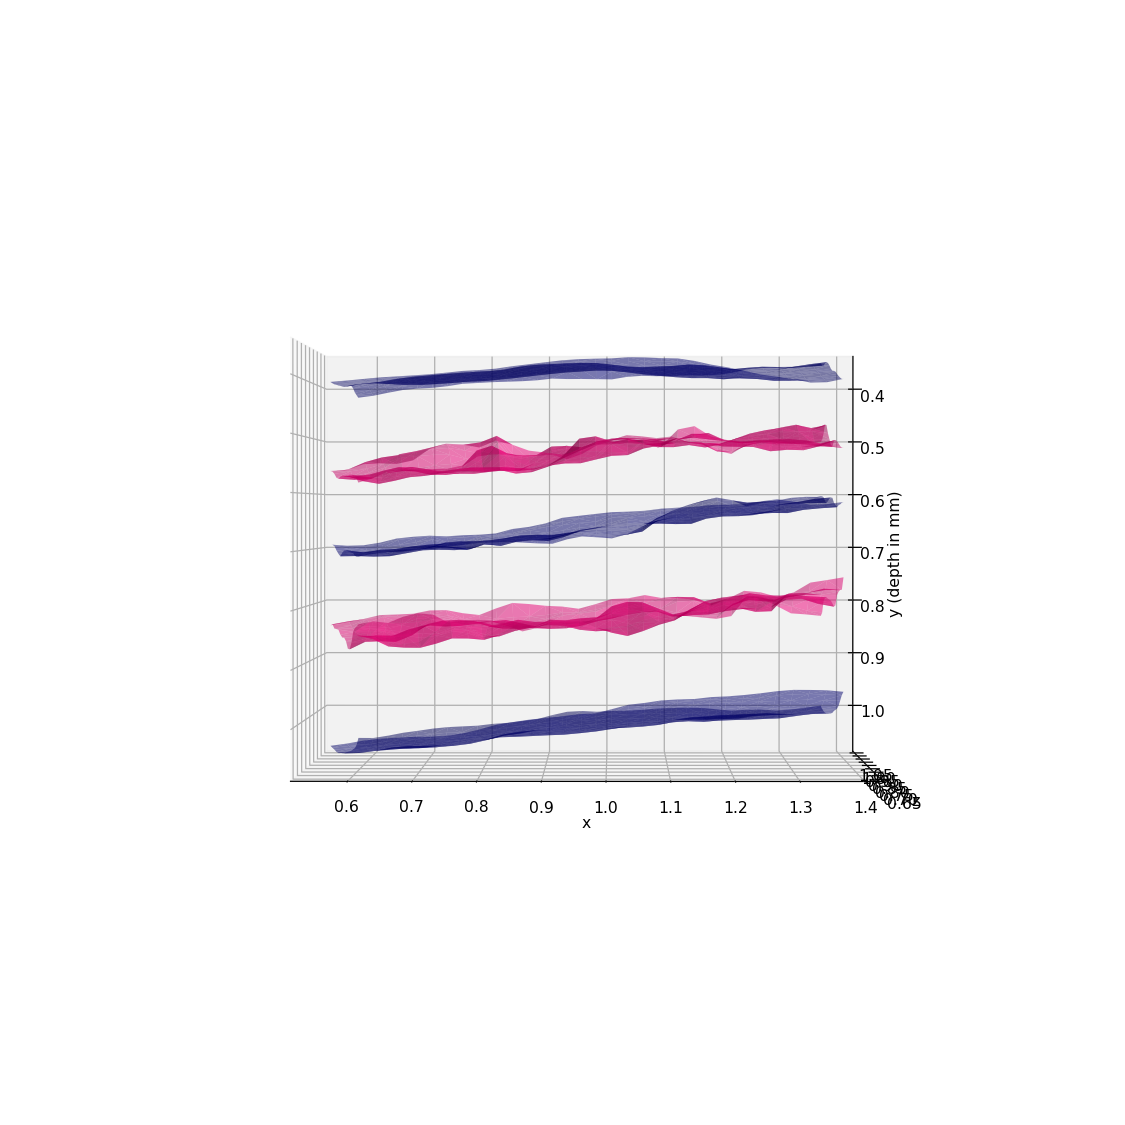

Text(0.5, 0, 'z')

In [65]:
%matplotlib notebook
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection="3d")
# ax.plot_surface(X, Z, minnie_bounds[:, 0].reshape(ngridpts))
tri = mpl.tri.Triangulation(col_centers_um[:, 0] / 1000, col_centers_um[:, 1] / 1000)
for j in range(5):
    ax.plot_trisurf(col_centers_um[:, 0] / 1000, col_centers_um[:, 1] / 1000, smoothed_bounds[:, j], color=(j % 2, 0, 0.5, 0.5))
for i in []:
     ax.scatter(col_centers_um[i][0] / 1000, col_centers_um[i][1] / 1000, smoothed_bounds[i, 1], c="c", s=50)
ax.invert_zaxis()
ax.set_zlabel("y (depth in mm)")
ax.set_xlabel("x")
ax.set_ylabel("z")

In [26]:
fig.savefig("smoothedBounds.svg")

In [27]:
np.save("smooth_bounds.npy", smoothed_bounds)

In [28]:
%matplotlib inline

In [116]:
for i in range(5):
    v1_verts = np.array([tri.x, minnie_bounds[:, i], tri.y], dtype=np.float32).T * 1_000_000
    v1_faces = tri.triangles.astype(np.uint32)
    from neuroglancer_scripts.mesh import save_mesh_as_precomputed
    import os
    import json
    if not os.path.isdir('layermeshes'):
        os.makedirs('layermeshes')
    with open(f'layermeshes/{i}','wb') as fp:
        save_mesh_as_precomputed(fp, v1_verts, v1_faces)
with open(f'layermeshes/0:0','w') as fp:  # this doesn't work because 0:0 is not a valid filename in windows
    d = {'fragments':[str(i)]}
    fp.write(json.dumps(d))
        

Vertex coordinates will be converted to float32
Vertex coordinates will be converted to float32
Vertex coordinates will be converted to float32
Vertex coordinates will be converted to float32
Vertex coordinates will be converted to float32


In [29]:
from scipy import interpolate

In [30]:
smoothed_spatial_bounds.shape

(32, 16, 5)

In [37]:
seg_size_um

array([ 900., 1094.,  500.])

In [32]:
xx, zz = np.linspace(0, 2050, 50), np.linspace(300, 1500, 25)
XX, ZZ = np.meshgrid(xx, zz)
interp_surfaces = []
layer_funcs = []
for i in range(5):
    layer_funcs.append(interpolate.interp2d(col_center_xs, col_center_zs, smoothed_spatial_bounds[:, :, i].T, kind="cubic"))
    interp_surfaces.append(layer_funcs[-1](xx, zz))

In [33]:
layer_funcs[-1](0, 0)

array([1.03026638])

<IPython.core.display.Javascript object>


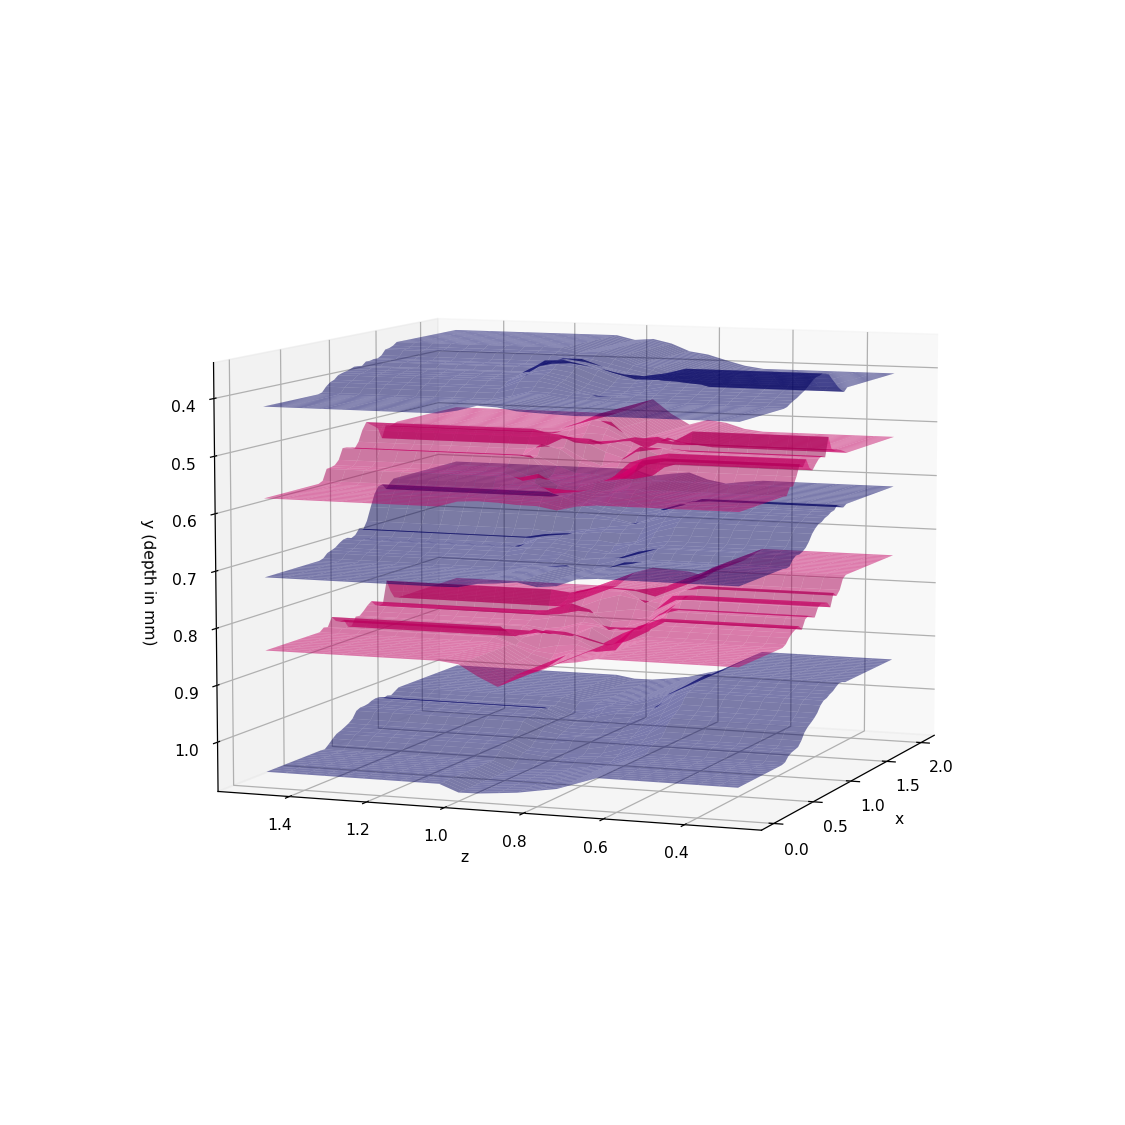

Text(0.5, 0, 'z')

In [34]:
%matplotlib notebook
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection="3d")
# ax.plot_surface(X, Z, minnie_bounds[:, 0].reshape(ngridpts))
for j in range(5):
    ax.plot_surface(XX / 1000, ZZ / 1000, interp_surfaces[j], color=(j % 2, 0, 0.5, 0.5))
ax.invert_zaxis()
ax.set_zlabel("y (depth in mm)")
ax.set_xlabel("x")
ax.set_ylabel("z")

## Make the layer boundary plot except where the distance between the layer bounds represents how many cells (of a particular type) are in that layer

In [37]:
# num_cells = dict()

In [33]:
query_type = "all"  # one of "all", "neuron", "exc", "inh", "BC", "BPC", "MC", "NGC", "5P_IT", "5P_PT", "5P_NP"

In [123]:
nuc_neuron = client.materialize.query_table("nucleus_neuron_svm")

In [124]:
nuc_neuron

id valid classification_system   cell_type    pt_supervoxel_id  \
0       348209     t             is_neuron  not-neuron   92423916840203243   
1       640071     t             is_neuron  not-neuron                   0   
2       462557     t             is_neuron  not-neuron  101417167182010351   
3       266849     t             is_neuron  not-neuron   88330641678196634   
4       219514     t             is_neuron  not-neuron   85994867133853165   
...        ...   ...                   ...         ...                 ...   
171810  307489     t             is_neuron  not-neuron   91151439497596272   
171811  589184     t             is_neuron  not-neuron  110987178548578816   
171812  190153     t             is_neuron      neuron   84663632759322436   
171813  256280     t             is_neuron      neuron   87546415009833381   
171814  258113     t             is_neuron      neuron   88181726572292650   

                pt_root_id              pt_position  
0       864691134945836023  [200928, 282512, 16717]  
1                        0   [371696, 98672, 19791]  
2       864691135294515893  [266304, 178832, 25200]  
3       864691135974582895  [171184, 194128, 20082]  
4       864691135644554735   [154480, 92528, 23737]  
...                    ...                      ...  
171810  864691135209791046  [191936, 238832, 25834]  
171811  864691135081676023  [335920, 177696, 22134]  
171812  864691135169731390  [144752, 135472, 18599]  
171813  864691136266562036  [165808, 118256, 20198]  
171814  864691135785513412  [170320, 132992, 20225]  

[171815 rows x 7 columns]

In [126]:
len(auto_cells), sum(nuc_neuron.cell_type == "neuron")

(69957, 89062)

In [129]:
num_cells[query_type] = []

if query_type == "all":
    query_type_cells = auto_cells
elif query_type == "neuron":
    query_type_cells = nuc_neuron[nuc_neuron.cell_type == "neuron"]
elif query_type  == "exc":
    query_type_cells = auto_cells.query("classification_system == 'aibs_coarse_excitatory'")
elif query_type  == "inh":
    query_type_cells = auto_cells.query("classification_system == 'aibs_coarse_inhibitory'")
elif query_type in ["BC", "BPC", "NGC", "MC", "5P_IT", "5P_PT", "5P_NP"]:
    query_type_cells = auto_cells.query(f"cell_type == '{query_type}'")
else:
    raise ValueError("invalid query_type. must be one of 'all', 'neuron', exc', 'inh', 'BC', 'BPC', 'MC', 'NGC', '5P_IT', '5P_PT', '5P_NP'")

j = 0
for col, bounds in list(zip(cols_nm, smoothed_bounds)):
    print(j)
    bounds = bounds * 1_000_000 / resolution[1]
    
    current_bboxs = []
    current_bboxs.append(col / resolution)
    current_bboxs[-1][0][1], current_bboxs[-1][1][1] = -2 ** 30, bounds[0]
    for i in range(len(bounds) - 1):
        current_bboxs.append(col / resolution)
        current_bboxs[-1][0][1], current_bboxs[-1][1][1] = bounds[i], bounds[i + 1]
    current_bboxs.append(col / resolution)
    current_bboxs[-1][0][1], current_bboxs[-1][1][1] = bounds[-1], 2 ** 30
    
    current_num_cells = []
    for current_bbox in current_bboxs:
        current_num_cells.append(sum(query_type_cells.pt_position.apply(in_bbox, args=[current_bbox])))
        print(f"num {query_type} cells:", current_num_cells[-1])
    j += 1
    print()
    
    num_cells[query_type].append(current_num_cells)    

0
num neuron cells: 46
num neuron cells: 356
num neuron cells: 356
num neuron cells: 255
num neuron cells: 455
num neuron cells: 74

1
num neuron cells: 40
num neuron cells: 355
num neuron cells: 358
num neuron cells: 262
num neuron cells: 474
num neuron cells: 73

2
num neuron cells: 42
num neuron cells: 358
num neuron cells: 368
num neuron cells: 272
num neuron cells: 461
num neuron cells: 64

3
num neuron cells: 45
num neuron cells: 381
num neuron cells: 369
num neuron cells: 273
num neuron cells: 463
num neuron cells: 61

4
num neuron cells: 45
num neuron cells: 370
num neuron cells: 385
num neuron cells: 258
num neuron cells: 469
num neuron cells: 61

5
num neuron cells: 46
num neuron cells: 353
num neuron cells: 392
num neuron cells: 269
num neuron cells: 441
num neuron cells: 66

6
num neuron cells: 40
num neuron cells: 337
num neuron cells: 371
num neuron cells: 273
num neuron cells: 429
num neuron cells: 66

7
num neuron cells: 34
num neuron cells: 334
num neuron cells: 348
nu

num neuron cells: 423
num neuron cells: 226
num neuron cells: 471
num neuron cells: 68

62
num neuron cells: 74
num neuron cells: 311
num neuron cells: 418
num neuron cells: 241
num neuron cells: 456
num neuron cells: 69

63
num neuron cells: 77
num neuron cells: 337
num neuron cells: 396
num neuron cells: 237
num neuron cells: 444
num neuron cells: 72

64
num neuron cells: 73
num neuron cells: 345
num neuron cells: 381
num neuron cells: 249
num neuron cells: 438
num neuron cells: 75

65
num neuron cells: 73
num neuron cells: 305
num neuron cells: 418
num neuron cells: 265
num neuron cells: 437
num neuron cells: 73

66
num neuron cells: 63
num neuron cells: 293
num neuron cells: 442
num neuron cells: 250
num neuron cells: 457
num neuron cells: 70

67
num neuron cells: 58
num neuron cells: 299
num neuron cells: 454
num neuron cells: 235
num neuron cells: 464
num neuron cells: 66

68
num neuron cells: 52
num neuron cells: 351
num neuron cells: 397
num neuron cells: 279
num neuron cells: 

num neuron cells: 372
num neuron cells: 276
num neuron cells: 417
num neuron cells: 75

123
num neuron cells: 73
num neuron cells: 321
num neuron cells: 393
num neuron cells: 266
num neuron cells: 444
num neuron cells: 77

124
num neuron cells: 65
num neuron cells: 289
num neuron cells: 440
num neuron cells: 240
num neuron cells: 468
num neuron cells: 77

125
num neuron cells: 55
num neuron cells: 253
num neuron cells: 437
num neuron cells: 255
num neuron cells: 451
num neuron cells: 76

126
num neuron cells: 49
num neuron cells: 251
num neuron cells: 439
num neuron cells: 263
num neuron cells: 427
num neuron cells: 75

127
num neuron cells: 42
num neuron cells: 268
num neuron cells: 442
num neuron cells: 246
num neuron cells: 425
num neuron cells: 72

128
num neuron cells: 36
num neuron cells: 274
num neuron cells: 421
num neuron cells: 237
num neuron cells: 422
num neuron cells: 75

129
num neuron cells: 39
num neuron cells: 262
num neuron cells: 432
num neuron cells: 250
num neuron 

num neuron cells: 377
num neuron cells: 341
num neuron cells: 232
num neuron cells: 415
num neuron cells: 69

184
num neuron cells: 57
num neuron cells: 365
num neuron cells: 331
num neuron cells: 240
num neuron cells: 393
num neuron cells: 79

185
num neuron cells: 66
num neuron cells: 377
num neuron cells: 339
num neuron cells: 267
num neuron cells: 384
num neuron cells: 77

186
num neuron cells: 67
num neuron cells: 374
num neuron cells: 325
num neuron cells: 296
num neuron cells: 381
num neuron cells: 75

187
num neuron cells: 62
num neuron cells: 388
num neuron cells: 335
num neuron cells: 321
num neuron cells: 385
num neuron cells: 78

188
num neuron cells: 57
num neuron cells: 392
num neuron cells: 347
num neuron cells: 323
num neuron cells: 386
num neuron cells: 74

189
num neuron cells: 38
num neuron cells: 382
num neuron cells: 345
num neuron cells: 308
num neuron cells: 393
num neuron cells: 66

190
num neuron cells: 31
num neuron cells: 364
num neuron cells: 368
num neuron 

num neuron cells: 34
num neuron cells: 340
num neuron cells: 387
num neuron cells: 289
num neuron cells: 374
num neuron cells: 67

245
num neuron cells: 29
num neuron cells: 346
num neuron cells: 373
num neuron cells: 294
num neuron cells: 396
num neuron cells: 61

246
num neuron cells: 28
num neuron cells: 374
num neuron cells: 319
num neuron cells: 280
num neuron cells: 396
num neuron cells: 58

247
num neuron cells: 22
num neuron cells: 377
num neuron cells: 302
num neuron cells: 284
num neuron cells: 371
num neuron cells: 65

248
num neuron cells: 29
num neuron cells: 350
num neuron cells: 300
num neuron cells: 295
num neuron cells: 342
num neuron cells: 70

249
num neuron cells: 33
num neuron cells: 324
num neuron cells: 332
num neuron cells: 304
num neuron cells: 363
num neuron cells: 77

250
num neuron cells: 38
num neuron cells: 296
num neuron cells: 382
num neuron cells: 309
num neuron cells: 371
num neuron cells: 78

251
num neuron cells: 39
num neuron cells: 284
num neuron c

num neuron cells: 45

305
num neuron cells: 42
num neuron cells: 227
num neuron cells: 384
num neuron cells: 231
num neuron cells: 335
num neuron cells: 64

306
num neuron cells: 44
num neuron cells: 239
num neuron cells: 401
num neuron cells: 213
num neuron cells: 368
num neuron cells: 75

307
num neuron cells: 52
num neuron cells: 246
num neuron cells: 402
num neuron cells: 219
num neuron cells: 404
num neuron cells: 76

308
num neuron cells: 61
num neuron cells: 274
num neuron cells: 401
num neuron cells: 228
num neuron cells: 419
num neuron cells: 73

309
num neuron cells: 70
num neuron cells: 258
num neuron cells: 394
num neuron cells: 233
num neuron cells: 412
num neuron cells: 61

310
num neuron cells: 62
num neuron cells: 249
num neuron cells: 397
num neuron cells: 238
num neuron cells: 398
num neuron cells: 60

311
num neuron cells: 54
num neuron cells: 243
num neuron cells: 390
num neuron cells: 267
num neuron cells: 360
num neuron cells: 62

312
num neuron cells: 51
num neur

num neuron cells: 364
num neuron cells: 69

366
num neuron cells: 71
num neuron cells: 247
num neuron cells: 287
num neuron cells: 315
num neuron cells: 344
num neuron cells: 60

367
num neuron cells: 61
num neuron cells: 243
num neuron cells: 282
num neuron cells: 315
num neuron cells: 296
num neuron cells: 40

368
num neuron cells: 61
num neuron cells: 264
num neuron cells: 239
num neuron cells: 330
num neuron cells: 281
num neuron cells: 39

369
num neuron cells: 66
num neuron cells: 267
num neuron cells: 242
num neuron cells: 344
num neuron cells: 338
num neuron cells: 50

370
num neuron cells: 67
num neuron cells: 274
num neuron cells: 255
num neuron cells: 337
num neuron cells: 364
num neuron cells: 61

371
num neuron cells: 57
num neuron cells: 273
num neuron cells: 289
num neuron cells: 314
num neuron cells: 375
num neuron cells: 64

372
num neuron cells: 54
num neuron cells: 274
num neuron cells: 317
num neuron cells: 289
num neuron cells: 416
num neuron cells: 61

373
num neu

num neuron cells: 223
num neuron cells: 434
num neuron cells: 67

427
num neuron cells: 64
num neuron cells: 203
num neuron cells: 305
num neuron cells: 237
num neuron cells: 441
num neuron cells: 67

428
num neuron cells: 61
num neuron cells: 217
num neuron cells: 267
num neuron cells: 260
num neuron cells: 422
num neuron cells: 63

429
num neuron cells: 41
num neuron cells: 245
num neuron cells: 246
num neuron cells: 260
num neuron cells: 418
num neuron cells: 63

430
num neuron cells: 38
num neuron cells: 270
num neuron cells: 230
num neuron cells: 254
num neuron cells: 417
num neuron cells: 55

431
num neuron cells: 37
num neuron cells: 277
num neuron cells: 227
num neuron cells: 240
num neuron cells: 334
num neuron cells: 44

432
num neuron cells: 40
num neuron cells: 278
num neuron cells: 233
num neuron cells: 228
num neuron cells: 340
num neuron cells: 45

433
num neuron cells: 39
num neuron cells: 277
num neuron cells: 240
num neuron cells: 237
num neuron cells: 418
num neuron 

num neuron cells: 211
num neuron cells: 241
num neuron cells: 381
num neuron cells: 80

488
num neuron cells: 44
num neuron cells: 276
num neuron cells: 221
num neuron cells: 237
num neuron cells: 404
num neuron cells: 71

489
num neuron cells: 53
num neuron cells: 246
num neuron cells: 246
num neuron cells: 248
num neuron cells: 426
num neuron cells: 57

490
num neuron cells: 47
num neuron cells: 229
num neuron cells: 284
num neuron cells: 258
num neuron cells: 441
num neuron cells: 54

491
num neuron cells: 46
num neuron cells: 233
num neuron cells: 287
num neuron cells: 243
num neuron cells: 422
num neuron cells: 63

492
num neuron cells: 39
num neuron cells: 226
num neuron cells: 277
num neuron cells: 253
num neuron cells: 416
num neuron cells: 58

493
num neuron cells: 36
num neuron cells: 233
num neuron cells: 254
num neuron cells: 260
num neuron cells: 369
num neuron cells: 63

494
num neuron cells: 42
num neuron cells: 262
num neuron cells: 224
num neuron cells: 295
num neuron 

In [130]:
cumul_num_cells = dict()
for t in num_cells:
    counts = np.array(num_cells[t])
    cumul = np.empty(counts.shape)
    cumul[:, 0] = counts[:, 0]
    for i in range(1, 6):
        cumul[:, i]  = cumul[:, i-1] + counts[:, i]
    cumul_num_cells[t] = cumul

<IPython.core.display.Javascript object>


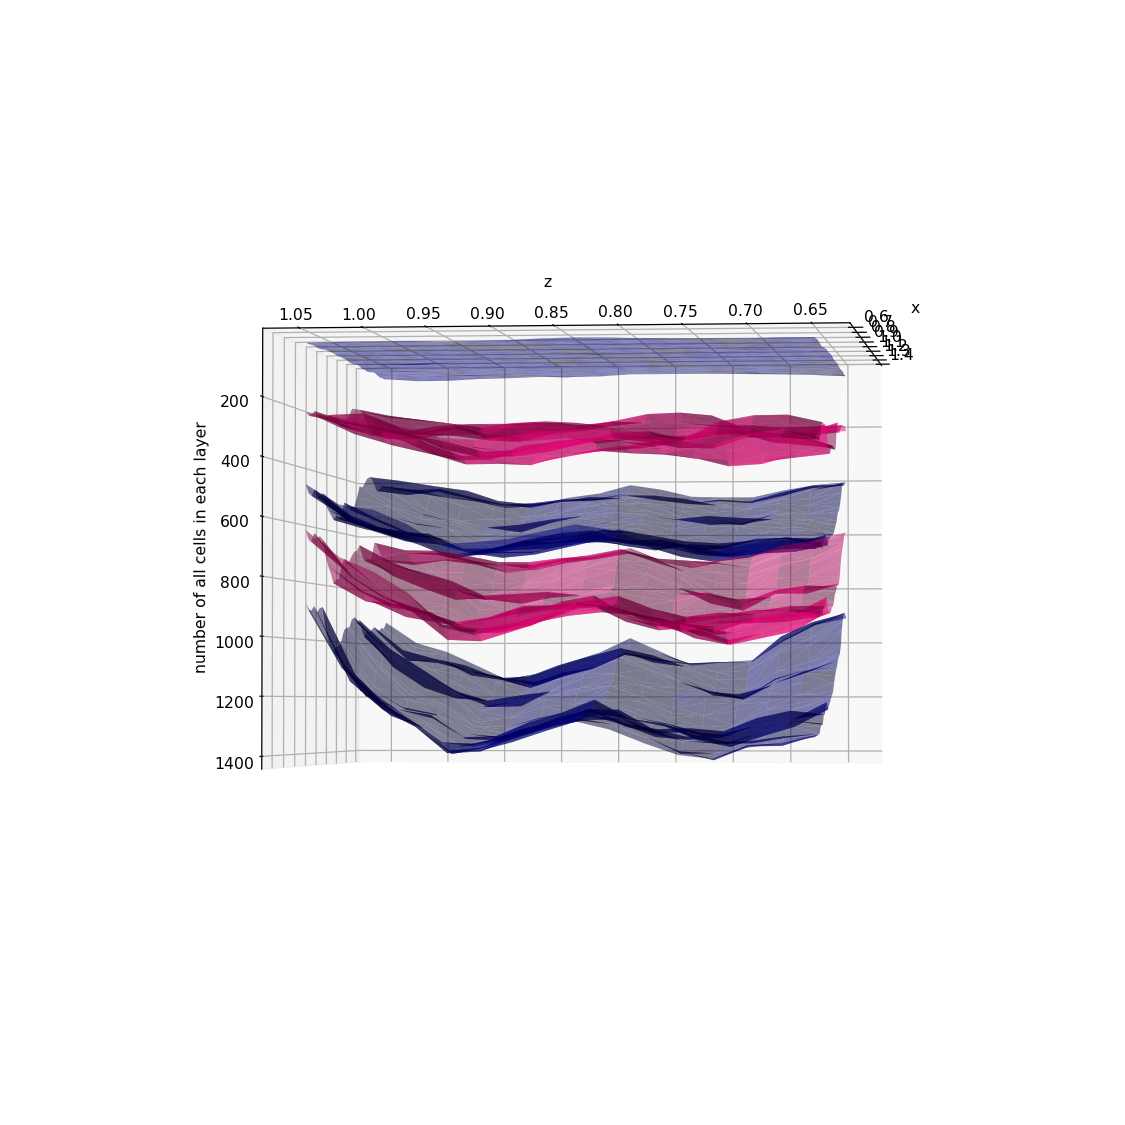

Text(0.5, 0, 'z')

In [34]:
%matplotlib notebook
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection="3d")
# ax.plot_surface(X, Z, minnie_bounds[:, 0].reshape(ngridpts))
# tri = mpl.tri.Triangulation(col_centers_um[:, 0] / 1000, col_centers_um[:, 1] / 1000)
for j in range(5):
    ax.plot_trisurf(np.array(col_centers_um)[:, 0] / 1000, np.array(col_centers_um)[:, 1] / 1000, np.array(cumul_num_cells[query_type])[:, j], color=(j % 2, 0, 0.5, 0.5))
ax.invert_zaxis()
ax.set_zlabel(f"number of {query_type} cells in each layer")
ax.set_xlabel("x")
ax.set_ylabel("z")

In [78]:
fig.savefig(f"laminarPopulationCount_{query_type}.svg")

<IPython.core.display.Javascript object>


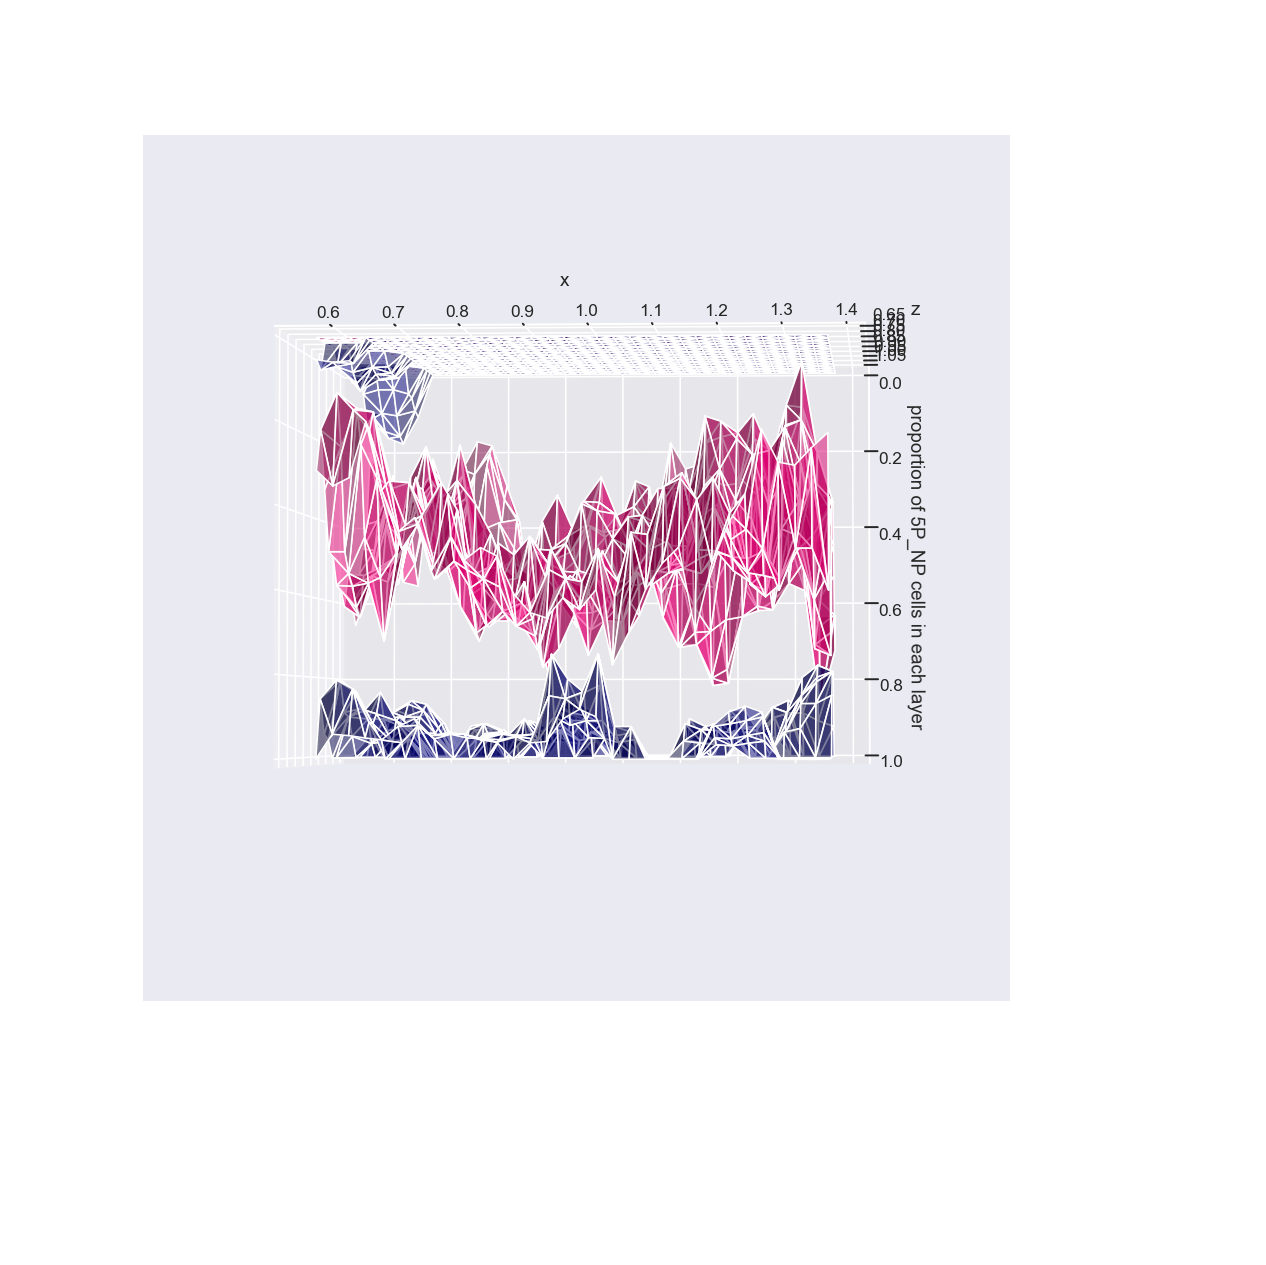

Text(0.5, 0, 'z')

In [79]:
%matplotlib notebook
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection="3d")
# ax.plot_surface(X, Z, minnie_bounds[:, 0].reshape(ngridpts))
tri = mpl.tri.Triangulation(col_centers_um[:, 0] / 1000, col_centers_um[:, 1] / 1000)
for j in range(5):
    ax.plot_trisurf(col_centers_um[:, 0] / 1000, col_centers_um[:, 1] / 1000, cumul_num_cells[query_type][:, j] / cumul_num_cells[query_type][:, -1], color=(j % 2, 0, 0.5, 0.5))
ax.invert_zaxis()
ax.set_zlabel(f"proportion of {query_type} cells in each layer")
ax.set_xlabel("x")
ax.set_ylabel("z")

In [80]:
fig.savefig(f"laminarPopulationProportions_{query_type}.svg")

In [26]:
with open("num_cells.json") as f:
    num_cells_str = f.read()
    num_cells = json.loads(num_cells_str)
    
with open("cumul_num_cells.json") as f:
    cumul_num_cells_str = f.read()
    cumul_num_cells = json.loads(cumul_num_cells_str)

In [131]:
num_cells.keys(), cumul_num_cells.keys()

(dict_keys(['inh', '5P_IT', '5P_PT', '5P_NP', 'exc', 'BC', 'MC', 'BPC', 'NGC', 'all', 'neuron']),
 dict_keys(['inh', '5P_IT', '5P_PT', '5P_NP', 'exc', 'BC', 'MC', 'BPC', 'NGC', 'all', 'neuron']))

In [120]:
# cumul_num_cells = to_list_dict(cumul_num_cells)
# with open("num_cells.json", "w") as f:
#     f.write(json.dumps(num_cells))
# with open("cumul_num_cells.json", "w") as f:
#     f.write(json.dumps(cumul_num_cells))

In [165]:
# plot soma volume versus x
soma_z = [query_type_cells.iloc[i].pt_position[2] * 4 / 1_000_000 for i in range(len(query_type_cells))]
# note that the items in soma_features may also be biased
soma_vol = [(soma_features.loc[r]["soma_volume"] if r in soma_features_root_ids and type(soma_features.loc[r]["soma_volume"]) is not pd.Series else np.nan)
                           for r in query_type_cells.pt_root_id]

In [147]:
len(soma_z)

89062

In [169]:
idxs = ~np.isnan(soma_vol)
soma_z = np.array(soma_z)
soma_vol = np.array(soma_vol)
soma_vol = soma_vol[idxs]
soma_z = soma_z[idxs]
idxs = np.argsort(soma_z)
soma_vol = soma_vol[idxs]
soma_z = soma_z[idxs]

In [170]:
mean_vols = []

bin_edges = np.linspace(soma_z[0], soma_z[-1], 100)
bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2
prev_idx = 0
for i in range(len(bin_edges) - 1):
    mean = 0
    idx = prev_idx
    while soma_z[idx] < bin_edges[i + 1]:
        idx += 1
        mean += soma_vol[idx]
    mean /= idx - prev_idx
    mean_vols.append(mean)
    prev_idx = idx

<IPython.core.display.Javascript object>


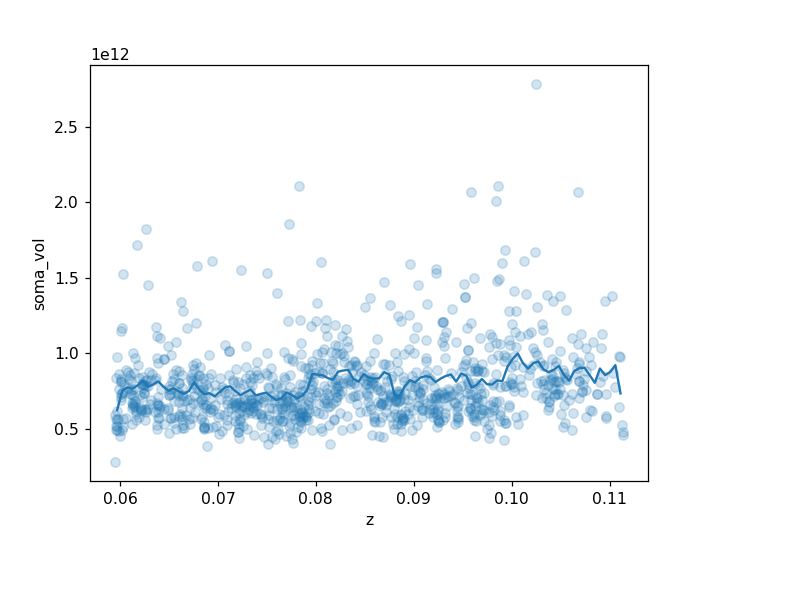

Text(0, 0.5, 'soma_vol')

In [173]:
plt.figure()
idxs = np.random.randint(0, len(soma_z), 1000)
plt.scatter(soma_z[idxs], soma_vol[idxs], alpha=0.2)
plt.plot(bin_centers, mean_vols)
plt.xlabel("z")
plt.ylabel("soma_vol")

# Test sensitivity to initial conditions

#### Results of testing sensitivity to initial conditions for the column offset +x from minnie col with x coordinate 243111 nm

When initialized using L3-L4 border = 0.54 (depth of L3-L4 border in minnie col), the result was 0.54, with a final log likelihood score of -328
    - This is even the case when use_depth = False, for which the final score was -350 (keep in mind this has one less covariate, which should increas the score)
    - 0.54, use_depth=False, features=tuple(), use_soma_vol_std=False resulted in 0.5, score was -60
    - 0.54, use_depth=False, features=("soma_volume",), use_soma_vol_std=False resulted in 0.5, score was -104


When initialized using L3-L4 border = 0.5, the result was 0.5, with a final log likelihood score of -305 (better)

## Synapses in the center of the column
#### (synapses aren't used, so you can skip these 3 cells)

In [54]:
syn_bbox = bbox.copy()
sample_width = 10_000  # nm square cross section
x_vx_width = sample_width / resolution[0]
z_vx_width = sample_width / resolution[2]
syn_bbox[0, 0] = bbox[0, 0] + (bbox[1, 0] - bbox[0, 0]) / 2
syn_bbox[1, 0] = syn_bbox[0, 0] + x_vx_width
syn_bbox[0, 2] = bbox[0, 2] + (bbox[1, 2] - bbox[0, 2]) / 2
syn_bbox[1, 2] = syn_bbox[0, 2] + z_vx_width
syn_bbox, bbox

(array([[205611.,  50000.,  21383.],
        [208111., 323500.,  21633.]]),
 array([[193111.,  50000.,  20133.],
        [218111., 323500.,  22633.]]))

In [ ]:
synapses = client.materialize.synapse_query(bounding_box=syn_bbox, bounding_box_column="ctr_pt_position", split_positions=True)

In [ ]:
synapses["pre_type"] = [(cells_by_root.loc[root].cell_type if root in valid_ids else "N/A") for root in synapses.pre_pt_root_id]
synapses["post_type"] = [(cells_by_root.loc[root].cell_type if root in valid_ids else "N/A") for root in synapses.post_pt_root_id]
syn_depths = synapses.ctr_pt_position_y.values * y_resolution / 1_000_000
syn_depths_by_pre = dict((t, []) for t in cell_types)
syn_depths_by_post = dict((t, []) for t in cell_types)
for i in synapses.index:
    # pre
    syn = synapses.loc[i]
    if syn.pre_type in ctype_to_layer.keys():
        syn_depths_by_pre["exc"].append(syn.ctr_pt_position_y * y_resolution / 1_000_000)
    elif syn.pre_type in syn_depths_by_pre.keys():
        syn_depths_by_pre[syn.pre_type].append(syn.ctr_pt_position_y * y_resolution / 1_000_000)
    
    # post
    if syn.post_type in ctype_to_layer.keys():
        syn_depths_by_post["exc"].append(syn.ctr_pt_position_y * y_resolution / 1_000_000)
    elif syn.post_type in syn_depths_by_post.keys():
        syn_depths_by_post[syn.post_type].append(syn.ctr_pt_position_y * y_resolution / 1_000_000)
for t in syn_depths_by_pre:
    syn_depths_by_pre[t] = np.array(syn_depths_by_pre[t])
for t in syn_depths_by_post:
    syn_depths_by_post[t] = np.array(syn_depths_by_post[t])

synapses

## Get features by depth

In [39]:
# cross sectional area to be layered
xarea = resolution[0] * resolution[2] * (bbox[1][0] - bbox[0][0]) * (bbox[1][2] - bbox[0][2]) / 1_000_000 ** 2

In [40]:
# min is pia border (with L1) and max is white matter border (with L6)
min_y = min(pt[1] * y_resolution / 1_000_000 for pt in auto_col_cells.pt_position)
max_y = max(pt[1] * y_resolution / 1_000_000 for pt in auto_col_cells.pt_position)
min_y, max_y

(0.358016, 1.086656)

### Sort the dataframe of cells by depth to make getting features by depth way faster

In [41]:
auto_col_cells = auto_col_cells.sort_values(axis="index", by="pt_position", key=lambda xs: pd.Series([x[1] for x in xs]))

def get_cutoff_idx(df, y, prev_cutoff_idx, position_col="pt_position"):
    """efficiently find the first index after prev_cutoff_idx where position[1] is greater than y"""
    i = prev_cutoff_idx
    if i >= len(df):
        return i
    while df.iloc[i][position_col][1] * y_resolution / 1_000_000 < y:
        i += 1
        if i >= len(df):
            return i
    return i  # new_cutoff_idx

In [42]:
exc_soma_densities = []
inh_soma_densities = []
synapse_densities = []
# syn_densities_by_pre = dict((t, []) for t in syn_depths_by_pre.keys())
# syn_densities_by_post = dict((t, []) for t in syn_depths_by_post.keys())
p_type = dict((t, []) for t in ["23", "4", "5", "6"])
p_inh_subclass = dict((t, []) for t in ["BC", "BPC", "MC", "NGC"])
exc_soma_features_by_depth = dict((f, []) for f in features)
inh_soma_features_by_depth = dict((f, []) for f in features)
soma_features_by_depth = dict((f, []) for f in features)
exc_soma_vol_std_by_depth = []
exc_soma_depths = []
bin_centers = []

depths = np.arange(min_y, max_y, step_size)
bin_centers = depths + step_size // 2
prev_cutoff_idx = 0
for curr_y in depths:
    # first index where pt_position[1] is greater than curr_y + bin_width 
    cutoff_idx = get_cutoff_idx(auto_col_cells, curr_y + bin_width, prev_cutoff_idx)
    lower_cutoff_idx = get_cutoff_idx(auto_col_cells, curr_y, prev_cutoff_idx)
    
    current_cells = auto_col_cells.iloc[lower_cutoff_idx:cutoff_idx]
    current_exc_cells = current_cells.query("classification_system == 'aibs_coarse_excitatory'")
    current_inh_cells = current_cells.query("classification_system == 'aibs_coarse_inhibitory'")
    
    for f in features:
        soma_features_by_depth[f].append(current_cells[f].mean())
        exc_soma_features_by_depth[f].append(current_exc_cells[f].mean())
        inh_soma_features_by_depth[f].append(current_inh_cells[f].mean())
    exc_soma_vol_std_by_depth.append(current_exc_cells["soma_volume"].std())
    mean_pos = current_exc_cells["pt_position"].mean()
    exc_soma_depths.append((mean_pos[1] if mean_pos is not np.nan else np.nan))
                          
    for t in p_type:
        p_type[t].append(0)
    for i in current_exc_cells.index:
        if current_exc_cells.loc[i].cell_type != "Unsure":
            p_type[ctype_to_layer[current_exc_cells.loc[i].cell_type]][-1] += 1 / len(current_exc_cells) if len(current_exc_cells) > 0 else np.nan
    exc_soma_densities.append(len(current_exc_cells))
    
    inh_soma_densities.append(len(current_inh_cells))
    for t in p_inh_subclass:
        p_inh_subclass[t].append(0)
    for i in current_inh_cells.index:
        if current_inh_cells.loc[i].cell_type != "Unsure":
            p_inh_subclass[current_inh_cells.loc[i].cell_type][-1] += 1 / len(current_inh_cells) if len(current_inh_cells) > 0 else np.nan
            
    # # this is still slow
    # synapse_densities.append(sum((curr_y <= syn_depths) & (syn_depths < curr_y + bin_width)))
    # for t in syn_densities_by_pre.keys():
    #     syn_densities_by_pre[t].append(sum((curr_y <= syn_depths_by_pre[t]) & (syn_depths_by_pre[t] < curr_y + bin_width)))
    # for t in syn_densities_by_post.keys():
    #     syn_densities_by_post[t].append(sum((curr_y <= syn_depths_by_post[t]) & (syn_depths_by_post[t] < curr_y + bin_width)))
    
    prev_cutoff_idx = lower_cutoff_idx
exc_soma_densities = np.array(exc_soma_densities, dtype=float) / (bin_width * xarea)  # per mm^3
inh_soma_densities = np.array(inh_soma_densities, dtype=float) / (bin_width * xarea)
# synapse_densities = np.array(synapse_densities, dtype=float) / (bin_width * xarea)
for t in p_type:
    p_type[t] = np.array(p_type[t])
for t in p_inh_subclass:
    p_inh_subclass[t] = np.array(p_inh_subclass[t])
# for t in syn_densities_by_pre:
#     syn_densities_by_pre[t] = np.array(syn_densities_by_pre[t]) / (bin_width * xarea)
# for t in syn_depths_by_post:
#     syn_densities_by_post[t] = np.array(syn_densities_by_post[t]) / (bin_width * xarea)

In [43]:
def clean_nans(x, normalize=False):
    """linearly interpolates to fill in nans
    normalizing subtracts mean and divides by std
    """
    cleaned = np.array(x)
    mask = np.isfinite(cleaned)
    cleaned = np.interp(np.arange(len(cleaned)), np.arange(len(cleaned))[mask], cleaned[mask])
    if normalize:
        cleaned -= cleaned.mean()
        cleaned /= cleaned.std()
    return cleaned

In [44]:
exc_features_df = pd.DataFrame(exc_soma_features_by_depth)
exc_features_df["soma_density"] = exc_soma_densities
exc_features_df["soma_vol_std"] = exc_soma_vol_std_by_depth
for col in exc_features_df.columns:
    exc_features_df[col] = clean_nans(exc_features_df[col], normalize=True)
exc_features_df

soma_volume  n_soma_syn  nucleus_volume  nucleus_fract_fold  \
0      -0.361149    1.056956       -0.482037           -1.307653   
1       0.072851    1.352864        0.024528           -1.119267   
2      -0.496472    1.149017       -0.671847           -0.777104   
3      -0.561166    1.066820       -0.658463           -0.773483   
4      -0.508450    1.066203       -0.562224           -0.787083   
..           ...         ...             ...                 ...   
141     0.513799   -1.936269        0.798473            0.064612   
142     0.892940   -2.020489        0.647528           -1.164225   
143     0.892940   -2.020489        0.647528           -1.164225   
144     0.892940   -2.020489        0.647528           -1.164225   
145     0.892940   -2.020489        0.647528           -1.164225   

     sum_proc_sdf  nucleus_to_soma  soma_density  soma_vol_std  
0        0.073811        -0.010727     -2.459284     -0.510483  
1        0.488860        -0.483754     -2.333443     -0.372161  
2       -0.160848         0.201132     -2.239062     -0.200191  
3       -0.160015         0.407955     -2.144682     -0.353769  
4        0.121552         0.415325     -2.018841     -0.239253  
..            ...              ...           ...           ...  
141     -0.453667        -0.511446     -2.050301     -0.416314  
142     -0.009569        -1.856223     -2.333443     -0.119303  
143     -0.009569        -1.856223     -2.490744     -0.119303  
144     -0.009569        -1.856223     -2.490744     -0.119303  
145     -0.009569        -1.856223     -2.490744     -0.119303  

[146 rows x 8 columns]

### PCA on the features to remove correlations

(<matplotlib.image.AxesImage at 0x13d72405a20>,
 <matplotlib.colorbar.Colorbar at 0x13d7243f390>)

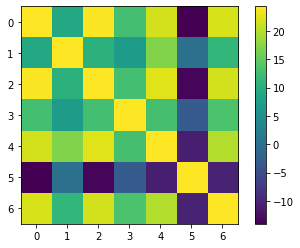

In [72]:
X = exc_features_df.values.T
Xc = X - np.mean(X, axis=1, keepdims=True)  # mean subtract data first
cov = Xc @ Xc.T / (X.shape[0] - 1)  # covariance
plt.imshow(cov), plt.colorbar()

In [73]:
variance, V = np.linalg.eig(cov)
idxs = np.argsort(-variance)
V = V[:, idxs]
variance = variance[idxs]
explained_variance = [sum(variance[:i+1]) / sum(variance) for i in range(len(variance))]

Text(0, 0.5, 'explained variance')

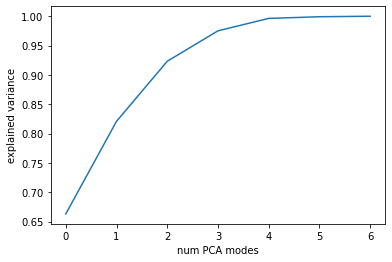

In [74]:
plt.plot(explained_variance)
plt.xlabel("num PCA modes")
plt.ylabel("explained variance")

In [75]:
# Yc is the projection of Xc onto the principal components 
Yc = V[:, :7].T @ Xc
Yc.shape

(7, 146)

### get inhibitory cell types for column to verify our boundaries
#### also excitatory subclasses

In [58]:
# cell_subtypes = pd.read_excel("CellTypesMinnieColumn.xlsx", sheet_name="csv", usecols=["Unnamed: 0", "Type-Nuno"])
# cell_subtypes.rename({"Unnamed: 0": "pt_position", "Type-Nuno": "subtype"}, axis=1, inplace=True)
# # convert the string position into a list of ints
# cell_subtypes["pt_position"] = [list(map(int, cell_subtypes["pt_position"].iloc[i][1:-1].split(", "))) for i in range(len(cell_subtypes))]
# cell_subtypes["mm_depth"] = [cell_subtypes["pt_position"].iloc[i][1] * 4 / 1_000_000 for i in range(len(cell_subtypes))]

In [59]:
auto_col_cells["mm_depth"] = [auto_col_cells.pt_position.iloc[i][1] * 4 / 1_000_000 for i in range(len(auto_col_cells))]

In [60]:
# possible_subtypes = ['Type-L03-3P-XXX', 'Type01-L03-3P-PRV', 'Type02-L03-3P-PRV',
#        'Type02-L04-3P-PRV', 'Type04-L04-3P-PRV', 'Type05-L04-4P-PRV',
#        'Type06-B45-4P-PRV', 'Type06-L05-4P-PRV', 'Type07-L04-4P-PRV',
#        'Type08-B45-3P-PRV', 'Type09-L05-4P-PRV', 'Type11-L05-3P-PRV',
#        'Type10-L05-PT-PRV', 'Type23-L05-PT-PRV', 'Type12-L05-PT-PRV',
#        'Type13-L05-IT-PRV', 'Type14-L05-NP-PRV', 'Type15-L06-6P-PRV',
#        'Type16-L06-XX-CCK', 'Type17-L03-3P-VIP', 'Type22-L03-3P-VIP',
#        'Type19-B45-4P-VIP', 'Type20-L05-XX-VIP', 'Type21-L06-6P-VIP',
#        'Type18-L03-3P-VIP', 'Type3-L03-3P-PRV', 'Type4-L04-3P-PRV',
#        'Type4-L06-6P-PRV']
possible_exc_subclasses = ["23P", "4P", "5P_IT", "5P_NP", "5P_PT", "6CT", "6IT"]
# len(possible_subtypes)

## Plot!

In [61]:
# colors = ["tab:" + s for s in ["blue", "orange", "green", "red", "purple", "brown", "pink", "gray", "olive", "cyan"]]
colors = get_cmap("tab20").colors[::2] + get_cmap("tab20b").colors[::2]
len(colors)

20

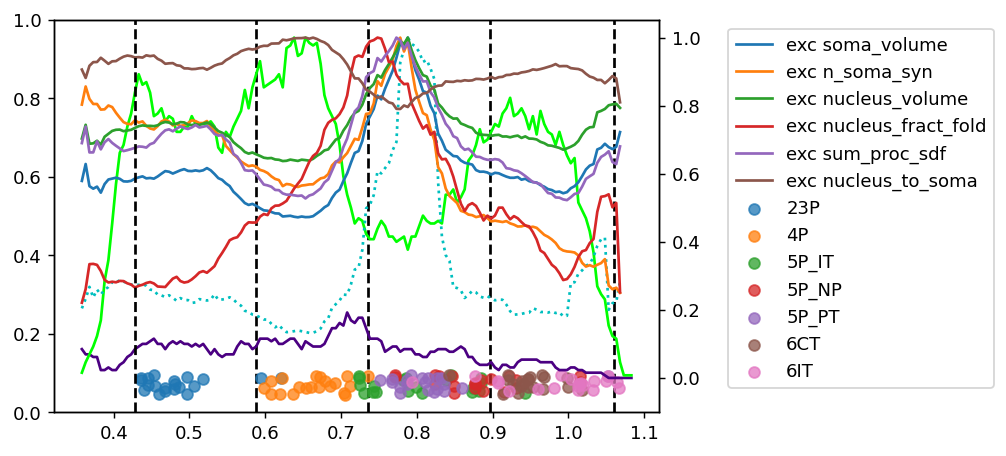

In [108]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=130)
ax2 = ax.twinx()
ax2.plot(bin_centers, inh_soma_densities / np.nanmax(exc_soma_densities), c="indigo") #, label="inh soma density")
ax2.plot(bin_centers, exc_soma_densities / np.nanmax(exc_soma_densities), c="lime") #, label="exc soma density")
ax2.plot(bin_centers, exc_soma_vol_std_by_depth / np.nanmax(exc_soma_vol_std_by_depth), color="c", linestyle=":") #, label="exc soma_volume std")

# for i in range(Yc.shape[0]):
#     c = colors[i % len(colors)]
#     ax2.plot(bin_centers, Yc[i, :], color=c, label=f"PCA mode {i}")
#     ax2.plot(bin_centers, model_means[:, i], linestyle="-.", color=c )
#     ax2.fill_between(bin_centers, model_means[:, i] - model_stds[:, i], model_means[:, i] + model_stds[:, i], edgecolor="none", facecolor=c, alpha=0.2)
#     
for i, f in enumerate(features):
    c = colors[i % len(colors)]
    ax2.plot(bin_centers, exc_soma_features_by_depth[f] / np.nanmax(exc_soma_features_by_depth[f]), linestyle="-", color=c, label="exc " + f)
#     ax2.plot(bin_centers, normalized_smooth_exc_features[f], linestyle=":", label="exc fit " + f)
#     ax2.plot(bin_centers, inh_soma_features_by_depth[f] / max(inh_soma_features_by_depth[f]), linestyle="-", label="inh " + f)
#     ax2.plot(bin_centers, soma_features_by_depth[f] / max(soma_features_by_depth[f]), linestyle="-", label=f)

# ax.plot(bin_centers, synapse_densities, label="syn")
# for t in syn_densities_by_pre:
#     ax2.plot(bin_centers, syn_densities_by_pre[t], label=t)
# for t in syn_densities_by_post:
#     ax2.plot(bin_centers, syn_densities_by_post[t], label=t)
# for i, t in enumerate(possible_subtypes):
#     cur = cell_subtypes.query(f"subtype == '{t}'").mm_depth.values
#     plt.scatter(cur, np.random.normal(-0.03, 0.025, len(cur)), color=colors[i], alpha=0.75, label=t)
for i, t in enumerate(possible_exc_subclasses): #[(0, "5P_NP")]
    cur = auto_col_cells.query(f"cell_type == '{t}'").sample(20, replace=True).mm_depth.values
    plt.scatter(cur, np.random.uniform(-0.05, 0.01, len(cur)), color=colors[i], alpha=0.75, label=t)

    
ax2.axvline(labels[0], linestyle="--", color="k") #, label="manual")
for lab in labels[1:]:
    ax.axvline(lab, linestyle="--", color="k")
# ax2.axvline(bounds[0], linestyle="--", color="blue") #, label="automatic")
# for bound in bounds[1:]:
#     ax2.axvline(bound, linestyle="--", color="blue")
# ax.legend(bbox_to_anchor=[1.1, 1])
ax2.legend(bbox_to_anchor=[1.1, 1])
ax2.set_xlabel("depth ($mm$)")
# ax.set_ylabel("soma density (per $mm^{3}$)")
# ax2.set_ylabel("synapse density (per $mm^3$)")
plt.show()

In [110]:
auto_col_cells.query(f"cell_type == '5P_NP' and mm_depth > 0.850516").pt_root_id.values

array([864691136273892365, 864691135644655343, 864691135467814540,
       864691136084257900, 864691136108768952, 864691135122533159,
       864691135355173327, 864691135939606529, 864691136023967801,
       864691136922980324], dtype=int64)

# Hidden Markov Model implementation

In [129]:
from hmmlearn import hmm

In [130]:
# hmm.GaussianHMM?

In [131]:
model = hmm.GaussianHMM(n_components=6, covariance_type="diag", init_params="", params="mc", n_iter=1)
# the model starts in the first state, and there is 0 probability of starting elsewhere
model.startprob_ = np.zeros(model.n_components)
model.startprob_[0] = 1
p = 0.04
transition_probs = np.full(model.n_components - 1, p)
stay_probs = np.full(model.n_components, 1-p)
stay_probs[-1] = 1  # nothing deeper than white matter
model.transmat_ = np.diag(stay_probs) + np.diag(transition_probs, k=1)
model.transmat_

array([[0.96, 0.04, 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.96, 0.04, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.96, 0.04, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.96, 0.04, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.96, 0.04],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  ]])

In [84]:
use_depth = True
varis = Yc.T
if use_depth:
    varis = np.hstack([varis, clean_nans(exc_soma_depths, normalize=True).reshape(-1, 1)])

In [85]:
# initialize means and variances
nf = varis.shape[1]
default_bounds = np.array([0.3, 0.400516, 0.555516, 0.700516, 0.830516, 1.010516, 1.1])  # from HMM trained on 2 PCA modes in column
model.means_ = np.zeros((model.n_components, nf))
covars = np.ones((model.n_components, nf))
for i in range(model.n_components):
    idxs = (default_bounds[i] <= bin_centers) & (bin_centers < default_bounds[i + 1])
    model.means_[i, :] = varis[idxs, :].mean(axis=0)
    covars[i, :] = varis[idxs, :].var(axis=0) + 1e-10
model.covars_ = covars
    
if use_depth:
    depth_centers = model.means_[:, -1]  # to help reduce major errors, these will be the means for the depth emissions

observables, hidden_states = model.sample(101)

In [86]:
prev_score = -1
score = model.score(varis)
max_iters = 100
tol = 0.001
i = 0
while abs(score - prev_score) > tol and i < max_iters:
    model.fit(varis)
    prev_score = score
    score = model.score(varis)
    print(score)
    i += 1
    # model.means_[[0, -1]] = 0  # means for L1 and WM exc soma density should be 0 (I should instead not use the HMM for this, just a threshold)
    if use_depth:
        # each iteration re-fix the "target" mean depth to the center of each default layer
        # so the model can't be terribly wrong
        model.means_[:, -1] = depth_centers
    print("after correction:", model.score(varis))
    
if abs(score - prev_score) > tol:
    raise ValueError("Did not converge")

165.32624782004982
after correction: 165.18214730289375
168.73830377766504
after correction: 168.30291248217404
171.06824724139142
after correction: 170.40313683472667
172.10775423746318
after correction: 171.36787393330548
172.36794433198722
after correction: 171.62093886479636
172.44973100991783
after correction: 171.71026124201668
172.49701048967364
after correction: 171.76610173848988
172.53179405619176
after correction: 171.80783691428132
172.55904392173935
after correction: 171.84031112916296
172.580709726691
after correction: 171.86583073573613
172.59799943585963
after correction: 171.8859658780533
172.6118256882085
after correction: 171.90191021468507
172.6229088966645
after correction: 171.91458687118714
172.63181795286212
after correction: 171.92470794077636
172.63899993282897
after correction: 171.93282152135006
172.64480551959912
after correction: 171.93935006398888
172.64951015756245
after correction: 171.94462054946774
172.65333093655588
after correction: 171.948887532174

In [87]:
layers = model.predict(varis).tolist()

In [88]:
str(layers)

'[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]'

In [89]:
bounds = []
for i in range(1, model.n_components):
    idx = layers.index(i)
    bounds.append((bin_centers[idx] + bin_centers[idx-1]) / 2)
    print(bin_centers[idx])
bounds = np.array(bounds)

0.40301600000000004
0.5580160000000002
0.6980160000000003
0.8480160000000004
1.0130160000000006


In [90]:
model_means = np.array([model.means_[l] for l in layers])
model_stds = np.array([np.diagonal(np.sqrt(model.covars_[l])) for l in layers])
model_means, model_stds

(array([[ 0.01291211, -0.70117581,  1.74964165, ..., -0.03515673,
          0.06093547, -1.58781314],
        [ 0.01291211, -0.70117581,  1.74964165, ..., -0.03515673,
          0.06093547, -1.58781314],
        [ 0.01291211, -0.70117581,  1.74964165, ..., -0.03515673,
          0.06093547, -1.58781314],
        ...,
        [ 0.04665182, -2.4646269 , -0.31864476, ..., -0.0451766 ,
         -0.07037827,  1.52698845],
        [ 0.04665182, -2.4646269 , -0.31864476, ..., -0.0451766 ,
         -0.07037827,  1.52698845],
        [ 0.04665182, -2.4646269 , -0.31864476, ..., -0.0451766 ,
         -0.07037827,  1.52698845]]),
 array([[0.27786775, 0.38025133, 0.24051822, ..., 0.09035585, 0.06516923,
         0.06713758],
        [0.27786775, 0.38025133, 0.24051822, ..., 0.09035585, 0.06516923,
         0.06713758],
        [0.27786775, 0.38025133, 0.24051822, ..., 0.09035585, 0.06516923,
         0.06713758],
        ...,
        [0.65507607, 0.75186692, 0.42318014, ..., 0.13478792, 0.11520517

In [91]:
posteriors = model.predict_proba(varis)

# Plot model results!

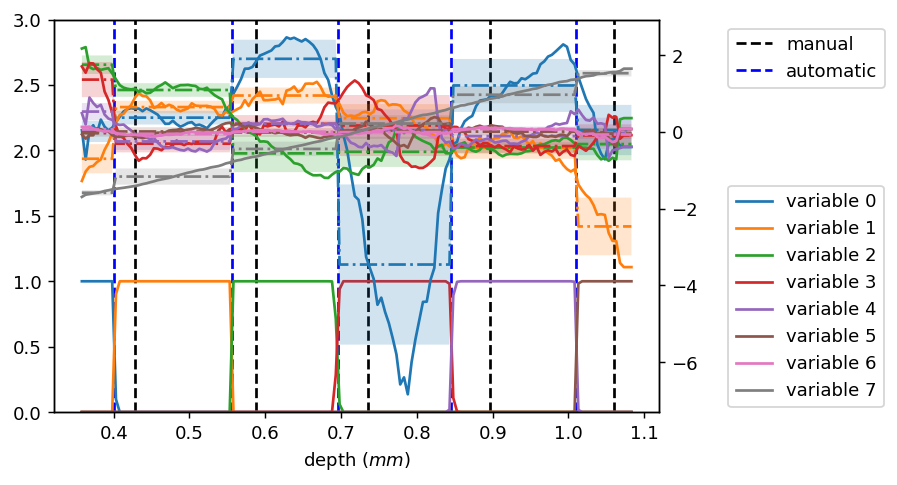

In [92]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=130)
ax2 = ax.twinx()

for i in range(varis.shape[1]):
    c = colors[i % len(colors)]
    ax2.plot(bin_centers, varis[:, i], color=c, label=f"variable {i}")
    ax2.plot(bin_centers, model_means[:, i], linestyle="-.", color=c )
    ax2.fill_between(bin_centers, model_means[:, i] - model_stds[:, i], model_means[:, i] + model_stds[:, i], edgecolor="none", facecolor=c, alpha=0.2)
#     
# for i, f in enumerate(features):
#     c = colors[i % len(colors)]
#     ax2.plot(bin_centers, exc_soma_features_by_depth[f] / np.nanmax(exc_soma_features_by_depth[f]), linestyle="-", color=c, label="exc " + f)
#     ax2.plot(bin_centers, model_means[:, i + 2], linestyle="-.", color=c, label="exc "+ f + " model mean")
#     ax2.fill_between(bin_centers, model_means[:, i+2] - model_stds[:, i+2], model_means[:, i+2] + model_stds[:, i+2], edgecolor="none", facecolor=c, alpha=0.2)
#     ax2.plot(bin_centers, normalized_smooth_exc_features[f], linestyle=":", label="exc fit " + f)
#     ax2.plot(bin_centers, inh_soma_features_by_depth[f] / max(inh_soma_features_by_depth[f]), linestyle="-", label="inh " + f)
#     ax2.plot(bin_centers, soma_features_by_depth[f] / max(soma_features_by_depth[f]), linestyle="-", label=f)

# ax.plot(bin_centers, synapse_densities, label="syn")
# for t in syn_densities_by_pre:
#     ax2.plot(bin_centers, syn_densities_by_pre[t], label=t)
# for t in syn_densities_by_post:
#     ax2.plot(bin_centers, syn_densities_by_post[t], label=t)
    
ax.axvline(labels[0], linestyle="--", color="k", label="manual")
for lab in labels[1:]:
    ax.axvline(lab, linestyle="--", color="k")
ax.axvline(bounds[0], linestyle="--", color="blue", label="automatic")
for bound in bounds[1:]:
    ax.axvline(bound, linestyle="--", color="blue")
ax.plot(bin_centers, posteriors)
ax.legend(bbox_to_anchor=[1.1, 1])
ax2.legend(bbox_to_anchor=[1.1, 0.6])
ax.set_xlabel("depth ($mm$)")
ax.set_ylim([0, 3])
# ax.set_ylabel("soma density (per $mm^{3}$)")
# ax2.set_ylabel("synapse density (per $mm^3$)")
plt.show()

### predicted layer boundaries as a function of number of PCA modes used

In [93]:
bounds

array([0.400516, 0.555516, 0.695516, 0.845516, 1.010516])

In [730]:
array([0.400516, 0.555516, 0.690516, 0.850516, 1.035516])  # all 7 PCA modes

array([0.400516, 0.555516, 0.690516, 0.850516, 1.035516])

In [716]:
array([0.400516, 0.555516, 0.695516, 0.845516, 1.035516])  # 6 PCA modes

array([0.400516, 0.555516, 0.695516, 0.845516, 1.035516])

In [674]:
array([0.400516, 0.555516, 0.700516, 0.825516, 1.035516])  # 3 PCA modes

array([0.400516, 0.555516, 0.700516, 0.825516, 1.035516])

In [ ]:
array([0.400516, 0.555516, 0.700516, 0.830516, 1.010516])  # 2 PCA modes

In [ ]:
array([0.400516, 0.555516, 0.690516, 0.855516, 1.035516])  # 1 PCA mode

# Sum of magnitudes of fft-smoothed derivatives

In [233]:
from scipy import fft

In [419]:
freq_cutoff = 0.05
cleaned = clean_nans(exc_soma_densities, divide_by_max=True)
e_fft = fft.fft(cleaned)
freqs = fft.fftfreq(len(exc_soma_densities))
mask = abs(freqs) < freq_cutoff
e_fft *= mask  # remove high frequency content (details/noise)
e_fft_prime = e_fft * 1j * freqs  # take (spectral) derivative
normalized_smooth_exc_densities = np.real(fft.ifft(e_fft))
smooth_exc_soma_densities_deriv = np.real(fft.ifft(e_fft_prime))

normalized_smooth_exc_features = dict() 
smooth_exc_feature_derivs = dict()
for f in features:
    cleaned = clean_nans(exc_soma_features_by_depth[f], divide_by_max=True)
    e_fft = fft.fft(cleaned)
    freqs = fft.fftfreq(len(cleaned))
    mask = abs(freqs) < freq_cutoff
    e_fft *= mask  # remove high frequency content (details/noise)
    e_fft_prime = e_fft * 1j * freqs  # take (spectral) derivative
    normalized_smooth_exc_features[f] = np.real(fft.ifft(e_fft))
    smooth_exc_feature_derivs[f] = np.real(fft.ifft(e_fft_prime))

In [421]:
transitionness = sum(np.abs(smooth_exc_feature_derivs[f]) for f in features) + smooth_exc_soma_densities_deriv

## another way to visualize

No handles with labels found to put in legend.


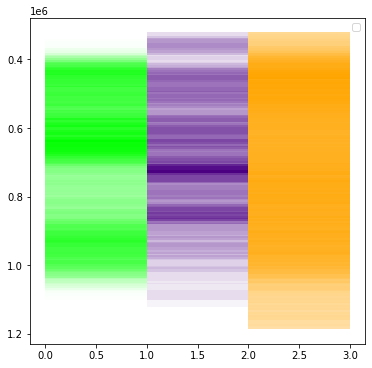

In [113]:
# todo fill with alpha = density
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
for i in range(len(bin_centers)):
        bin_start, bin_end = bin_centers[i] - step_size // 2, bin_centers[i] + step_size // 2
        ax.fill_between([0, 1], [bin_start]*2, [bin_end]*2, alpha=exc_soma_densities[i] / max(exc_soma_densities), color="lime", edgecolor=None)
        ax.fill_between([1, 2], [bin_start]*2, [bin_end]*2, alpha=inh_soma_densities[i] / max(inh_soma_densities), color="indigo", edgecolor=None)
    
ax.invert_yaxis()
ax.legend()
plt.show()

## Ideas:
Use synapse_query(bounding_box) to get synapse density too (and stratify by cell type)

Use inhibitory cell subclass densities (do these use depth info? yes, so don't)

Use *excitatory* soma features (they're much less noisy than inhibitory/combined features) and look for significant and steep changes in these features with depth by using the fft-smoothed version of each feature (as a function of depth) and then take its derivative (in fourier domain). The magnitude of the derivative of the smoothed function indicates how much of a transition zone it is according to that feature, and if we take the product of these derivative magnitudes we should see peaks at the layer borders.

In [103]:
soma_features.columns

Index(['index', 'nucleus_area', 'nucleus_area_to_volume',
       'nucleus_center_mass_nm', 'nucleus_fold_area', 'nucleus_fract_fold',
       'nucleus_id', 'nucleus_volume', 'cleft_segid', 'size', 'centroid_x',
       'centroid_y', 'centroid_z', 'yr_um_translated', 'predict',
       'is_watertight', 'soma_center_mass', 'soma_volume', 'soma_area',
       'soma_area_to_volume', 'num_processes', 'avg_sdf', 'orients', 'vectors',
       'n_soma_syn', 'soma_syn_density', 'nuc_id', 'seg_id', 'soma_y',
       'soma_x', 'soma_z', 'xr', 'yr', 'nucleus_to_soma', 'sum_proc_sdf',
       'cell_type_pred_num', 'cell_type_pred', 'umapx', 'umapy', 'visible',
       'outline_color', 'outline_width', 'max_sdf'],
      dtype='object')

In [160]:
bounds_by_x = dict()
bounds_by_x["use_depth_changing_default"] = np.array([[0.3983493333333334, 0.5555160000000001, 0.7005160000000004, 0.8455160000000004, 1.0505160000000004], [0.3971826666666667, 0.5455160000000001, 0.7005160000000004, 0.8405160000000005, 1.0511410000000005], [0.39179200000000003, 0.5442920000000002, 0.7042920000000004, 0.8442920000000005, 1.0489348571428578], [0.39250628571428575, 0.5442920000000002, 0.6942920000000004, 0.8442920000000005, 1.0457920000000005], [0.39261133333333337, 0.5480280000000002, 0.6880280000000003, 0.8430280000000004, 1.0388613333333339], [0.39052800000000004, 0.5480280000000002, 0.6880280000000003, 0.8180280000000004, 1.0305280000000006], [0.38261133333333336, 0.5480280000000002, 0.6830280000000003, 0.8180280000000004, 1.0294168888888895], [0.37214800000000003, 0.5451480000000002, 0.6851480000000003, 0.8051480000000004, 1.0290765714285721], [0.3724312727272728, 0.5422040000000001, 0.6722040000000002, 0.8272040000000005, 1.0318468571428576], [0.3705413333333334, 0.5447080000000002, 0.6647080000000003, 0.8147080000000004, 1.0309580000000007], [0.37105415384615387, 0.5447080000000002, 0.6647080000000003, 0.8147080000000004, 1.0257794285714292], [0.37720800000000004, 0.5397080000000002, 0.6547080000000003, 0.8297080000000004, 1.0244807272727279], [0.3773926666666667, 0.5444760000000002, 0.6544760000000003, 0.8294760000000004, 1.020547428571429], [0.37788509090909095, 0.5044760000000001, 0.6594760000000003, 0.8294760000000004, 1.0159760000000007], [0.38147600000000004, 0.5044760000000001, 0.6594760000000003, 0.8294760000000004, 1.0119760000000007], [0.38197600000000004, 0.5044760000000001, 0.6494760000000003, 0.8294760000000004, 1.0086426666666672], [0.3850036363636364, 0.5061400000000001, 0.6461400000000003, 0.8011400000000004, 1.0023900000000006], [0.38864000000000004, 0.5061400000000001, 0.6461400000000003, 0.7861400000000004, 0.9996400000000006], [0.38454909090909095, 0.5061400000000001, 0.6411400000000003, 0.7811400000000004, 0.9923900000000005], [0.3872763636363637, 0.5011400000000001, 0.6361400000000003, 0.7761400000000004, 0.9953066666666672], [0.3867716923076923, 0.49696400000000013, 0.6369640000000003, 0.7769640000000004, 0.9969640000000006], [0.3867973333333334, 0.5019640000000001, 0.6319640000000002, 0.7869640000000004, 0.9957140000000005], [0.3861946666666667, 0.5020280000000001, 0.6270280000000003, 0.7870280000000004, 0.9961946666666672], [0.38452800000000004, 0.5120280000000001, 0.6170280000000002, 0.7870280000000004, 0.9953613333333339], [0.3797653333333334, 0.5139320000000002, 0.6139320000000003, 0.7889320000000004, 0.9904320000000005], [0.37337600000000004, 0.5158760000000002, 0.6108760000000002, 0.7808760000000003, 0.9876617142857149], [0.376309090909091, 0.5179000000000002, 0.6079000000000003, 0.7929000000000004, 0.9904000000000006]])
bounds_by_x["soma_vol_density"] = np.array([np.array([0.39834933, 0.555516  , 0.700516  , 0.865516  , 1.050516  ]), np.array([0.39718267, 0.555516  , 0.700516  , 0.845516  , 1.051141  ]), np.array([0.391792  , 0.549292  , 0.704292  , 0.844292  , 1.04893486]), np.array([0.39250629, 0.544292  , 0.694292  , 0.844292  , 1.045792  ]), np.array([0.39261133, 0.548028  , 0.693028  , 0.848028  , 1.03886133]), np.array([0.390528, 0.543028, 0.683028, 0.858028, 1.030528]), np.array([0.38261133, 0.548028  , 0.683028  , 0.848028  , 1.02941689]), np.array([0.372148  , 0.545148  , 0.685148  , 0.840148  , 1.02907657]), np.array([0.37243127, 0.537204  , 0.682204  , 0.842204  , 1.03184686]), np.array([0.37054133, 0.539708  , 0.674708  , 0.829708  , 1.030958  ]), np.array([0.37105415, 0.539708  , 0.664708  , 0.834708  , 1.02577943]), np.array([0.377208  , 0.514708  , 0.659708  , 0.839708  , 1.02448073]), np.array([0.37739267, 0.494476  , 0.664476  , 0.829476  , 1.02054743]), np.array([0.37788509, 0.494476  , 0.664476  , 0.829476  , 1.015976  ]), np.array([0.381476, 0.499476, 0.659476, 0.829476, 1.011976]), np.array([0.381976  , 0.504476  , 0.644476  , 0.829476  , 1.00864267]), np.array([0.38500364, 0.50114   , 0.64614   , 0.82614   , 1.00239   ]), np.array([0.38864, 0.50614, 0.64614, 0.81614, 0.99964]), np.array([0.38454909, 0.50114   , 0.64614   , 0.79114   , 0.99239   ]), np.array([0.38727636, 0.50114   , 0.63614   , 0.78614   , 0.99530667]), np.array([0.38677169, 0.496964  , 0.636964  , 0.781964  , 0.996964  ]), np.array([0.38679733, 0.506964  , 0.631964  , 0.801964  , 0.995714  ]), np.array([0.38619467, 0.507028  , 0.632028  , 0.777028  , 0.99619467]), np.array([0.384528  , 0.517028  , 0.617028  , 0.787028  , 0.99536133]), np.array([0.37976533, 0.513932  , 0.618932  , 0.778932  , 0.990432  ]), np.array([0.373376  , 0.510876  , 0.615876  , 0.775876  , 0.98766171]), np.array([0.37630909, 0.5129    , 0.6079    , 0.7829    , 0.9904    ])])
bounds_by_x["soma_vol_std_density"] = np.array([[0.3983493333333334, 0.5605160000000002, 0.7005160000000004, 0.8605160000000005, 1.0505160000000004], [0.3971826666666667, 0.5555160000000001, 0.7005160000000004, 0.8455160000000004, 1.0511410000000005], [0.39179200000000003, 0.5492920000000001, 0.7042920000000004, 0.8442920000000005, 1.0489348571428578], [0.39250628571428575, 0.5442920000000002, 0.6942920000000004, 0.8442920000000005, 1.0457920000000005], [0.39261133333333337, 0.5480280000000002, 0.6930280000000003, 0.8280280000000004, 1.0388613333333339], [0.39052800000000004, 0.5530280000000002, 0.6880280000000003, 0.8180280000000004, 1.0305280000000006], [0.38261133333333336, 0.5480280000000002, 0.6830280000000003, 0.8180280000000004, 1.0294168888888895], [0.37214800000000003, 0.5601480000000002, 0.6801480000000003, 0.8351480000000004, 1.0290765714285721], [0.3724312727272728, 0.5472040000000002, 0.6722040000000002, 0.8322040000000004, 1.0318468571428576], [0.3705413333333334, 0.5447080000000002, 0.6647080000000003, 0.8297080000000004, 1.0309580000000007], [0.37105415384615387, 0.5447080000000002, 0.6647080000000003, 0.8297080000000004, 1.0257794285714292], [0.37720800000000004, 0.5147080000000002, 0.6597080000000003, 0.8347080000000004, 1.0244807272727279], [0.3773926666666667, 0.49947600000000014, 0.6594760000000003, 0.8344760000000004, 1.020547428571429], [0.37788509090909095, 0.49947600000000014, 0.6644760000000003, 0.8294760000000004, 1.0159760000000007], [0.38147600000000004, 0.5044760000000001, 0.6594760000000003, 0.8344760000000004, 1.0119760000000007], [0.38197600000000004, 0.5044760000000001, 0.6444760000000003, 0.8294760000000004, 1.0086426666666672], [0.3850036363636364, 0.5011400000000001, 0.6461400000000003, 0.8011400000000004, 1.0023900000000006], [0.38864000000000004, 0.5011400000000001, 0.6461400000000003, 0.7911400000000004, 0.9996400000000006], [0.38454909090909095, 0.5011400000000001, 0.6461400000000003, 0.7861400000000004, 0.9923900000000005], [0.3872763636363637, 0.5011400000000001, 0.6361400000000003, 0.7861400000000004, 0.9953066666666672], [0.3867716923076923, 0.49696400000000013, 0.6369640000000003, 0.7819640000000003, 0.9969640000000006], [0.3867973333333334, 0.5069640000000002, 0.6369640000000003, 0.7869640000000004, 0.9957140000000005], [0.3861946666666667, 0.5070280000000001, 0.6270280000000003, 0.7870280000000004, 0.9961946666666672], [0.38452800000000004, 0.5120280000000001, 0.6170280000000002, 0.7870280000000004, 0.9953613333333339], [0.3797653333333334, 0.5189320000000002, 0.6089320000000003, 0.7889320000000004, 0.9904320000000005], [0.37337600000000004, 0.5208760000000001, 0.6058760000000003, 0.7808760000000003, 0.9876617142857149], [0.376309090909091, 0.5179000000000002, 0.6079000000000003, 0.7929000000000004, 0.9904000000000006]])

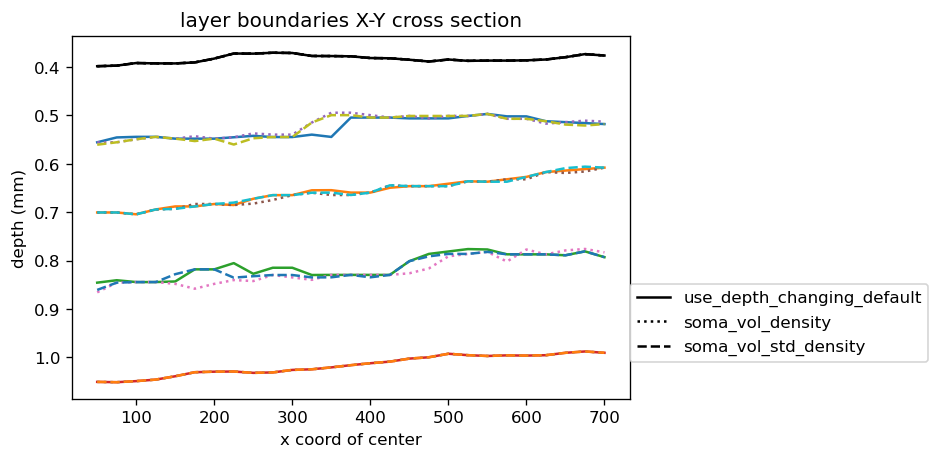

In [166]:
fig, ax = plt.subplots(dpi=120)
linestyles = ["-", ":", "--", "-."]
for i, n in enumerate(bounds_by_x):
    ax.plot(range(50, 725, 25), bounds_by_x[n][:, 0], color="k", linestyle=linestyles[i % len(linestyles)], label=n)
    for j in range(1, bounds_by_x[n].shape[1]):
        ax.plot(range(50, 725, 25), bounds_by_x[n][:, j], linestyle=linestyles[i % len(linestyles)])
ax.set_xlabel("x coord of center")
ax.set_ylabel("depth (mm)")
ax.invert_yaxis()
ax.set_title("layer boundaries X-Y cross section")
ax.legend(loc=[1, 0.1])

In [42]:
with open("boundsOutput.txt") as f:
    bds = f.read()

In [101]:
import re

m = re.findall('bounds: \[[0-9. ]*\]', s)
len(m)

1864

In [106]:
bds = np.array([list(map(float, b[len("bounds: ["):-1].split()[:5])) for b in m])

In [179]:
bds = np.load("bounds.npy")

In [180]:
bds.shape

(512, 5, 8)

<IPython.core.display.Javascript object>


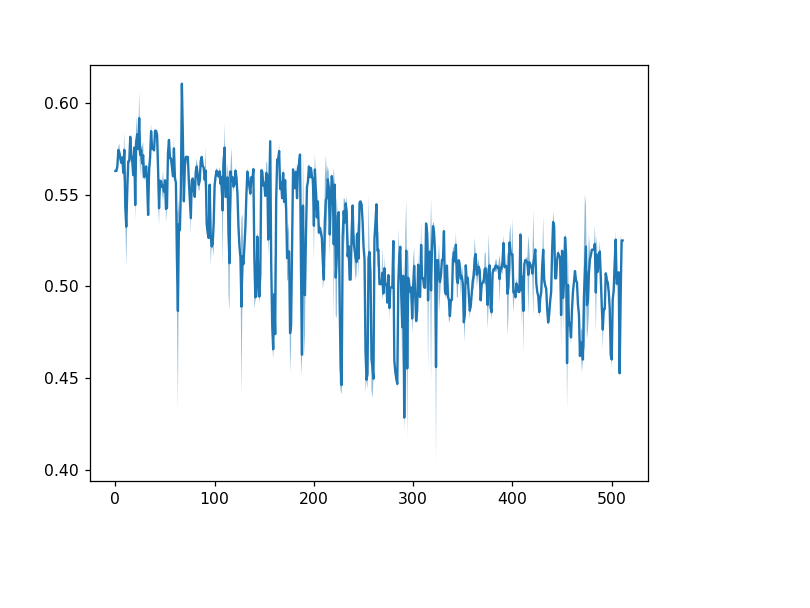

In [183]:
%matplotlib notebook
plt.figure()
bdsmean = bds.mean(axis=2)
bdsstd = bds.std(axis=2)
plt.plot(np.arange(512), bdsmean[:, 1])
plt.fill_between(np.arange(512), bdsmean[:, 1] - bdsstd[:, 1], bdsmean[:, 1] + bdsstd[:, 1], alpha=0.5)